In [1]:
!pip install six
!pip install numpy
!pip install slimit
!pip install psutil
!pip install fastBPE
!pip install javalang
!pip install submitit
!pip install dpu-utils
!pip install astunparse
!pip install stringcase
!pip install scikit-learn
!pip install torch
!pip install transformers
!pip install fairseq
!pip install tree_sitter
!pip install tensorboard
!pip install sentencepiece
!pip install tensorboardX
!pip install sacrebleu
!pip install simpletransformers
!pip install torchmetrics
!pip install --upgrade gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.1 MB/s eta 0:00:00
  Created wheel for slimit: filename=slimit-0.8.1-py3-none-any.whl size=79458 sha256=5edadc5fdc409ba8a1beaf77cfcf55799fada40984557d43ebc2799435763e18
  Stored in directory: /root/.cache/pip/wheels/67/b4/c2/ebe388930097eb1456e91778daa41da8c461f88ce024db7aec
Successfully built slimit
  Preparing metadata (setup.py) ... done
  Created wheel for fastBPE: filename=fastBPE-0.1.0-cp310-cp310-linux_x86_64.whl size=64870 sha256=595ea38b63d728549237ac719ed1aecf6d1cd1ed79b966657dd765db8ecd543c
  Stored in directory: /root/.cache/pip/wheels/13/5d/b9/4b8897941ebc9e8c6cc3f3ffd3ea5115731754269205098754
Successfully built fastBPE
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [2]:
# general
import os
import json
import random
import warnings
from typing import List,Tuple

# ML
import numpy as np
import scipy as sp
import pandas as pd

# visual
import matplotlib
import seaborn as sns
from tqdm import tqdm
from tabulate import tabulate
import matplotlib.pyplot as plt
from IPython.display import display

# DL
import torch
import torch.nn as nn

# HF
from transformers import BertTokenizer
from transformers import BertForSequenceClassification
from torchmetrics.text import BLEUScore, MatchErrorRate, CharErrorRate, TranslationEditRate, SacreBLEUScore
from torchmetrics.text.rouge import ROUGEScore
from torchmetrics import MetricCollection



import gzip
import json
import logging
import os
from pathlib import Path
from typing import Dict, List, Tuple

import numpy as np
import torch
from sklearn.metrics import f1_score
from tokenizers.implementations.byte_level_bpe import ByteLevelBPETokenizer
from tokenizers.processors import BertProcessing
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.dataset import Dataset
from torch.utils.tensorboard.writer import SummaryWriter
from tqdm import tqdm, trange

from transformers import RobertaForSequenceClassification, RobertaTokenizer
from transformers.data.metrics import acc_and_f1, simple_accuracy

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# XLCoST

In [4]:
# !gdown "14SEj8Q1oQaogQsaBn-9iTlMN334mW3d1&confirm=t"

In [5]:
!gdown "1tZfsYQgWmc2gG340ru5VbrZ5aLIZ41_6&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1tZfsYQgWmc2gG340ru5VbrZ5aLIZ41_6&confirm=t
To: /kaggle/working/XLCoST_data.zip
100%|█████████████████████████████████████████| 298M/298M [00:01<00:00, 250MB/s]


In [32]:
!unzip "/kaggle/working/XLCoST_data.zip"

Archive:  /kaggle/working/XLCoST_data.zip
   creating: XLCoST_data/
  inflating: __MACOSX/._XLCoST_data  
   creating: XLCoST_data/retrieval/
  inflating: __MACOSX/XLCoST_data/._retrieval  
   creating: XLCoST_data/generation/
  inflating: __MACOSX/XLCoST_data/._generation  
   creating: XLCoST_data/retrieval/nl2code_search/
  inflating: __MACOSX/XLCoST_data/retrieval/._nl2code_search  
   creating: XLCoST_data/retrieval/code2code_search/
  inflating: __MACOSX/XLCoST_data/retrieval/._code2code_search  
   creating: XLCoST_data/retrieval/.ipynb_checkpoints/
  inflating: __MACOSX/XLCoST_data/retrieval/._.ipynb_checkpoints  
   creating: XLCoST_data/generation/pair_data_tok_full_desc_comment/
  inflating: __MACOSX/XLCoST_data/generation/._pair_data_tok_full_desc_comment  
   creating: XLCoST_data/generation/pair_data_tok_1_comment/
  inflating: __MACOSX/XLCoST_data/generation/._pair_data_tok_1_comment  
   creating: XLCoST_data/generation/pair_data_tok_full_desc/
  inflating: __MACOSX/XLC

In [7]:
!gdown "1a_JpJmlaaI7opFYpThZ45aiDtXcUET6A&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1a_JpJmlaaI7opFYpThZ45aiDtXcUET6A&confirm=t
To: /kaggle/working/train-match-pairs-data-P-J-C#-C-JS.json
100%|█████████████████████████████████████████| 151M/151M [00:00<00:00, 246MB/s]


In [8]:
!gdown "1F3t1jx7oodsJgO0z9CWagUCc4-rZOMR2&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1F3t1jx7oodsJgO0z9CWagUCc4-rZOMR2&confirm=t
To: /kaggle/working/val-match-pairs-data-P-J-C#-C-JS.json
100%|███████████████████████████████████████| 8.25M/8.25M [00:00<00:00, 196MB/s]


In [9]:
!gdown "1_kjMMHSCRBFdmRJryKFmPTnCu9r4NaPa&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1_kjMMHSCRBFdmRJryKFmPTnCu9r4NaPa&confirm=t
To: /kaggle/working/val-homogeneous-file-pairs-data-P-J-C#-C-JS.json
100%|███████████████████████████████████████| 8.25M/8.25M [00:00<00:00, 246MB/s]


In [10]:
!gdown "1uQo7tYkazrYSv16pfDvnrp2-5sOavLwV&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1uQo7tYkazrYSv16pfDvnrp2-5sOavLwV&confirm=t
To: /kaggle/working/train-homogeneous-file-pairs-data-P-J-C#-C-JS.json
100%|█████████████████████████████████████████| 151M/151M [00:00<00:00, 285MB/s]


In [11]:
!gdown "1L1WUBl6m-ce8xQBHTjutbIleDk3DtpE-&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1L1WUBl6m-ce8xQBHTjutbIleDk3DtpE-&confirm=t
To: /kaggle/working/DeepSCC-RoBERTa-model-full-mixed-lang-snips.pt
100%|█████████████████████████████████████████| 500M/500M [00:02<00:00, 215MB/s]


In [12]:
!gdown "1d_dUfziicRoSQVR9sSv7YYyytL2keJol&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1d_dUfziicRoSQVR9sSv7YYyytL2keJol&confirm=t
To: /kaggle/working/python_classifier_model_end_train.pt
100%|█████████████████████████████████████████| 334M/334M [00:01<00:00, 245MB/s]


In [13]:
!gdown "1aqybKA-_hT8iZWq1N2YQWWbMrfzgZEEM&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1aqybKA-_hT8iZWq1N2YQWWbMrfzgZEEM&confirm=t
To: /kaggle/working/merges.txt
100%|█████████████████████████████████████████| 483k/483k [00:00<00:00, 125MB/s]


In [14]:
!gdown "1XTz9dMBZFtWOlryqORfO69DCA0nwEmEA&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1XTz9dMBZFtWOlryqORfO69DCA0nwEmEA&confirm=t
To: /kaggle/working/vocab.json
100%|█████████████████████████████████████████| 994k/994k [00:00<00:00, 105MB/s]


# Shared code

## Datasets classes

In [3]:
import torch
from torch.utils.data import Dataset
from collections import defaultdict

class CodeSnipPairsDataset(Dataset):
    def __init__(self, snip_pairs):
      self.snip_pairs = snip_pairs

    def __len__(self):
        return len(self.snip_pairs)

    def __getitem__(self, idx):
        return self.snip_pairs[idx]

In [16]:
import torch
from torch.utils.data import Dataset
from collections import defaultdict

class CodePairsDataset(Dataset):
    def __init__(self, java_exmp, python_exmp):
      self.java_samples = []
      self.python_samples = []
      self.samples_idx = []
      for k in java_exmp.keys():
        self.java_samples.append(' '.join(java_exmp[k]))
        self.python_samples.append(' '.join(python_exmp[k]))
        self.samples_idx.append(k)

    def __len__(self):
        return len(self.samples_idx)

    def __getitem__(self, idx):
        java_code = self.java_samples[idx]
        python_code = self.python_samples[idx]
        exmp_id = self.samples_idx[idx]
        return exmp_id, java_code, python_code

In [17]:
import torch
from torch.utils.data import Dataset
from collections import defaultdict

class MatchCodePairsDataset(Dataset):
    def __init__(self, java_exmp, python_exmp):
      self.code_pairs = []
      rng = np.random.default_rng()
      for k in java_exmp.keys():
        match_pair = (java_exmp[k], python_exmp[k], 1)
        keys_to_sample = list(java_exmp.keys()).copy()
        keys_to_sample.remove(k)
        sample_key = rng.choice(keys_to_sample)
        mismatch_pair = (java_exmp[k], python_exmp[sample_key], 0)
        self.code_pairs.append(match_pair)
        self.code_pairs.append(mismatch_pair)

    def __len__(self):
      return len(self.code_pairs)

    def __getitem__(self, idx):
      java_code, python_code, label = self.code_pairs[idx]
      return java_code, python_code, label

In [18]:
import torch
from torch.utils.data import Dataset
from collections import defaultdict

class MatchCodeSnipPairsDataset(Dataset):
    def __init__(self, snip_pairs, create=True):
        if create:
          self.snip_pairs = []
          rng = np.random.default_rng()
          pair_idxs = [ i for i in range(len(snip_pairs))]
          for idx, pair in enumerate(snip_pairs):
            match_pair = (pair[0], pair[1], 1)
            keys_to_sample = pair_idxs.copy()
            keys_to_sample.remove(idx)
            sample_key = rng.choice(keys_to_sample)
            mismatch_pair = (pair[0], snip_pairs[sample_key][1], 0)
            self.snip_pairs.append(match_pair)
            self.snip_pairs.append(mismatch_pair)
        else:
            self.snip_pairs = snip_pairs

    def __len__(self):
      return len(self.snip_pairs)

    def __getitem__(self, idx):
      java_code, python_code, label = self.snip_pairs[idx]
      return java_code, python_code, label

## Read data functions

In [19]:
def read_examples(map_filename, code_filename):
    """Read examples from filename."""
    examples={}
    with open(map_filename) as f1,open(code_filename) as f2:
            for line1,line2 in zip(f1,f2):
              exp_id = int(line1.strip().split('-')[0])
              if exp_id in examples.keys():
                examples[exp_id].append(line2.strip())
              else:
                examples[exp_id] = [line2.strip()]
    return examples

In [4]:
def read_snip_examples(src_filename, trg_filename):
    """Read examples from filename."""
    examples=[]
    with open(src_filename) as f1,open(trg_filename) as f2:
            for line1,line2 in zip(f1,f2):
              examples.append((line1.strip(), line2.strip()))
    return examples

In [21]:
def read_match_pairs_json(file_path):
  with open(file_path, "r") as f:
    match_pairs = json.load(f)
    match_pairs = [(i['code1'], i['code2'], i['label']) for i in match_pairs]

    return match_pairs

## Models

In [5]:
import numpy as np
import time
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast


class BERT_Arch(nn.Module):
    def __init__(self, bert):
        super(BERT_Arch, self).__init__()

        self.bert = bert

        # dropout layer
        self.dropout = nn.Dropout(0.2)

        # relu activation function
        self.relu = nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768, 512)

        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512, 2)

        # softmax activation function
        self.softmax = nn.LogSoftmax(dim = 1)

    # define the forward pass
    def forward(self, input, mask):
        # pass the inputs to the model
        _, cls_hs = self.bert(input, attention_mask = mask, return_dict=False)

        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)


        # apply softmax activation
        x = self.softmax(x)
        return x

# Translate code

In [8]:
CODEBERTA_PRETRAINED = "huggingface/CodeBERTa-small-v1"


# Set up tokenizer
# py_tokenizer = RobertaTokenizer.from_pretrained(CODEBERTA_PRETRAINED)
py_tokenizer = ByteLevelBPETokenizer("/kaggle/working/vocab.json", "/kaggle/working/merges.txt")
py_tokenizer._tokenizer.post_processor = BertProcessing(
    ("</s>", py_tokenizer.token_to_id("</s>")), ("<s>", py_tokenizer.token_to_id("<s>")),
)
py_tokenizer.enable_truncation(max_length=256)


py_model = RobertaForSequenceClassification.from_pretrained(CODEBERTA_PRETRAINED, num_labels=2)
py_model.load_state_dict(torch.load("/kaggle/working/python_classifier_model_end_train.pt", map_location=device))
py_model = py_model.to(device)
py_model.eval()

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at huggingface/CodeBERTa-small-v1 and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(52000, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-5): 6 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (

In [9]:
import numpy as np
import torch
import pickle
import pandas as pd
import torch.nn as nn
from torch.nn import DataParallel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoTokenizer, AutoModelForMaskedLM, AutoModel, AutoTokenizer
from transformers import AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

model_pretained_name = "NTUYG/DeepSCC-RoBERTa"
pt_model = AutoModel.from_pretrained(model_pretained_name)

logic_tokenizer = AutoTokenizer.from_pretrained(model_pretained_name)

for param in pt_model.parameters():
    param.requires_grad = False

logic_model = BERT_Arch(pt_model)
logic_model.load_state_dict(torch.load("/kaggle/working/DeepSCC-RoBERTa-model-full-mixed-lang-snips.pt", map_location=device))
logic_model = logic_model.to(device)
logic_model.eval()


BERT_Arch(
  (bert): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((7

In [10]:
def convert_snips_to_logic_features(examples, tokenizer, max_source_length=128, max_target_length=128):
    tokens = []
    masks = []
    cls_token = None
    sep_token = None
    if tokenizer.cls_token and tokenizer.sep_token:
        cls_token = tokenizer.cls_token
        sep_token = tokenizer.sep_token
    else:
        cls_token = tokenizer.bos_token
        sep_token = tokenizer.eos_token
    for example in examples:
        java_code, python_code = example

        source_tokens = tokenizer.tokenize(java_code)[:max_source_length-2]
        source_tokens =[cls_token]+source_tokens+[sep_token]
        source_ids =  tokenizer.convert_tokens_to_ids(source_tokens)
        source_mask = [1] * len(source_ids)
        padding_length = max_source_length - len(source_ids)
        source_ids+=[tokenizer.pad_token_id]*padding_length
        source_mask+=[0]*padding_length

        target_tokens = tokenizer.tokenize(python_code)[:max_target_length-2]
        target_tokens = [cls_token]+target_tokens+[sep_token]
        target_ids = tokenizer.convert_tokens_to_ids(target_tokens)
        target_mask = [1] * len(target_ids)
        padding_length = max_target_length - len(target_ids)
        target_ids+=[tokenizer.pad_token_id]*padding_length
        target_mask+=[0]*padding_length

        src_trg_tokens = source_ids + target_ids
        src_trg_mask = source_mask + target_mask

        tokens.append(torch.tensor(src_trg_tokens))
        masks.append(torch.tensor(src_trg_mask))


    return tokens, masks

In [11]:
def convert_examples_to_features(examples, tokenizer, max_source_length=128, max_target_length=128, stage=None):
    features = []
    cls_token = None
    sep_token = None
    if tokenizer.cls_token and tokenizer.sep_token:
        cls_token = tokenizer.cls_token
        sep_token = tokenizer.sep_token
    else:
        cls_token = tokenizer.bos_token
        sep_token = tokenizer.eos_token
    for example_index, example in enumerate(examples):
        #source
        source, target = example
        source_tokens = tokenizer.tokenize(source)[:max_source_length-2]
        source_tokens =[cls_token]+source_tokens+[sep_token]
        source_ids =  tokenizer.convert_tokens_to_ids(source_tokens)
        source_mask = [1] * (len(source_tokens))
        padding_length = max_source_length - len(source_ids)
        source_ids+=[tokenizer.pad_token_id]*padding_length
        source_mask+=[0]*padding_length

        #target
        if stage=="test":
            target_tokens = tokenizer.tokenize("None")
        else:
            target_tokens = tokenizer.tokenize(target)[:max_target_length-2]
        target_tokens = [cls_token]+target_tokens+[sep_token]
        target_ids = tokenizer.convert_tokens_to_ids(target_tokens)
        target_mask = [1] *len(target_ids)
        padding_length = max_target_length - len(target_ids)
        target_ids+=[tokenizer.pad_token_id]*padding_length
        target_mask+=[0]*padding_length


        features.append(
            (
                 example_index,
                 torch.tensor(source_ids, dtype=torch.long).to(device),
                 torch.tensor(target_ids, dtype=torch.long).to(device),
                 torch.tensor(source_mask, dtype=torch.long).to(device),
                 torch.tensor(target_mask, dtype=torch.long).to(device)
            )
        )
    return features

In [12]:
import numpy as np
import time
import torch
from sklearn.metrics import accuracy_score
import os
from tqdm import tqdm

def train(epochs, examples, val_examples, trans_model, ispy_model, logic_model, trans_tok, ispy_tok, logic_tok, train_dataloader, cross_entropy, optimizer, val_dataloader, max_target_length, beam_size):
    train_losses = []
    valid_losses = []
    epoch_losses = {}
    # set initial loss to infinite
    best_valid_loss = float('inf')
    result_name = MODEL_FILE_PREFIX + ".txt"
    epoch_losses_file = MODEL_FILE_PREFIX + "-epoch_losses" + ".json"
    f = open(result_name, "w")
    f.close()
    # for each epoch
    for epoch in tqdm(range(epochs)):
        # train model
        train_loss, losses, preds = train_epoch(examples, trans_model, ispy_model, logic_model, trans_tok, ispy_tok, logic_tok, train_dataloader, cross_entropy, optimizer, max_target_length, beam_size)
        epoch_losses[str(epoch)] = losses

        with open(MODEL_FILE_PREFIX+"-ep-train-preds-"+str(epoch)+".json", "w") as f:
            json.dump(preds, f)
            del preds

        # evaluate model
        valid_loss, acc_score, preds = evaluate(val_examples, val_dataloader, trans_model, ispy_model, logic_model, trans_tok, ispy_tok, logic_tok, cross_entropy, max_target_length, beam_size)
        with open(MODEL_FILE_PREFIX+"-ep-eval-preds-"+str(epoch)+".json", "w") as f:
            json.dump(preds, f)
            del preds

        # save the best model
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(trans_model.state_dict(), MODEL_FILE_PREFIX+".pt")

        # append training and validation loss
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

#         print(f"Epoch: {epoch}, Loss: {train_loss}, Val accuracy: {acc_score}, Val loss: {valid_loss}")
        print(f'\nTraining Loss: {train_loss:.3f}')
        print(f'Validation Loss: {valid_loss:.3f}')
        print(f'Accuracy: {acc_score:.3f}')
        with open(result_name, "a") as f:
            f.writelines(f'{train_loss:.3f} {valid_loss:.3f} {acc_score:.3f}')
            f.writelines("\n")

        with open(epoch_losses_file, "w") as f:
            json.dump(epoch_losses, f)

    return train_losses, valid_losses


def train_epoch(examples, trans_model, ispy_model, logic_model, trans_tok, ispy_tok, logic_tok, train_dataloader, cross_entropy, optimizer, max_target_length, beam_size):
    trans_model.train()
    ispy_model.eval()
    logic_model.eval()

    total_loss, total_accuracy = 0, 0
    losses = []
    total_preds = []

    # iterate over batches
    for step, batch in tqdm(enumerate(train_dataloader)):

        exmp_idxs,source_ids,target_ids,source_mask,target_mask = batch
        source_ids = source_ids.to(device)
        source_mask = source_mask.to(device)
        target_ids = target_ids.to(device)
        target_mask = target_mask.to(device)

        trans_model.zero_grad()
        optimizer.zero_grad()

        try:
            outputs = trans_model(input_ids=source_ids, attention_mask=source_mask,
                                  labels=target_ids, decoder_attention_mask=target_mask)
            trans_loss = outputs.loss
        except Exception as e:
            print(exmp_idxs)
            print(source_ids)
            print(target_ids)
            raise e

        preds = trans_model.generate(source_ids,
                                       attention_mask=source_mask,
                                       use_cache=True,
                                       num_beams=beam_size,
                                       early_stopping=False,
                                       max_length=max_target_length)
        pred_ids = list(preds.cpu().numpy())
        p = [trans_tok.decode(id, skip_special_tokens=True, clean_up_tokenization_spaces=False) for id in pred_ids]

        tok_pycode = pad_sequence([torch.tensor(ispy_tok.encode(i).ids) for i in p], batch_first=True, padding_value=1)
        tok_pycode = tok_pycode.to(device)
        is_python_logits = ispy_model(tok_pycode)[0]
        is_python_pred = torch.argmax(is_python_logits, dim=1)
        fake_model_py_logits = torch.ones(is_python_logits.size()).to(device)
        fake_model_py_logits[:,0] = 0
        py_loss = cross_entropy(fake_model_py_logits, is_python_pred)

        java_examp = [examples[i][0] for i in exmp_idxs]
        python_examp = [examples[i][1] for i in exmp_idxs]

        pairs = list(zip(java_examp,p))
        tok_pairs, pairs_masks = convert_snips_to_logic_features(pairs, logic_tok)
        tok_pairs = torch.stack(tok_pairs).to(device)
        pairs_masks = torch.stack(pairs_masks).to(device)

        logic_logits = logic_model(tok_pairs, pairs_masks)
        logic_preds = torch.argmax(logic_logits, dim=1)
        fake_model_logic_logits = torch.ones(logic_logits.size()).to(device)
        fake_model_logic_logits[:,0] = 0
        logic_loss = cross_entropy(fake_model_logic_logits, logic_preds)

        batch_loss = TRANS_LOSS_PRC*trans_loss + PY_LOSS_PRC*py_loss + LOGIC_LOSS_PRC*logic_loss
        curr_loss = batch_loss.item()

        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
            print(f"curr_loss: {curr_loss}")

        if step % 100 == 0 and not step == 0:
            total_preds.extend(zip(java_examp,python_examp,p))

        if step % 400 == 0 and not step == 0 and curr_loss < losses[-1]:
            print("Saving model...")
            torch.save(trans_model.state_dict(), MODEL_FILE_PREFIX+".pt")

        # backward pass to calculate the gradients
        batch_loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(trans_model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        total_loss += curr_loss
        losses.append(curr_loss)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)

    return avg_loss, losses,  [{'java':p[0], 'python_t':p[1], 'python_p':p[2]} for p in total_preds]



# function for evaluating the model
def evaluate(examples, val_dataloader, trans_model, ispy_model, logic_model, trans_tok, ispy_tok, logic_tok, cross_entropy, max_target_length, beam_size):
    print("\nEvaluating...")

    # deactivate dropout layers
    trans_model.eval()
    ispy_model.eval()
    logic_model.eval()

    total_loss, total_accuracy = 0, 0
    acc_score = 0
    total_preds = []
    t0 = time.time()
    # iterate over batches
    for step, batch in enumerate(val_dataloader):

        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = time.time() - t0

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        exmp_idxs,source_ids,target_ids,source_mask,target_mask = batch
        source_ids = source_ids.to(device)
        source_mask = source_mask.to(device)
        target_ids = target_ids.to(device)
        target_mask = target_mask.to(device)


        # deactivate autograd
        with torch.no_grad():

            # model predictions
            outputs = trans_model(input_ids=source_ids, attention_mask=source_mask,
                                  labels=target_ids, decoder_attention_mask=target_mask)
            trans_loss = outputs.loss

            preds = trans_model.generate(source_ids,
                                           attention_mask=source_mask,
                                           use_cache=True,
                                           num_beams=beam_size,
                                           early_stopping=False,
                                           max_length=max_target_length)
            pred_ids = list(preds.cpu().numpy())
            p = [trans_tok.decode(id, skip_special_tokens=True, clean_up_tokenization_spaces=False) for id in pred_ids]

            tok_pycode = pad_sequence([torch.tensor(ispy_tok.encode(i).ids) for i in p], batch_first=True, padding_value=1)
            tok_pycode = tok_pycode.to(device)
            is_python_logits = ispy_model(tok_pycode)[0]
            is_python_pred = torch.argmax(is_python_logits, dim=1)
            fake_model_py_logits = torch.ones(is_python_logits.size()).to(device)
            fake_model_py_logits[:,0] = 0
            py_loss = cross_entropy(fake_model_py_logits, is_python_pred)

            java_examp = [examples[i][0] for i in exmp_idxs]
            python_examp = [examples[i][1] for i in exmp_idxs]
            total_preds.extend(zip(java_examp,python_examp,p))

            pairs = list(zip(java_examp,p))
            tok_pairs, pairs_masks = convert_snips_to_logic_features(pairs, logic_tok)
            tok_pairs = torch.stack(tok_pairs).to(device)
            pairs_masks = torch.stack(pairs_masks).to(device)

            logic_logits = logic_model(tok_pairs, pairs_masks)
            logic_preds = torch.argmax(logic_logits, dim=1)
            fake_model_logic_logits = torch.ones(logic_logits.size()).to(device)
            fake_model_logic_logits[:,0] = 0
            logic_loss = cross_entropy(fake_model_logic_logits, logic_preds)

            batch_loss = TRANS_LOSS_PRC*trans_loss + PY_LOSS_PRC*py_loss + LOGIC_LOSS_PRC*logic_loss

            curr_loss = batch_loss.item()
            total_loss += curr_loss

    # compute the validation loss of the epoch
    for pred in total_preds:
          if pred[1] == pred[2]:
                acc_score += 1
    avg_loss = total_loss / len(val_dataloader)
    acc_score = acc_score / len(examples)

    return avg_loss, acc_score, [{'java':p[0], 'python_t':p[1], 'python_p':p[2]} for p in total_preds]

In [13]:
from transformers import T5Config, T5ForConditionalGeneration, T5Tokenizer, PLBartConfig, PLBartForConditionalGeneration, PLBartTokenizer

In [14]:
# trans_model_name = 'Salesforce/codet5-small'
trans_model_name = 'uclanlp/plbart-python-en_XX'

In [30]:
# trans_config = T5Config.from_pretrained(trans_model_name)
trans_tokenizer = PLBartTokenizer.from_pretrained(trans_model_name)
trans_model = PLBartForConditionalGeneration.from_pretrained(trans_model_name)
# trans_tokenizer = RobertaTokenizer.from_pretrained(trans_model_name)
# trans_model = T5ForConditionalGeneration.from_pretrained(trans_model_name)
# trans_model.config.ctc_zero_infinity = True
trans_model = trans_model.to(device)

In [33]:
random.seed(0)
train_snip_pairs_jp = read_snip_examples('/kaggle/working/XLCoST_data/generation/pair_data_tok_1/Java-Python/train-Java-Python-tok.java', '/kaggle/working/XLCoST_data/generation/pair_data_tok_1/Java-Python/train-Java-Python-tok.py')
train_snip_pairs_jp_dataset = CodeSnipPairsDataset(convert_examples_to_features(random.choices(train_snip_pairs_jp, k=int(len(train_snip_pairs_jp)/2)), trans_tokenizer))
val_snip_pairs_jp = read_snip_examples('/kaggle/working/XLCoST_data/generation/pair_data_tok_1/Java-Python/val-Java-Python-tok.java', '/kaggle/working/XLCoST_data/generation/pair_data_tok_1/Java-Python/val-Java-Python-tok.py')
val_snip_pairs_jp_dataset = CodeSnipPairsDataset(convert_examples_to_features(val_snip_pairs_jp, trans_tokenizer))

In [34]:
train_sampler = RandomSampler(train_snip_pairs_jp_dataset)
train_dataloader = DataLoader(train_snip_pairs_jp_dataset, sampler = train_sampler, batch_size = 32)

val_sampler = RandomSampler(val_snip_pairs_jp_dataset)
val_dataloader = DataLoader(val_snip_pairs_jp_dataset, sampler = val_sampler, batch_size = 32)

In [35]:
optimizer = torch.optim.AdamW(trans_model.parameters(), lr = 1e-5)

In [ ]:
cross_entropy = nn.CrossEntropyLoss()

In [37]:
torch.cuda.empty_cache()

In [38]:
torch.autograd.set_detect_anomaly(True)

In [39]:
TRANS_LOSS_PRC = 1
PY_LOSS_PRC = 0
LOGIC_LOSS_PRC = 0
MODEL_FILE_PREFIX = "plbart-half-data-trans-1-0-0"

In [40]:
train_losses, valid_losses = train(epochs=1,
                                    examples=train_snip_pairs_jp,
                                    val_examples=val_snip_pairs_jp,
                                    trans_model=trans_model,
                                    ispy_model=py_model,
                                    logic_model=logic_model,
                                    trans_tok=trans_tokenizer,
                                    ispy_tok=py_tokenizer,
                                    logic_tok=logic_tokenizer,
                                    train_dataloader=train_dataloader,
                                    cross_entropy=cross_entropy,
                                    optimizer=optimizer,
                                    val_dataloader=val_dataloader,
                                    max_target_length=128,
                                    beam_size=5)

  0%|          | 0/1 [00:00<?, ?it/s]
0it [00:00, ?it/s]We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.

1it [00:08,  8.89s/it]
2it [00:15,  7.59s/it]
3it [00:21,  6.90s/it]
4it [00:27,  6.53s/it]
5it [00:33,  6.31s/it]
6it [00:39,  6.16s/it]
7it [00:45,  6.08s/it]
8it [00:51,  6.11s/it]
9it [00:57,  6.04s/it]
10it [01:03,  6.00s/it]
11it [01:09,  6.00s/it]
12it [01:15,  5.99s/it]
13it [01:21,  6.08s/it]
14it [01:27,  6.03s/it]
15it [01:33,  5.95s/it]
16it [01:39,  5.93s/it]
17it [01:44,  5.90s/it]
18it [01:50,  5.90s/it]
19it [01:57,  6.01s/it]
20it [02:02,  5.97s/it]
21it [02:08,  5.94s/it]
22it [02:14,  5.93s/it]
23it [02:20,  5.91s/it]
24it [02:26,  5.99s/it]
25it [02:32,  5.93s/it]
26it [02:38,  5.92s/it]
27it [02:44,  5.93s/it]
28it [02:50,  5.89s/it]
29it [02:56,  5.96s/it]
30it [03:02,  5.91s/it]
31it [03:07,  5.89s/it]
32it [0

  Batch    50  of  1,215.
curr_loss: 7.318548202514648



51it [05:05,  5.91s/it]
52it [05:11,  5.90s/it]
53it [05:17,  5.88s/it]
54it [05:23,  5.85s/it]
55it [05:29,  5.79s/it]
56it [05:35,  5.88s/it]
57it [05:40,  5.85s/it]
58it [05:46,  5.84s/it]
59it [05:52,  5.78s/it]
60it [05:58,  5.78s/it]
61it [06:03,  5.80s/it]
62it [06:09,  5.80s/it]
63it [06:15,  5.81s/it]
64it [06:21,  5.82s/it]
65it [06:27,  5.74s/it]
66it [06:32,  5.79s/it]
67it [06:38,  5.79s/it]
68it [06:44,  5.76s/it]
69it [06:50,  5.76s/it]
70it [06:55,  5.78s/it]
71it [07:01,  5.71s/it]
72it [07:07,  5.80s/it]
73it [07:13,  5.82s/it]
74it [07:18,  5.74s/it]
75it [07:24,  5.75s/it]
76it [07:30,  5.72s/it]
77it [07:36,  5.71s/it]
78it [07:42,  5.81s/it]
79it [07:47,  5.80s/it]
80it [07:53,  5.81s/it]
81it [07:59,  5.75s/it]
82it [08:05,  5.75s/it]
83it [08:11,  5.81s/it]
84it [08:16,  5.80s/it]
85it [08:22,  5.80s/it]
86it [08:28,  5.76s/it]
87it [08:34,  5.75s/it]
88it [08:39,  5.70s/it]
89it [08:45,  5.83s/it]
90it [08:51,  5.78s/it]
91it [08:57,  5.76s/it]
92it [09:02,  5

  Batch   100  of  1,215.
curr_loss: 5.711135387420654



101it [09:53,  5.67s/it]
102it [09:58,  5.58s/it]
103it [10:04,  5.55s/it]
104it [10:09,  5.57s/it]
105it [10:15,  5.61s/it]
106it [10:21,  5.72s/it]
107it [10:27,  5.66s/it]
108it [10:32,  5.59s/it]
109it [10:38,  5.59s/it]
110it [10:43,  5.57s/it]
111it [10:49,  5.63s/it]
112it [10:54,  5.59s/it]
113it [11:00,  5.50s/it]
114it [11:05,  5.49s/it]
115it [11:11,  5.54s/it]
116it [11:17,  5.59s/it]
117it [11:22,  5.63s/it]
118it [11:28,  5.63s/it]
119it [11:33,  5.58s/it]
120it [11:39,  5.57s/it]
121it [11:45,  5.59s/it]
122it [11:50,  5.54s/it]
123it [11:56,  5.65s/it]
124it [12:02,  5.63s/it]
125it [12:07,  5.58s/it]
126it [12:12,  5.54s/it]
127it [12:18,  5.52s/it]
128it [12:24,  5.62s/it]
129it [12:29,  5.58s/it]
130it [12:35,  5.53s/it]
131it [12:40,  5.50s/it]
132it [12:46,  5.50s/it]
133it [12:51,  5.47s/it]
134it [12:57,  5.53s/it]
135it [13:02,  5.49s/it]
136it [13:07,  5.46s/it]
137it [13:13,  5.51s/it]
138it [13:19,  5.51s/it]
139it [13:24,  5.55s/it]
140it [13:30,  5.62s/it]

  Batch   150  of  1,215.
curr_loss: 4.034547328948975



151it [14:31,  5.60s/it]
152it [14:36,  5.57s/it]
153it [14:42,  5.50s/it]
154it [14:47,  5.46s/it]
155it [14:53,  5.54s/it]
156it [14:58,  5.46s/it]
157it [15:04,  5.52s/it]
158it [15:09,  5.52s/it]
159it [15:15,  5.53s/it]
160it [15:20,  5.44s/it]
161it [15:25,  5.40s/it]
162it [15:31,  5.43s/it]
163it [15:37,  5.54s/it]
164it [15:42,  5.47s/it]
165it [15:48,  5.60s/it]
166it [15:53,  5.51s/it]
167it [15:59,  5.47s/it]
168it [16:04,  5.44s/it]
169it [16:09,  5.43s/it]
170it [16:15,  5.41s/it]
171it [16:20,  5.41s/it]
172it [16:26,  5.42s/it]
173it [16:31,  5.40s/it]
174it [16:36,  5.44s/it]
175it [16:42,  5.42s/it]
176it [16:47,  5.43s/it]
177it [16:53,  5.42s/it]
178it [16:58,  5.40s/it]
179it [17:04,  5.50s/it]
180it [17:09,  5.49s/it]
181it [17:15,  5.48s/it]
182it [17:20,  5.48s/it]
183it [17:25,  5.44s/it]
184it [17:31,  5.42s/it]
185it [17:36,  5.35s/it]
186it [17:42,  5.44s/it]
187it [17:47,  5.40s/it]
188it [17:52,  5.35s/it]
189it [17:58,  5.38s/it]
190it [18:03,  5.38s/it]

  Batch   200  of  1,215.
curr_loss: 2.611283302307129



201it [19:02,  5.39s/it]
202it [19:07,  5.41s/it]
203it [19:13,  5.44s/it]
204it [19:19,  5.54s/it]
205it [19:24,  5.45s/it]
206it [19:29,  5.42s/it]
207it [19:35,  5.43s/it]
208it [19:40,  5.40s/it]
209it [19:46,  5.47s/it]
210it [19:51,  5.40s/it]
211it [19:56,  5.34s/it]
212it [20:02,  5.38s/it]
213it [20:07,  5.42s/it]
214it [20:12,  5.40s/it]
215it [20:18,  5.48s/it]
216it [20:24,  5.45s/it]
217it [20:29,  5.42s/it]
218it [20:34,  5.40s/it]
219it [20:40,  5.45s/it]
220it [20:45,  5.47s/it]
221it [20:51,  5.48s/it]
222it [20:56,  5.48s/it]
223it [21:02,  5.45s/it]
224it [21:07,  5.38s/it]
225it [21:12,  5.41s/it]
226it [21:18,  5.36s/it]
227it [21:23,  5.42s/it]
228it [21:29,  5.39s/it]
229it [21:34,  5.33s/it]
230it [21:39,  5.30s/it]
231it [21:44,  5.29s/it]
232it [21:50,  5.30s/it]
233it [21:55,  5.45s/it]
234it [22:00,  5.37s/it]
235it [22:06,  5.31s/it]
236it [22:11,  5.34s/it]
237it [22:16,  5.29s/it]
238it [22:22,  5.33s/it]
239it [22:27,  5.41s/it]
240it [22:33,  5.39s/it]

  Batch   250  of  1,215.
curr_loss: 1.3945952653884888



251it [23:31,  5.33s/it]
252it [23:36,  5.26s/it]
253it [23:41,  5.21s/it]
254it [23:46,  5.23s/it]
255it [23:51,  5.17s/it]
256it [23:57,  5.14s/it]
257it [24:02,  5.23s/it]
258it [24:07,  5.16s/it]
259it [24:12,  5.09s/it]
260it [24:17,  5.09s/it]
261it [24:22,  5.14s/it]
262it [24:27,  5.15s/it]
263it [24:33,  5.18s/it]
264it [24:38,  5.15s/it]
265it [24:43,  5.20s/it]
266it [24:48,  5.17s/it]
267it [24:53,  5.17s/it]
268it [24:58,  5.15s/it]
269it [25:04,  5.25s/it]
270it [25:09,  5.18s/it]
271it [25:14,  5.17s/it]
272it [25:19,  5.19s/it]
273it [25:25,  5.21s/it]
274it [25:30,  5.18s/it]
275it [25:35,  5.25s/it]
276it [25:40,  5.25s/it]
277it [25:46,  5.24s/it]
278it [25:51,  5.24s/it]
279it [25:56,  5.17s/it]
280it [26:01,  5.20s/it]
281it [26:06,  5.24s/it]
282it [26:12,  5.26s/it]
283it [26:17,  5.18s/it]
284it [26:22,  5.14s/it]
285it [26:27,  5.17s/it]
286it [26:32,  5.17s/it]
287it [26:38,  5.27s/it]
288it [26:43,  5.24s/it]
289it [26:48,  5.23s/it]
290it [26:53,  5.21s/it]

  Batch   300  of  1,215.
curr_loss: 0.5296124219894409



301it [27:51,  5.18s/it]
302it [27:56,  5.21s/it]
303it [28:01,  5.25s/it]
304it [28:06,  5.24s/it]
305it [28:12,  5.31s/it]
306it [28:17,  5.27s/it]
307it [28:22,  5.26s/it]
308it [28:28,  5.28s/it]
309it [28:33,  5.30s/it]
310it [28:39,  5.39s/it]
311it [28:44,  5.51s/it]
312it [28:50,  5.48s/it]
313it [28:55,  5.41s/it]
314it [29:01,  5.49s/it]
315it [29:06,  5.50s/it]
316it [29:12,  5.47s/it]
317it [29:17,  5.54s/it]
318it [29:23,  5.51s/it]
319it [29:28,  5.41s/it]
320it [29:33,  5.39s/it]
321it [29:39,  5.35s/it]
322it [29:44,  5.39s/it]
323it [29:50,  5.43s/it]
324it [29:55,  5.45s/it]
325it [30:00,  5.40s/it]
326it [30:06,  5.41s/it]
327it [30:11,  5.42s/it]
328it [30:17,  5.48s/it]
329it [30:22,  5.41s/it]
330it [30:28,  5.43s/it]
331it [30:33,  5.36s/it]
332it [30:38,  5.32s/it]
333it [30:43,  5.34s/it]
334it [30:49,  5.36s/it]
335it [30:54,  5.36s/it]
336it [30:59,  5.32s/it]
337it [31:05,  5.36s/it]
338it [31:10,  5.40s/it]
339it [31:16,  5.46s/it]
340it [31:22,  5.49s/it]

  Batch   350  of  1,215.
curr_loss: 0.19615809619426727



351it [32:20,  5.36s/it]
352it [32:26,  5.44s/it]
353it [32:31,  5.37s/it]
354it [32:36,  5.31s/it]
355it [32:41,  5.32s/it]
356it [32:47,  5.32s/it]
357it [32:52,  5.29s/it]
358it [32:57,  5.32s/it]
359it [33:03,  5.32s/it]
360it [33:08,  5.30s/it]
361it [33:13,  5.36s/it]
362it [33:19,  5.32s/it]
363it [33:24,  5.32s/it]
364it [33:30,  5.40s/it]
365it [33:35,  5.30s/it]
366it [33:40,  5.26s/it]
367it [33:45,  5.22s/it]
368it [33:50,  5.20s/it]
369it [33:55,  5.20s/it]
370it [34:01,  5.26s/it]
371it [34:06,  5.27s/it]
372it [34:11,  5.23s/it]
373it [34:16,  5.19s/it]
374it [34:22,  5.22s/it]
375it [34:27,  5.14s/it]
376it [34:32,  5.26s/it]
377it [34:37,  5.24s/it]
378it [34:42,  5.25s/it]
379it [34:48,  5.20s/it]
380it [34:52,  5.11s/it]
381it [34:58,  5.11s/it]
382it [35:03,  5.20s/it]
383it [35:08,  5.23s/it]
384it [35:13,  5.19s/it]
385it [35:19,  5.21s/it]
386it [35:24,  5.23s/it]
387it [35:29,  5.19s/it]
388it [35:34,  5.27s/it]
389it [35:40,  5.28s/it]
390it [35:45,  5.35s/it]

  Batch   400  of  1,215.
curr_loss: 0.130303755402565



401it [36:44,  5.37s/it]
402it [36:50,  5.42s/it]
403it [36:55,  5.32s/it]
404it [37:00,  5.32s/it]
405it [37:05,  5.36s/it]
406it [37:11,  5.40s/it]
407it [37:16,  5.37s/it]
408it [37:21,  5.34s/it]
409it [37:27,  5.32s/it]
410it [37:32,  5.28s/it]
411it [37:37,  5.28s/it]
412it [37:43,  5.42s/it]
413it [37:49,  5.49s/it]
414it [37:54,  5.51s/it]
415it [38:00,  5.51s/it]
416it [38:05,  5.54s/it]
417it [38:11,  5.60s/it]
418it [38:17,  5.61s/it]
419it [38:22,  5.57s/it]
420it [38:27,  5.47s/it]
421it [38:33,  5.42s/it]
422it [38:38,  5.37s/it]
423it [38:44,  5.44s/it]
424it [38:49,  5.40s/it]
425it [38:54,  5.35s/it]
426it [38:59,  5.33s/it]
427it [39:05,  5.32s/it]
428it [39:10,  5.26s/it]
429it [39:15,  5.33s/it]
430it [39:20,  5.26s/it]
431it [39:26,  5.28s/it]
432it [39:31,  5.33s/it]
433it [39:37,  5.35s/it]
434it [39:42,  5.33s/it]
435it [39:47,  5.41s/it]
436it [39:53,  5.39s/it]
437it [39:58,  5.34s/it]
438it [40:03,  5.31s/it]
439it [40:08,  5.26s/it]
440it [40:14,  5.31s/it]

  Batch   450  of  1,215.
curr_loss: 0.13123443722724915



451it [41:13,  5.34s/it]
452it [41:18,  5.31s/it]
453it [41:24,  5.48s/it]
454it [41:29,  5.44s/it]
455it [41:35,  5.57s/it]
456it [41:41,  5.57s/it]
457it [41:46,  5.54s/it]
458it [41:52,  5.58s/it]
459it [41:57,  5.55s/it]
460it [42:03,  5.53s/it]
461it [42:08,  5.48s/it]
462it [42:14,  5.43s/it]
463it [42:19,  5.43s/it]
464it [42:25,  5.53s/it]
465it [42:30,  5.49s/it]
466it [42:35,  5.42s/it]
467it [42:40,  5.33s/it]
468it [42:46,  5.30s/it]
469it [42:51,  5.21s/it]
470it [42:56,  5.21s/it]
471it [43:01,  5.18s/it]
472it [43:06,  5.18s/it]
473it [43:11,  5.21s/it]
474it [43:17,  5.18s/it]
475it [43:22,  5.14s/it]
476it [43:27,  5.18s/it]
477it [43:32,  5.18s/it]
478it [43:37,  5.13s/it]
479it [43:42,  5.14s/it]
480it [43:47,  5.16s/it]
481it [43:52,  5.12s/it]
482it [43:58,  5.17s/it]
483it [44:03,  5.16s/it]
484it [44:08,  5.15s/it]
485it [44:13,  5.15s/it]
486it [44:18,  5.08s/it]
487it [44:23,  5.09s/it]
488it [44:28,  5.00s/it]
489it [44:33,  5.14s/it]
490it [44:39,  5.15s/it]

  Batch   500  of  1,215.
curr_loss: 0.09613968431949615



501it [45:36,  5.34s/it]
502it [45:41,  5.30s/it]
503it [45:46,  5.28s/it]
504it [45:51,  5.21s/it]
505it [45:56,  5.13s/it]
506it [46:02,  5.13s/it]
507it [46:07,  5.21s/it]
508it [46:12,  5.20s/it]
509it [46:17,  5.21s/it]
510it [46:22,  5.19s/it]
511it [46:28,  5.15s/it]
512it [46:33,  5.16s/it]
513it [46:38,  5.22s/it]
514it [46:43,  5.23s/it]
515it [46:48,  5.19s/it]
516it [46:54,  5.18s/it]
517it [46:59,  5.16s/it]
518it [47:04,  5.23s/it]
519it [47:10,  5.35s/it]
520it [47:15,  5.35s/it]
521it [47:20,  5.31s/it]
522it [47:25,  5.25s/it]
523it [47:31,  5.22s/it]
524it [47:36,  5.25s/it]
525it [47:41,  5.22s/it]
526it [47:46,  5.20s/it]
527it [47:52,  5.26s/it]
528it [47:57,  5.24s/it]
529it [48:02,  5.25s/it]
530it [48:07,  5.23s/it]
531it [48:13,  5.34s/it]
532it [48:18,  5.35s/it]
533it [48:23,  5.26s/it]
534it [48:28,  5.22s/it]
535it [48:33,  5.20s/it]
536it [48:39,  5.24s/it]
537it [48:44,  5.34s/it]
538it [48:50,  5.30s/it]
539it [48:55,  5.32s/it]
540it [49:00,  5.32s/it]

  Batch   550  of  1,215.
curr_loss: 0.06517398357391357



551it [49:58,  5.19s/it]
552it [50:03,  5.21s/it]
553it [50:08,  5.17s/it]
554it [50:14,  5.22s/it]
555it [50:19,  5.25s/it]
556it [50:24,  5.23s/it]
557it [50:29,  5.23s/it]
558it [50:35,  5.23s/it]
559it [50:40,  5.25s/it]
560it [50:45,  5.22s/it]
561it [50:50,  5.19s/it]
562it [50:55,  5.17s/it]
563it [51:00,  5.12s/it]
564it [51:06,  5.17s/it]
565it [51:11,  5.17s/it]
566it [51:15,  4.94s/it]
567it [51:21,  5.13s/it]
568it [51:26,  5.18s/it]
569it [51:31,  5.18s/it]
570it [51:37,  5.27s/it]
571it [51:42,  5.28s/it]
572it [51:47,  5.24s/it]
573it [51:53,  5.29s/it]
574it [51:58,  5.30s/it]
575it [52:03,  5.30s/it]
576it [52:08,  5.26s/it]
577it [52:14,  5.31s/it]
578it [52:19,  5.32s/it]
579it [52:25,  5.34s/it]
580it [52:30,  5.33s/it]
581it [52:35,  5.29s/it]
582it [52:40,  5.22s/it]
583it [52:45,  5.26s/it]
584it [52:51,  5.21s/it]
585it [52:56,  5.29s/it]
586it [53:01,  5.22s/it]
587it [53:06,  5.25s/it]
588it [53:12,  5.22s/it]
589it [53:17,  5.17s/it]
590it [53:22,  5.23s/it]

  Batch   600  of  1,215.
curr_loss: 0.08989357203245163



601it [54:19,  5.17s/it]
602it [54:24,  5.18s/it]
603it [54:29,  5.18s/it]
604it [54:34,  5.24s/it]
605it [54:40,  5.24s/it]
606it [54:45,  5.18s/it]
607it [54:50,  5.24s/it]
608it [54:55,  5.24s/it]
609it [55:00,  5.17s/it]
610it [55:06,  5.18s/it]
611it [55:11,  5.15s/it]
612it [55:16,  5.14s/it]
613it [55:21,  5.06s/it]
614it [55:26,  5.10s/it]
615it [55:31,  5.13s/it]
616it [55:37,  5.28s/it]
617it [55:42,  5.22s/it]
618it [55:47,  5.15s/it]
619it [55:52,  5.18s/it]
620it [55:57,  5.17s/it]
621it [56:02,  5.18s/it]
622it [56:08,  5.27s/it]
623it [56:13,  5.24s/it]
624it [56:18,  5.19s/it]
625it [56:23,  5.21s/it]
626it [56:29,  5.25s/it]
627it [56:34,  5.22s/it]
628it [56:39,  5.27s/it]
629it [56:44,  5.22s/it]
630it [56:49,  5.18s/it]
631it [56:55,  5.24s/it]
632it [57:00,  5.17s/it]
633it [57:05,  5.23s/it]
634it [57:11,  5.39s/it]
635it [57:16,  5.32s/it]
636it [57:21,  5.30s/it]
637it [57:27,  5.32s/it]
638it [57:32,  5.25s/it]
639it [57:37,  5.22s/it]
640it [57:42,  5.32s/it]

  Batch   650  of  1,215.
curr_loss: 0.0581761933863163



651it [58:40,  5.18s/it]
652it [58:45,  5.24s/it]
653it [58:50,  5.24s/it]
654it [58:55,  5.20s/it]
655it [59:00,  5.18s/it]
656it [59:06,  5.17s/it]
657it [59:11,  5.16s/it]
658it [59:16,  5.30s/it]
659it [59:22,  5.28s/it]
660it [59:27,  5.32s/it]
661it [59:32,  5.27s/it]
662it [59:37,  5.23s/it]
663it [59:43,  5.27s/it]
664it [59:48,  5.36s/it]
665it [59:54,  5.39s/it]
666it [59:59,  5.35s/it]
667it [1:00:04,  5.36s/it]
668it [1:00:09,  5.30s/it]
669it [1:00:15,  5.28s/it]
670it [1:00:20,  5.41s/it]
671it [1:00:26,  5.36s/it]
672it [1:00:31,  5.32s/it]
673it [1:00:36,  5.29s/it]
674it [1:00:41,  5.28s/it]
675it [1:00:47,  5.27s/it]
676it [1:00:52,  5.41s/it]
677it [1:00:57,  5.32s/it]
678it [1:01:03,  5.33s/it]
679it [1:01:08,  5.31s/it]
680it [1:01:13,  5.24s/it]
681it [1:01:18,  5.17s/it]
682it [1:01:24,  5.24s/it]
683it [1:01:28,  5.17s/it]
684it [1:01:34,  5.15s/it]
685it [1:01:39,  5.17s/it]
686it [1:01:44,  5.14s/it]
687it [1:01:49,  5.12s/it]
688it [1:01:54,  5.19s/it]
689it

  Batch   700  of  1,215.
curr_loss: 0.07256776094436646



701it [1:03:02,  5.21s/it]
702it [1:03:07,  5.23s/it]
703it [1:03:12,  5.24s/it]
704it [1:03:17,  5.22s/it]
705it [1:03:23,  5.24s/it]
706it [1:03:28,  5.24s/it]
707it [1:03:33,  5.20s/it]
708it [1:03:38,  5.23s/it]
709it [1:03:44,  5.31s/it]
710it [1:03:49,  5.25s/it]
711it [1:03:54,  5.17s/it]
712it [1:03:59,  5.20s/it]
713it [1:04:04,  5.20s/it]
714it [1:04:10,  5.20s/it]
715it [1:04:15,  5.21s/it]
716it [1:04:20,  5.26s/it]
717it [1:04:25,  5.23s/it]
718it [1:04:31,  5.23s/it]
719it [1:04:36,  5.21s/it]
720it [1:04:41,  5.20s/it]
721it [1:04:46,  5.20s/it]
722it [1:04:51,  5.16s/it]
723it [1:04:56,  5.14s/it]
724it [1:05:02,  5.22s/it]
725it [1:05:07,  5.21s/it]
726it [1:05:12,  5.26s/it]
727it [1:05:17,  5.24s/it]
728it [1:05:23,  5.25s/it]
729it [1:05:28,  5.23s/it]
730it [1:05:33,  5.20s/it]
731it [1:05:39,  5.33s/it]
732it [1:05:44,  5.30s/it]
733it [1:05:49,  5.32s/it]
734it [1:05:55,  5.37s/it]
735it [1:06:00,  5.25s/it]
736it [1:06:05,  5.36s/it]
737it [1:06:10,  5.29s/it]


  Batch   750  of  1,215.
curr_loss: 0.0784427747130394



751it [1:07:25,  5.27s/it]
752it [1:07:30,  5.26s/it]
753it [1:07:35,  5.28s/it]
754it [1:07:41,  5.29s/it]
755it [1:07:46,  5.29s/it]
756it [1:07:51,  5.28s/it]
757it [1:07:56,  5.29s/it]
758it [1:08:01,  5.21s/it]
759it [1:08:07,  5.19s/it]
760it [1:08:12,  5.25s/it]
761it [1:08:17,  5.26s/it]
762it [1:08:22,  5.21s/it]
763it [1:08:28,  5.23s/it]
764it [1:08:33,  5.16s/it]
765it [1:08:38,  5.13s/it]
766it [1:08:43,  5.14s/it]
767it [1:08:48,  5.15s/it]
768it [1:08:53,  5.15s/it]
769it [1:08:58,  5.08s/it]
770it [1:09:03,  5.10s/it]
771it [1:09:08,  5.16s/it]
772it [1:09:14,  5.24s/it]
773it [1:09:19,  5.17s/it]
774it [1:09:24,  5.19s/it]
775it [1:09:29,  5.16s/it]
776it [1:09:34,  5.11s/it]
777it [1:09:39,  5.12s/it]
778it [1:09:45,  5.18s/it]
779it [1:09:50,  5.23s/it]
780it [1:09:55,  5.20s/it]
781it [1:10:00,  5.20s/it]
782it [1:10:05,  5.15s/it]
783it [1:10:10,  5.10s/it]
784it [1:10:16,  5.13s/it]
785it [1:10:21,  5.20s/it]
786it [1:10:26,  5.21s/it]
787it [1:10:31,  5.19s/it]


  Batch   800  of  1,215.
curr_loss: 0.09572111815214157



801it [1:11:43,  5.08s/it]
802it [1:11:48,  5.06s/it]
803it [1:11:53,  5.13s/it]
804it [1:11:58,  5.13s/it]
805it [1:12:03,  5.13s/it]
806it [1:12:08,  5.08s/it]
807it [1:12:13,  5.10s/it]
808it [1:12:18,  5.08s/it]
809it [1:12:24,  5.21s/it]
810it [1:12:29,  5.19s/it]
811it [1:12:34,  5.16s/it]
812it [1:12:39,  5.07s/it]
813it [1:12:44,  5.13s/it]
814it [1:12:49,  5.07s/it]
815it [1:12:54,  5.11s/it]
816it [1:13:00,  5.10s/it]
817it [1:13:04,  5.05s/it]
818it [1:13:10,  5.06s/it]
819it [1:13:15,  5.09s/it]
820it [1:13:20,  5.02s/it]
821it [1:13:25,  5.02s/it]
822it [1:13:30,  5.20s/it]
823it [1:13:36,  5.48s/it]
824it [1:13:42,  5.42s/it]
825it [1:13:47,  5.32s/it]
826it [1:13:52,  5.26s/it]
827it [1:13:57,  5.18s/it]
828it [1:14:02,  5.25s/it]
829it [1:14:07,  5.21s/it]
830it [1:14:13,  5.20s/it]
831it [1:14:18,  5.16s/it]
832it [1:14:23,  5.14s/it]
833it [1:14:28,  5.07s/it]
834it [1:14:33,  5.20s/it]
835it [1:14:38,  5.14s/it]
836it [1:14:43,  5.12s/it]
837it [1:14:48,  5.10s/it]


  Batch   850  of  1,215.
curr_loss: 0.05702146515250206



851it [1:16:00,  5.07s/it]
852it [1:16:05,  5.17s/it]
853it [1:16:10,  5.09s/it]
854it [1:16:15,  5.08s/it]
855it [1:16:20,  5.03s/it]
856it [1:16:25,  5.04s/it]
857it [1:16:30,  5.00s/it]
858it [1:16:35,  5.12s/it]
859it [1:16:40,  5.11s/it]
860it [1:16:45,  5.15s/it]
861it [1:16:50,  5.09s/it]
862it [1:16:56,  5.13s/it]
863it [1:17:01,  5.10s/it]
864it [1:17:06,  5.14s/it]
865it [1:17:11,  5.20s/it]
866it [1:17:17,  5.31s/it]
867it [1:17:22,  5.27s/it]
868it [1:17:27,  5.19s/it]
869it [1:17:32,  5.17s/it]
870it [1:17:37,  5.15s/it]
871it [1:17:43,  5.27s/it]
872it [1:17:48,  5.21s/it]
873it [1:17:53,  5.19s/it]
874it [1:17:58,  5.11s/it]
875it [1:18:03,  5.18s/it]
876it [1:18:08,  5.16s/it]
877it [1:18:14,  5.24s/it]
878it [1:18:19,  5.19s/it]
879it [1:18:24,  5.14s/it]
880it [1:18:29,  5.16s/it]
881it [1:18:34,  5.06s/it]
882it [1:18:39,  5.06s/it]
883it [1:18:44,  5.13s/it]
884it [1:18:49,  5.09s/it]
885it [1:18:54,  5.05s/it]
886it [1:18:59,  5.05s/it]
887it [1:19:04,  4.97s/it]


  Batch   900  of  1,215.
curr_loss: 0.11220402270555496



901it [1:20:15,  5.03s/it]
902it [1:20:20,  5.12s/it]
903it [1:20:26,  5.12s/it]
904it [1:20:31,  5.08s/it]
905it [1:20:36,  5.11s/it]
906it [1:20:41,  5.06s/it]
907it [1:20:46,  5.03s/it]
908it [1:20:51,  5.05s/it]
909it [1:20:56,  5.07s/it]
910it [1:21:01,  5.03s/it]
911it [1:21:06,  5.11s/it]
912it [1:21:11,  5.07s/it]
913it [1:21:16,  5.00s/it]
914it [1:21:21,  5.11s/it]
915it [1:21:26,  5.06s/it]
916it [1:21:31,  5.03s/it]
917it [1:21:36,  5.06s/it]
918it [1:21:41,  5.08s/it]
919it [1:21:46,  5.06s/it]
920it [1:21:51,  5.05s/it]
921it [1:21:56,  5.03s/it]
922it [1:22:01,  4.99s/it]
923it [1:22:06,  5.00s/it]
924it [1:22:11,  4.97s/it]
925it [1:22:16,  4.97s/it]
926it [1:22:21,  4.98s/it]
927it [1:22:27,  5.14s/it]
928it [1:22:32,  5.05s/it]
929it [1:22:36,  5.01s/it]
930it [1:22:41,  5.00s/it]
931it [1:22:46,  4.97s/it]
932it [1:22:51,  5.01s/it]
933it [1:22:57,  5.14s/it]
934it [1:23:02,  5.15s/it]
935it [1:23:07,  5.17s/it]
936it [1:23:12,  5.17s/it]
937it [1:23:18,  5.22s/it]


  Batch   950  of  1,215.
curr_loss: 0.05732926353812218



951it [1:24:30,  5.21s/it]
952it [1:24:36,  5.23s/it]
953it [1:24:41,  5.17s/it]
954it [1:24:46,  5.19s/it]
955it [1:24:51,  5.14s/it]
956it [1:24:56,  5.13s/it]
957it [1:25:01,  5.22s/it]
958it [1:25:06,  5.19s/it]
959it [1:25:12,  5.18s/it]
960it [1:25:17,  5.19s/it]
961it [1:25:22,  5.10s/it]
962it [1:25:27,  5.08s/it]
963it [1:25:32,  5.13s/it]
964it [1:25:37,  5.17s/it]
965it [1:25:42,  5.17s/it]
966it [1:25:47,  5.10s/it]
967it [1:25:52,  5.08s/it]
968it [1:25:57,  5.07s/it]
969it [1:26:02,  5.06s/it]
970it [1:26:08,  5.19s/it]
971it [1:26:13,  5.16s/it]
972it [1:26:18,  5.10s/it]
973it [1:26:23,  5.07s/it]
974it [1:26:28,  5.09s/it]
975it [1:26:33,  5.10s/it]
976it [1:26:39,  5.15s/it]
977it [1:26:44,  5.15s/it]
978it [1:26:49,  5.09s/it]
979it [1:26:54,  5.12s/it]
980it [1:26:59,  5.10s/it]
981it [1:27:04,  5.08s/it]
982it [1:27:09,  5.11s/it]
983it [1:27:14,  5.12s/it]
984it [1:27:19,  5.01s/it]
985it [1:27:24,  5.02s/it]
986it [1:27:29,  5.01s/it]
987it [1:27:34,  5.01s/it]


  Batch 1,000  of  1,215.
curr_loss: 0.05293790251016617



1001it [1:28:44,  5.03s/it]
1002it [1:28:49,  5.06s/it]
1003it [1:28:54,  5.06s/it]
1004it [1:28:59,  5.02s/it]
1005it [1:29:04,  5.05s/it]
1006it [1:29:09,  5.00s/it]
1007it [1:29:15,  5.26s/it]
1008it [1:29:20,  5.28s/it]
1009it [1:29:26,  5.28s/it]
1010it [1:29:31,  5.24s/it]
1011it [1:29:36,  5.19s/it]
1012it [1:29:41,  5.15s/it]
1013it [1:29:46,  5.21s/it]
1014it [1:29:52,  5.22s/it]
1015it [1:29:57,  5.17s/it]
1016it [1:30:02,  5.13s/it]
1017it [1:30:07,  5.08s/it]
1018it [1:30:12,  5.05s/it]
1019it [1:30:17,  5.07s/it]
1020it [1:30:22,  5.05s/it]
1021it [1:30:27,  5.06s/it]
1022it [1:30:32,  5.04s/it]
1023it [1:30:37,  5.05s/it]
1024it [1:30:42,  5.06s/it]
1025it [1:30:47,  5.03s/it]
1026it [1:30:52,  5.11s/it]
1027it [1:30:57,  5.10s/it]
1028it [1:31:02,  5.10s/it]
1029it [1:31:07,  5.05s/it]
1030it [1:31:12,  5.04s/it]
1031it [1:31:17,  5.05s/it]
1032it [1:31:23,  5.14s/it]
1033it [1:31:28,  5.07s/it]
1034it [1:31:33,  5.02s/it]
1035it [1:31:37,  4.97s/it]
1036it [1:31:42,  4

  Batch 1,050  of  1,215.
curr_loss: 0.08427563309669495



1051it [1:32:58,  5.08s/it]
1052it [1:33:03,  5.04s/it]
1053it [1:33:08,  5.04s/it]
1054it [1:33:12,  5.00s/it]
1055it [1:33:17,  4.99s/it]
1056it [1:33:22,  5.00s/it]
1057it [1:33:28,  5.05s/it]
1058it [1:33:33,  5.06s/it]
1059it [1:33:38,  5.02s/it]
1060it [1:33:43,  4.98s/it]
1061it [1:33:47,  4.97s/it]
1062it [1:33:52,  4.98s/it]
1063it [1:33:58,  5.03s/it]
1064it [1:34:03,  5.04s/it]
1065it [1:34:08,  5.03s/it]
1066it [1:34:13,  5.05s/it]
1067it [1:34:18,  5.03s/it]
1068it [1:34:23,  4.98s/it]
1069it [1:34:27,  4.95s/it]
1070it [1:34:33,  5.06s/it]
1071it [1:34:38,  5.03s/it]
1072it [1:34:43,  5.00s/it]
1073it [1:34:48,  4.99s/it]
1074it [1:34:53,  4.99s/it]
1075it [1:34:58,  4.99s/it]
1076it [1:35:03,  5.07s/it]
1077it [1:35:08,  5.01s/it]
1078it [1:35:13,  5.02s/it]
1079it [1:35:18,  5.00s/it]
1080it [1:35:23,  5.01s/it]
1081it [1:35:28,  5.00s/it]
1082it [1:35:33,  5.09s/it]
1083it [1:35:38,  5.08s/it]
1084it [1:35:43,  5.09s/it]
1085it [1:35:48,  5.04s/it]
1086it [1:35:53,  5

  Batch 1,100  of  1,215.
curr_loss: 0.08243376016616821



1101it [1:37:10,  5.18s/it]
1102it [1:37:15,  5.18s/it]
1103it [1:37:20,  5.12s/it]
1104it [1:37:25,  5.09s/it]
1105it [1:37:30,  5.02s/it]
1106it [1:37:35,  5.03s/it]
1107it [1:37:40,  5.05s/it]
1108it [1:37:45,  5.04s/it]
1109it [1:37:50,  5.02s/it]
1110it [1:37:55,  5.00s/it]
1111it [1:38:00,  4.98s/it]
1112it [1:38:05,  4.98s/it]
1113it [1:38:10,  5.04s/it]
1114it [1:38:15,  5.03s/it]
1115it [1:38:20,  5.01s/it]
1116it [1:38:25,  5.00s/it]
1117it [1:38:30,  4.97s/it]
1118it [1:38:35,  5.01s/it]
1119it [1:38:40,  4.98s/it]
1120it [1:38:46,  5.10s/it]
1121it [1:38:50,  5.00s/it]
1122it [1:38:55,  4.98s/it]
1123it [1:39:00,  4.93s/it]
1124it [1:39:05,  5.02s/it]
1125it [1:39:10,  5.01s/it]
1126it [1:39:16,  5.10s/it]
1127it [1:39:21,  5.09s/it]
1128it [1:39:26,  5.08s/it]
1129it [1:39:31,  5.02s/it]
1130it [1:39:36,  5.01s/it]
1131it [1:39:41,  5.02s/it]
1132it [1:39:46,  5.05s/it]
1133it [1:39:51,  4.99s/it]
1134it [1:39:56,  5.04s/it]
1135it [1:40:01,  4.97s/it]
1136it [1:40:06,  4

  Batch 1,150  of  1,215.
curr_loss: 0.049148716032505035



1151it [1:41:22,  5.05s/it]
1152it [1:41:27,  5.06s/it]
1153it [1:41:32,  5.01s/it]
1154it [1:41:36,  4.99s/it]
1155it [1:41:42,  5.04s/it]
1156it [1:41:47,  5.02s/it]
1157it [1:41:52,  5.06s/it]
1158it [1:41:57,  5.04s/it]
1159it [1:42:02,  5.03s/it]
1160it [1:42:07,  4.99s/it]
1161it [1:42:12,  5.00s/it]
1162it [1:42:17,  5.02s/it]
1163it [1:42:22,  5.00s/it]
1164it [1:42:27,  5.08s/it]
1165it [1:42:32,  5.07s/it]
1166it [1:42:37,  5.06s/it]
1167it [1:42:42,  5.04s/it]
1168it [1:42:47,  5.00s/it]
1169it [1:42:52,  4.97s/it]
1170it [1:42:57,  5.04s/it]
1171it [1:43:02,  5.08s/it]
1172it [1:43:07,  5.03s/it]
1173it [1:43:12,  5.04s/it]
1174it [1:43:17,  5.02s/it]
1175it [1:43:22,  5.03s/it]
1176it [1:43:27,  5.06s/it]
1177it [1:43:33,  5.10s/it]
1178it [1:43:38,  5.07s/it]
1179it [1:43:42,  5.01s/it]
1180it [1:43:47,  5.02s/it]
1181it [1:43:52,  4.98s/it]
1182it [1:43:57,  4.97s/it]
1183it [1:44:02,  5.02s/it]
1184it [1:44:07,  5.01s/it]
1185it [1:44:12,  5.02s/it]
1186it [1:44:18,  5

  Batch 1,200  of  1,215.
curr_loss: 0.06189017742872238



1201it [1:45:32,  5.05s/it]
1202it [1:45:37,  5.02s/it]
1203it [1:45:42,  4.99s/it]
1204it [1:45:47,  4.92s/it]
1205it [1:45:52,  4.88s/it]
1206it [1:45:57,  4.86s/it]
1207it [1:46:01,  4.83s/it]
1208it [1:46:07,  4.96s/it]
1209it [1:46:12,  4.94s/it]
1210it [1:46:16,  4.94s/it]
1211it [1:46:21,  4.91s/it]
1212it [1:46:26,  4.94s/it]
1213it [1:46:31,  4.94s/it]
1214it [1:46:36,  5.02s/it]
1215it [1:46:41,  5.27s/it]



Evaluating...
  Batch    50  of    124.
  Batch   100  of    124.


100%|██████████| 1/1 [1:54:02<00:00, 6842.01s/it]


Training Loss: 1.177
Validation Loss: 0.068
Accuracy: 0.348


In [41]:
with open(MODEL_FILE_PREFIX+"-ep-train-preds-0.json", "r") as f:
    train_preds = json.load(f)

with open(MODEL_FILE_PREFIX+"-ep-eval-preds-0.json", "r") as f:
    eval_preds = json.load(f)

In [15]:
def compute_metrics(preds):
    bleu = BLEUScore()
    sbleu = SacreBLEUScore()
    ter = TranslationEditRate()

    rouge = ROUGEScore()
    mer = MatchErrorRate()
    cer = CharErrorRate()

    metrics_a = MetricCollection(bleu,sbleu,ter)
    metrics_b = MetricCollection(rouge,mer,cer)

    for p in preds:
        metrics_a.update([p['python_p']], [[p['python_t']]])
        metrics_b.update(p['python_p'], p['python_t'])

    metrics_a.plot(together=True)
    metrics_b.plot(together=True)

    return metrics_a.compute(), metrics_b.compute()

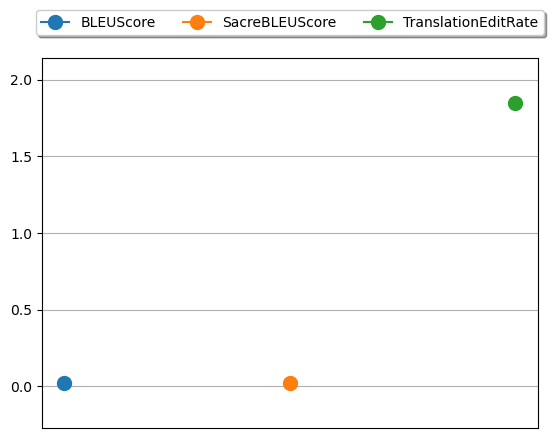

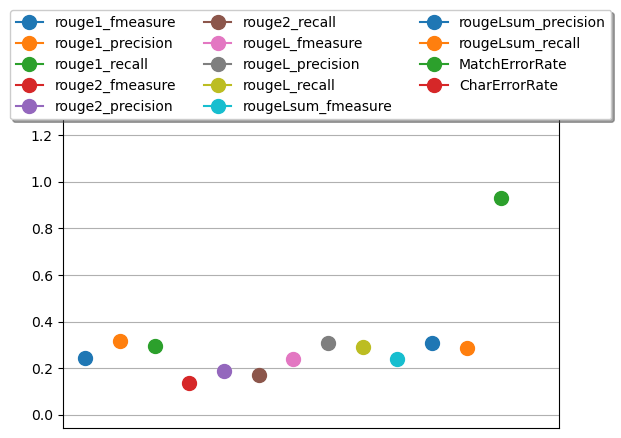

In [43]:
t_m_a, t_m_b = compute_metrics(train_preds)

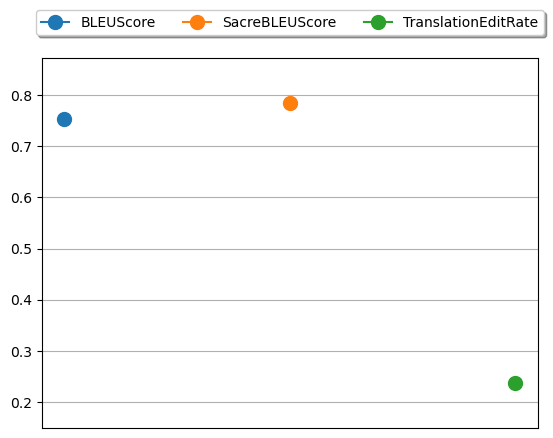

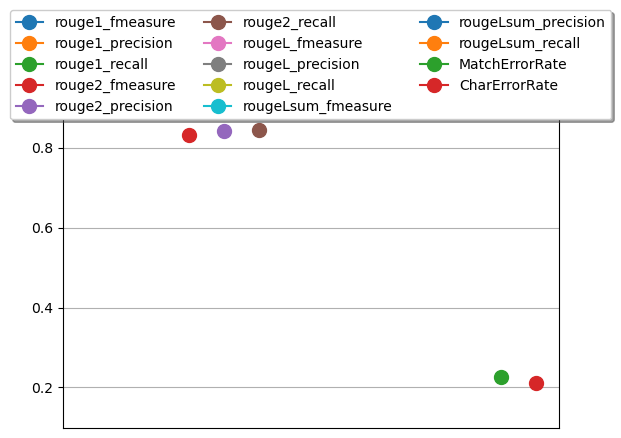

In [44]:
v_m_a, v_m_b = compute_metrics(eval_preds)

In [45]:
print(v_m_a)
print(v_m_b)

{'BLEUScore': tensor(0.7526), 'SacreBLEUScore': tensor(0.7841), 'TranslationEditRate': tensor(0.2370)}
{'rouge1_fmeasure': tensor(0.8993), 'rouge1_precision': tensor(0.9078), 'rouge1_recall': tensor(0.9115), 'rouge2_fmeasure': tensor(0.8319), 'rouge2_precision': tensor(0.8409), 'rouge2_recall': tensor(0.8435), 'rougeL_fmeasure': tensor(0.8943), 'rougeL_precision': tensor(0.9027), 'rougeL_recall': tensor(0.9062), 'rougeLsum_fmeasure': tensor(0.8942), 'rougeLsum_precision': tensor(0.9027), 'rougeLsum_recall': tensor(0.9061), 'MatchErrorRate': tensor(0.2269), 'CharErrorRate': tensor(0.2105)}


## Different params

In [16]:
def convert_snips_to_logic_features(examples, tokenizer, max_source_length=200, max_target_length=200):
    tokens = []
    masks = []
    cls_token = None
    sep_token = None
    if tokenizer.cls_token and tokenizer.sep_token:
        cls_token = tokenizer.cls_token
        sep_token = tokenizer.sep_token
    else:
        cls_token = tokenizer.bos_token
        sep_token = tokenizer.eos_token
    for example in examples:
        java_code, python_code = example

        source_tokens = tokenizer.tokenize(java_code)[:max_source_length-2]
        source_tokens =[cls_token]+source_tokens+[sep_token]
        source_ids =  tokenizer.convert_tokens_to_ids(source_tokens)
        source_mask = [1] * len(source_ids)
        padding_length = max_source_length - len(source_ids)
        source_ids+=[tokenizer.pad_token_id]*padding_length
        source_mask+=[0]*padding_length

        target_tokens = tokenizer.tokenize(python_code)[:max_target_length-2]
        target_tokens = [cls_token]+target_tokens+[sep_token]
        target_ids = tokenizer.convert_tokens_to_ids(target_tokens)
        target_mask = [1] * len(target_ids)
        padding_length = max_target_length - len(target_ids)
        target_ids+=[tokenizer.pad_token_id]*padding_length
        target_mask+=[0]*padding_length

        src_trg_tokens = source_ids + target_ids
        src_trg_mask = source_mask + target_mask

        tokens.append(torch.tensor(src_trg_tokens))
        masks.append(torch.tensor(src_trg_mask))


    return tokens, masks

In [17]:
def convert_examples_to_features(examples, tokenizer, max_source_length=200, max_target_length=200, stage=None):
    features = []
    cls_token = None
    sep_token = None
    if tokenizer.cls_token and tokenizer.sep_token:
        cls_token = tokenizer.cls_token
        sep_token = tokenizer.sep_token
    else:
        cls_token = tokenizer.bos_token
        sep_token = tokenizer.eos_token
    for example_index, example in enumerate(examples):
        #source
        source, target = example
        source_tokens = tokenizer.tokenize(source)[:max_source_length-2]
        source_tokens =[cls_token]+source_tokens+[sep_token]
        source_ids =  tokenizer.convert_tokens_to_ids(source_tokens)
        source_mask = [1] * (len(source_tokens))
        padding_length = max_source_length - len(source_ids)
        source_ids+=[tokenizer.pad_token_id]*padding_length
        source_mask+=[0]*padding_length

        #target
        if stage=="test":
            target_tokens = tokenizer.tokenize("None")
        else:
            target_tokens = tokenizer.tokenize(target)[:max_target_length-2]
        target_tokens = [cls_token]+target_tokens+[sep_token]
        target_ids = tokenizer.convert_tokens_to_ids(target_tokens)
        target_mask = [1] *len(target_ids)
        padding_length = max_target_length - len(target_ids)
        target_ids+=[tokenizer.pad_token_id]*padding_length
        target_mask+=[0]*padding_length


        features.append(
            (
                 example_index,
                 torch.tensor(source_ids, dtype=torch.long).to(device),
                 torch.tensor(target_ids, dtype=torch.long).to(device),
                 torch.tensor(source_mask, dtype=torch.long).to(device),
                 torch.tensor(target_mask, dtype=torch.long).to(device)
            )
        )
    return features

In [19]:
# trans_config = T5Config.from_pretrained(trans_model_name)
trans_tokenizer = PLBartTokenizer.from_pretrained(trans_model_name)
trans_model = PLBartForConditionalGeneration.from_pretrained(trans_model_name)
# trans_tokenizer = RobertaTokenizer.from_pretrained(trans_model_name)
# trans_model = T5ForConditionalGeneration.from_pretrained(trans_model_name)
# trans_model.config.ctc_zero_infinity = True
trans_model = trans_model.to(device)

torch.cuda.empty_cache()

TRANS_LOSS_PRC = 0.8
PY_LOSS_PRC = 0.1
LOGIC_LOSS_PRC = 0.1
MODEL_FILE_PREFIX = "plbart-half-data-trans-80-10-10-200"
optimizer = torch.optim.AdamW(trans_model.parameters(), lr = 1e-4)
cross_entropy = nn.CrossEntropyLoss()

In [20]:
random.seed(0)
train_snip_pairs_jp = read_snip_examples('/kaggle/working/XLCoST_data/generation/pair_data_tok_1/Java-Python/train-Java-Python-tok.java', '/kaggle/working/XLCoST_data/generation/pair_data_tok_1/Java-Python/train-Java-Python-tok.py')
train_snip_pairs_jp_dataset = CodeSnipPairsDataset(convert_examples_to_features(random.choices(train_snip_pairs_jp, k=int(len(train_snip_pairs_jp)/2)), trans_tokenizer))
val_snip_pairs_jp = read_snip_examples('/kaggle/working/XLCoST_data/generation/pair_data_tok_1/Java-Python/val-Java-Python-tok.java', '/kaggle/working/XLCoST_data/generation/pair_data_tok_1/Java-Python/val-Java-Python-tok.py')
val_snip_pairs_jp_dataset = CodeSnipPairsDataset(convert_examples_to_features(val_snip_pairs_jp, trans_tokenizer))

In [21]:
train_sampler = RandomSampler(train_snip_pairs_jp_dataset)
train_dataloader = DataLoader(train_snip_pairs_jp_dataset, sampler = train_sampler, batch_size = 10)

val_sampler = RandomSampler(val_snip_pairs_jp_dataset)
val_dataloader = DataLoader(val_snip_pairs_jp_dataset, sampler = val_sampler, batch_size = 10)

In [22]:
train_losses, valid_losses = train(epochs=1,
                                    examples=train_snip_pairs_jp,
                                    val_examples=val_snip_pairs_jp,
                                    trans_model=trans_model,
                                    ispy_model=py_model,
                                    logic_model=logic_model,
                                    trans_tok=trans_tokenizer,
                                    ispy_tok=py_tokenizer,
                                    logic_tok=logic_tokenizer,
                                    train_dataloader=train_dataloader,
                                    cross_entropy=cross_entropy,
                                    optimizer=optimizer,
                                    val_dataloader=val_dataloader,
                                    max_target_length=200,
                                    beam_size=5)

  0%|          | 0/1 [00:00<?, ?it/s]
0it [00:00, ?it/s]We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.

1it [00:05,  5.28s/it]
2it [00:08,  4.32s/it]
3it [00:12,  4.00s/it]
4it [00:16,  3.85s/it]
5it [00:19,  3.77s/it]
6it [00:23,  3.88s/it]
7it [00:27,  3.80s/it]
8it [00:31,  3.75s/it]
9it [00:34,  3.75s/it]
10it [00:38,  3.72s/it]
11it [00:42,  3.69s/it]
12it [00:45,  3.69s/it]
13it [00:49,  3.68s/it]
14it [00:53,  3.69s/it]
15it [00:57,  3.80s/it]
16it [01:00,  3.76s/it]
17it [01:04,  3.73s/it]
18it [01:08,  3.64s/it]
19it [01:11,  3.62s/it]
20it [01:15,  3.60s/it]
21it [01:18,  3.57s/it]
22it [01:22,  3.50s/it]
23it [01:25,  3.48s/it]
24it [01:29,  3.51s/it]
25it [01:32,  3.45s/it]
26it [01:35,  3.42s/it]
27it [01:38,  3.36s/it]
28it [01:41,  3.04s/it]
29it [01:44,  3.10s/it]
30it [01:47,  3.19s/it]
31it [01:51,  3.19s/it]
32it [0

  Batch    50  of  3,888.
curr_loss: 0.3286055624485016



52it [03:01,  3.28s/it]
53it [03:05,  3.32s/it]
54it [03:08,  3.31s/it]
55it [03:11,  3.29s/it]
56it [03:14,  3.05s/it]
57it [03:16,  2.80s/it]
58it [03:19,  2.74s/it]
59it [03:22,  2.80s/it]
60it [03:23,  2.52s/it]
61it [03:25,  2.17s/it]
62it [03:26,  1.90s/it]
63it [03:29,  2.06s/it]
64it [03:32,  2.38s/it]
65it [03:34,  2.37s/it]
66it [03:37,  2.56s/it]
67it [03:40,  2.70s/it]
68it [03:42,  2.55s/it]
69it [03:43,  2.14s/it]
70it [03:47,  2.45s/it]
71it [03:50,  2.67s/it]
72it [03:52,  2.51s/it]
73it [03:55,  2.70s/it]
74it [03:57,  2.35s/it]
75it [04:00,  2.57s/it]
76it [04:02,  2.44s/it]
77it [04:03,  2.15s/it]
78it [04:05,  1.98s/it]
79it [04:06,  1.73s/it]
80it [04:07,  1.64s/it]
81it [04:10,  2.04s/it]
82it [04:13,  2.34s/it]
83it [04:15,  2.11s/it]
84it [04:16,  1.77s/it]
85it [04:17,  1.65s/it]
86it [04:19,  1.58s/it]
87it [04:20,  1.41s/it]
88it [04:21,  1.37s/it]
89it [04:24,  1.89s/it]
90it [04:25,  1.71s/it]
91it [04:27,  1.56s/it]
92it [04:30,  1.99s/it]
93it [04:33,  2

  Batch   100  of  3,888.
curr_loss: 0.20877595245838165



102it [04:54,  1.90s/it]
103it [04:56,  2.05s/it]
104it [04:59,  2.11s/it]
105it [05:02,  2.40s/it]
106it [05:04,  2.50s/it]
107it [05:06,  2.10s/it]
108it [05:09,  2.49s/it]
109it [05:10,  2.19s/it]
110it [05:12,  2.03s/it]
111it [05:14,  1.99s/it]
112it [05:16,  1.90s/it]
113it [05:17,  1.71s/it]
114it [05:18,  1.63s/it]
115it [05:20,  1.73s/it]
116it [05:21,  1.54s/it]
117it [05:24,  1.76s/it]
118it [05:27,  2.14s/it]
119it [05:28,  1.96s/it]
120it [05:31,  2.32s/it]
121it [05:35,  2.57s/it]
122it [05:36,  2.17s/it]
123it [05:38,  2.18s/it]
124it [05:39,  1.94s/it]
125it [05:41,  1.84s/it]
126it [05:42,  1.61s/it]
127it [05:43,  1.53s/it]
128it [05:45,  1.60s/it]
129it [05:47,  1.55s/it]
130it [05:48,  1.48s/it]
131it [05:50,  1.73s/it]
132it [05:53,  2.14s/it]
133it [05:55,  2.00s/it]
134it [05:57,  2.11s/it]
135it [05:59,  2.08s/it]
136it [06:01,  1.88s/it]
137it [06:03,  1.94s/it]
138it [06:04,  1.73s/it]
139it [06:06,  1.66s/it]
140it [06:07,  1.67s/it]
141it [06:08,  1.50s/it]

  Batch   150  of  3,888.
curr_loss: 0.19620949029922485



152it [06:30,  1.68s/it]
153it [06:33,  2.05s/it]
154it [06:35,  1.87s/it]
155it [06:36,  1.66s/it]
156it [06:37,  1.61s/it]
157it [06:39,  1.49s/it]
158it [06:40,  1.44s/it]
159it [06:42,  1.51s/it]
160it [06:43,  1.41s/it]
161it [06:45,  1.53s/it]
162it [06:46,  1.47s/it]
163it [06:48,  1.77s/it]
164it [06:50,  1.70s/it]
165it [06:52,  1.75s/it]
166it [06:53,  1.65s/it]
167it [06:55,  1.81s/it]
168it [06:57,  1.72s/it]
169it [06:58,  1.66s/it]
170it [07:00,  1.54s/it]
171it [07:01,  1.46s/it]
172it [07:03,  1.60s/it]
173it [07:04,  1.51s/it]
174it [07:07,  1.96s/it]
175it [07:09,  1.82s/it]
176it [07:11,  1.88s/it]
177it [07:14,  2.24s/it]
178it [07:15,  1.93s/it]
179it [07:17,  1.91s/it]
180it [07:19,  1.91s/it]
181it [07:21,  1.88s/it]
182it [07:22,  1.83s/it]
183it [07:24,  1.80s/it]
184it [07:25,  1.64s/it]
185it [07:27,  1.67s/it]
186it [07:28,  1.57s/it]
187it [07:30,  1.51s/it]
188it [07:32,  1.76s/it]
189it [07:35,  2.14s/it]
190it [07:37,  1.94s/it]
191it [07:39,  2.16s/it]

  Batch   200  of  3,888.
curr_loss: 0.23696380853652954



202it [08:00,  1.80s/it]
203it [08:02,  1.67s/it]
204it [08:03,  1.57s/it]
205it [08:05,  1.54s/it]
206it [08:06,  1.57s/it]
207it [08:08,  1.62s/it]
208it [08:09,  1.50s/it]
209it [08:10,  1.34s/it]
210it [08:13,  1.77s/it]
211it [08:16,  2.07s/it]
212it [08:18,  2.07s/it]
213it [08:20,  2.04s/it]
214it [08:23,  2.35s/it]
215it [08:24,  2.13s/it]
216it [08:26,  2.03s/it]
217it [08:27,  1.81s/it]
218it [08:30,  1.90s/it]
219it [08:31,  1.73s/it]
220it [08:34,  2.02s/it]
221it [08:35,  1.92s/it]
222it [08:37,  1.95s/it]
223it [08:39,  1.79s/it]
224it [08:40,  1.72s/it]
225it [08:41,  1.55s/it]
226it [08:43,  1.51s/it]
227it [08:45,  1.58s/it]
228it [08:46,  1.42s/it]
229it [08:47,  1.28s/it]
230it [08:49,  1.62s/it]
231it [08:50,  1.53s/it]
232it [08:52,  1.49s/it]
233it [08:53,  1.38s/it]
234it [08:55,  1.54s/it]
235it [08:56,  1.47s/it]
236it [08:58,  1.50s/it]
237it [09:00,  1.67s/it]
238it [09:01,  1.60s/it]
239it [09:04,  2.07s/it]
240it [09:06,  1.84s/it]
241it [09:08,  1.86s/it]

  Batch   250  of  3,888.
curr_loss: 0.20753175020217896


251it [09:26,  1.88s/it]
252it [09:28,  1.93s/it]
253it [09:30,  1.93s/it]
254it [09:33,  2.26s/it]
255it [09:34,  1.92s/it]
256it [09:35,  1.64s/it]
257it [09:38,  2.04s/it]
258it [09:39,  1.78s/it]
259it [09:41,  1.75s/it]
260it [09:42,  1.67s/it]
261it [09:43,  1.53s/it]
262it [09:45,  1.61s/it]
263it [09:47,  1.61s/it]
264it [09:48,  1.56s/it]
265it [09:49,  1.45s/it]
266it [09:51,  1.62s/it]
267it [09:53,  1.73s/it]
268it [09:55,  1.58s/it]
269it [09:56,  1.55s/it]
270it [09:57,  1.42s/it]
271it [09:59,  1.40s/it]
272it [10:00,  1.29s/it]
273it [10:01,  1.34s/it]
274it [10:02,  1.35s/it]
275it [10:03,  1.26s/it]
276it [10:06,  1.78s/it]
277it [10:08,  1.60s/it]
278it [10:09,  1.67s/it]
279it [10:11,  1.67s/it]
280it [10:12,  1.55s/it]
281it [10:14,  1.69s/it]
282it [10:16,  1.71s/it]
283it [10:17,  1.55s/it]
284it [10:19,  1.53s/it]
285it [10:20,  1.57s/it]
286it [10:23,  1.83s/it]
287it [10:24,  1.65s/it]
288it [10:26,  1.72s/it]
289it [10:28,  1.74s/it]
290it [10:30,  1.87s/it]


  Batch   300  of  3,888.
curr_loss: 0.15399961173534393



302it [10:52,  1.82s/it]
303it [10:54,  1.93s/it]
304it [10:56,  1.73s/it]
305it [10:57,  1.58s/it]
306it [11:00,  2.01s/it]
307it [11:02,  2.05s/it]
308it [11:04,  1.89s/it]
309it [11:05,  1.72s/it]
310it [11:06,  1.64s/it]
311it [11:08,  1.52s/it]
312it [11:09,  1.38s/it]
313it [11:10,  1.30s/it]
314it [11:12,  1.43s/it]
315it [11:13,  1.37s/it]
316it [11:15,  1.60s/it]
317it [11:17,  1.76s/it]
318it [11:18,  1.54s/it]
319it [11:19,  1.42s/it]
320it [11:21,  1.45s/it]
321it [11:22,  1.44s/it]
322it [11:23,  1.39s/it]
323it [11:27,  2.00s/it]
324it [11:28,  1.76s/it]
325it [11:30,  1.93s/it]
326it [11:33,  1.99s/it]
327it [11:34,  1.91s/it]
328it [11:36,  1.80s/it]
329it [11:38,  1.77s/it]
330it [11:41,  2.15s/it]
331it [11:42,  1.91s/it]
332it [11:44,  1.83s/it]
333it [11:46,  2.04s/it]
334it [11:48,  1.91s/it]
335it [11:50,  1.95s/it]
336it [11:53,  2.28s/it]
337it [11:56,  2.51s/it]
338it [11:57,  2.17s/it]
339it [11:58,  1.86s/it]
340it [12:00,  1.82s/it]
341it [12:02,  1.85s/it]

  Batch   350  of  3,888.
curr_loss: 0.15864431858062744



352it [12:27,  2.19s/it]
353it [12:29,  2.31s/it]
354it [12:32,  2.30s/it]
355it [12:33,  1.95s/it]
356it [12:34,  1.83s/it]
357it [12:36,  1.80s/it]
358it [12:39,  1.99s/it]
359it [12:41,  2.06s/it]
360it [12:42,  1.79s/it]
361it [12:44,  1.79s/it]
362it [12:45,  1.59s/it]
363it [12:46,  1.59s/it]
364it [12:48,  1.64s/it]
365it [12:49,  1.46s/it]
366it [12:51,  1.66s/it]
367it [12:53,  1.67s/it]
368it [12:54,  1.54s/it]
369it [12:56,  1.49s/it]
370it [12:57,  1.56s/it]
371it [12:58,  1.40s/it]
372it [13:00,  1.40s/it]
373it [13:02,  1.64s/it]
374it [13:04,  1.61s/it]
375it [13:05,  1.45s/it]
376it [13:06,  1.39s/it]
377it [13:07,  1.33s/it]
378it [13:08,  1.30s/it]
379it [13:10,  1.37s/it]
380it [13:12,  1.63s/it]
381it [13:15,  1.90s/it]
382it [13:18,  2.27s/it]
383it [13:20,  2.24s/it]
384it [13:21,  2.02s/it]
385it [13:23,  1.87s/it]
386it [13:24,  1.64s/it]
387it [13:26,  1.72s/it]
388it [13:27,  1.59s/it]
389it [13:30,  1.94s/it]
390it [13:31,  1.76s/it]
391it [13:33,  1.77s/it]

  Batch   400  of  3,888.
curr_loss: 0.1867251992225647



402it [13:52,  1.75s/it]
403it [13:55,  2.17s/it]
404it [13:57,  1.90s/it]
405it [13:58,  1.79s/it]
406it [14:01,  2.17s/it]
407it [14:03,  2.11s/it]
408it [14:05,  1.88s/it]
409it [14:06,  1.76s/it]
410it [14:08,  1.76s/it]
411it [14:09,  1.52s/it]
412it [14:11,  1.55s/it]
413it [14:12,  1.46s/it]
414it [14:13,  1.43s/it]
415it [14:15,  1.46s/it]
416it [14:16,  1.35s/it]
417it [14:17,  1.27s/it]
418it [14:18,  1.37s/it]
419it [14:20,  1.45s/it]
420it [14:22,  1.50s/it]
421it [14:23,  1.56s/it]
422it [14:25,  1.56s/it]
423it [14:27,  1.61s/it]
424it [14:28,  1.60s/it]
425it [14:29,  1.45s/it]
426it [14:30,  1.31s/it]
427it [14:32,  1.47s/it]
428it [14:34,  1.51s/it]
429it [14:35,  1.50s/it]
430it [14:37,  1.73s/it]
431it [14:39,  1.60s/it]
432it [14:42,  2.05s/it]
433it [14:44,  2.07s/it]
434it [14:46,  2.13s/it]
435it [14:48,  2.01s/it]
436it [14:50,  1.93s/it]
437it [14:51,  1.76s/it]
438it [14:53,  1.75s/it]
439it [14:55,  1.89s/it]
440it [14:56,  1.61s/it]
441it [14:57,  1.47s/it]

  Batch   450  of  3,888.
curr_loss: 0.22792372107505798



452it [15:20,  2.34s/it]
453it [15:22,  2.11s/it]
454it [15:23,  1.96s/it]
455it [15:25,  1.78s/it]
456it [15:27,  1.78s/it]
457it [15:28,  1.57s/it]
458it [15:29,  1.55s/it]
459it [15:31,  1.64s/it]
460it [15:33,  1.65s/it]
461it [15:34,  1.69s/it]
462it [15:36,  1.62s/it]
463it [15:38,  1.61s/it]
464it [15:39,  1.56s/it]
465it [15:40,  1.47s/it]
466it [15:41,  1.33s/it]
467it [15:42,  1.30s/it]
468it [15:44,  1.41s/it]
469it [15:46,  1.43s/it]
470it [15:47,  1.44s/it]
471it [15:50,  1.89s/it]
472it [15:51,  1.67s/it]
473it [15:52,  1.52s/it]
474it [15:53,  1.41s/it]
475it [15:55,  1.44s/it]
476it [15:58,  1.91s/it]
477it [16:01,  2.27s/it]
478it [16:03,  2.02s/it]
479it [16:04,  1.96s/it]
480it [16:06,  1.81s/it]
481it [16:07,  1.60s/it]
482it [16:08,  1.46s/it]
483it [16:10,  1.57s/it]
484it [16:12,  1.71s/it]
485it [16:15,  2.12s/it]
486it [16:16,  1.86s/it]
487it [16:18,  1.79s/it]
488it [16:19,  1.62s/it]
489it [16:22,  1.86s/it]
490it [16:23,  1.75s/it]
491it [16:24,  1.55s/it]

  Batch   500  of  3,888.
curr_loss: 0.21010735630989075



502it [16:43,  1.56s/it]
503it [16:45,  1.55s/it]
504it [16:46,  1.49s/it]
505it [16:48,  1.49s/it]
506it [16:50,  1.68s/it]
507it [16:52,  1.83s/it]
508it [16:53,  1.72s/it]
509it [16:56,  2.11s/it]
510it [16:58,  1.93s/it]
511it [16:59,  1.84s/it]
512it [17:01,  1.64s/it]
513it [17:04,  2.06s/it]
514it [17:07,  2.34s/it]
515it [17:08,  2.04s/it]
516it [17:09,  1.86s/it]
517it [17:11,  1.70s/it]
518it [17:14,  2.26s/it]
519it [17:17,  2.31s/it]
520it [17:18,  2.02s/it]
521it [17:20,  1.87s/it]
522it [17:21,  1.75s/it]
523it [17:23,  1.78s/it]
524it [17:24,  1.71s/it]
525it [17:26,  1.69s/it]
526it [17:29,  1.91s/it]
527it [17:32,  2.24s/it]
528it [17:34,  2.16s/it]
529it [17:35,  1.82s/it]
530it [17:36,  1.74s/it]
531it [17:37,  1.61s/it]
532it [17:39,  1.59s/it]
533it [17:40,  1.51s/it]
534it [17:42,  1.46s/it]
535it [17:43,  1.40s/it]
536it [17:45,  1.51s/it]
537it [17:46,  1.45s/it]
538it [17:47,  1.42s/it]
539it [17:48,  1.32s/it]
540it [17:50,  1.28s/it]
541it [17:51,  1.29s/it]

  Batch   550  of  3,888.
curr_loss: 0.18112650513648987


551it [18:10,  1.84s/it]
552it [18:12,  2.10s/it]
553it [18:13,  1.80s/it]
554it [18:15,  1.82s/it]
555it [18:17,  1.68s/it]
556it [18:18,  1.48s/it]
557it [18:19,  1.43s/it]
558it [18:21,  1.52s/it]
559it [18:22,  1.51s/it]
560it [18:24,  1.68s/it]
561it [18:25,  1.54s/it]
562it [18:27,  1.63s/it]
563it [18:29,  1.60s/it]
564it [18:31,  1.64s/it]
565it [18:32,  1.58s/it]
566it [18:34,  1.62s/it]
567it [18:36,  1.77s/it]
568it [18:39,  2.14s/it]
569it [18:41,  2.15s/it]
570it [18:42,  1.85s/it]
571it [18:44,  1.76s/it]
572it [18:45,  1.67s/it]
573it [18:47,  1.79s/it]
574it [18:49,  1.88s/it]
575it [18:51,  1.87s/it]
576it [18:53,  1.99s/it]
577it [18:56,  2.30s/it]
578it [18:57,  1.92s/it]
579it [18:59,  1.84s/it]
580it [19:00,  1.68s/it]
581it [19:02,  1.58s/it]
582it [19:03,  1.51s/it]
583it [19:05,  1.48s/it]
584it [19:06,  1.52s/it]
585it [19:08,  1.48s/it]
586it [19:09,  1.45s/it]
587it [19:11,  1.76s/it]
588it [19:15,  2.16s/it]
589it [19:18,  2.46s/it]
590it [19:19,  2.11s/it]


  Batch   600  of  3,888.
curr_loss: 0.16103728115558624



602it [19:43,  2.09s/it]
603it [19:45,  2.24s/it]
604it [19:47,  2.04s/it]
605it [19:49,  2.12s/it]
606it [19:51,  1.85s/it]
607it [19:53,  1.91s/it]
608it [19:54,  1.79s/it]
609it [19:57,  2.19s/it]
610it [19:59,  2.14s/it]
611it [20:01,  2.07s/it]
612it [20:02,  1.84s/it]
613it [20:05,  1.98s/it]
614it [20:07,  2.02s/it]
615it [20:09,  2.05s/it]
616it [20:10,  1.78s/it]
617it [20:12,  1.68s/it]
618it [20:14,  1.99s/it]
619it [20:16,  1.78s/it]
620it [20:17,  1.68s/it]
621it [20:18,  1.53s/it]
622it [20:20,  1.52s/it]
623it [20:23,  1.99s/it]
624it [20:24,  1.77s/it]
625it [20:25,  1.56s/it]
626it [20:26,  1.47s/it]
627it [20:28,  1.59s/it]
628it [20:30,  1.65s/it]
629it [20:32,  1.76s/it]
630it [20:34,  1.73s/it]
631it [20:35,  1.63s/it]
632it [20:36,  1.54s/it]
633it [20:38,  1.42s/it]
634it [20:39,  1.42s/it]
635it [20:40,  1.43s/it]
636it [20:42,  1.36s/it]
637it [20:43,  1.44s/it]
638it [20:45,  1.48s/it]
639it [20:46,  1.48s/it]
640it [20:48,  1.40s/it]
641it [20:50,  1.56s/it]

  Batch   650  of  3,888.
curr_loss: 0.2093261480331421



652it [21:11,  1.97s/it]
653it [21:13,  1.92s/it]
654it [21:14,  1.78s/it]
655it [21:15,  1.66s/it]
656it [21:17,  1.60s/it]
657it [21:20,  2.04s/it]
658it [21:22,  2.02s/it]
659it [21:24,  1.90s/it]
660it [21:25,  1.81s/it]
661it [21:27,  1.66s/it]
662it [21:28,  1.56s/it]
663it [21:29,  1.47s/it]
664it [21:30,  1.34s/it]
665it [21:31,  1.28s/it]
666it [21:33,  1.36s/it]
667it [21:34,  1.35s/it]
668it [21:36,  1.35s/it]
669it [21:37,  1.46s/it]
670it [21:38,  1.36s/it]
671it [21:40,  1.48s/it]
672it [21:41,  1.39s/it]
673it [21:44,  1.75s/it]
674it [21:45,  1.65s/it]
675it [21:47,  1.80s/it]
676it [21:49,  1.69s/it]
677it [21:50,  1.52s/it]
678it [21:52,  1.70s/it]
679it [21:54,  1.72s/it]
680it [21:55,  1.51s/it]
681it [21:58,  1.84s/it]
682it [21:59,  1.84s/it]
683it [22:02,  2.18s/it]
684it [22:04,  2.03s/it]
685it [22:07,  2.32s/it]
686it [22:10,  2.38s/it]
687it [22:11,  2.01s/it]
688it [22:12,  1.74s/it]
689it [22:13,  1.65s/it]
690it [22:15,  1.55s/it]
691it [22:17,  1.71s/it]

  Batch   700  of  3,888.
curr_loss: 0.21157683432102203



702it [22:34,  1.53s/it]
703it [22:36,  1.66s/it]
704it [22:38,  1.70s/it]
705it [22:39,  1.72s/it]
706it [22:41,  1.67s/it]
707it [22:42,  1.56s/it]
708it [22:45,  1.88s/it]
709it [22:46,  1.78s/it]
710it [22:48,  1.77s/it]
711it [22:50,  1.69s/it]
712it [22:52,  1.84s/it]
713it [22:53,  1.60s/it]
714it [22:55,  1.62s/it]
715it [22:56,  1.63s/it]
716it [22:57,  1.51s/it]
717it [22:59,  1.54s/it]
718it [23:00,  1.48s/it]
719it [23:02,  1.62s/it]
720it [23:04,  1.57s/it]
721it [23:05,  1.49s/it]
722it [23:06,  1.41s/it]
723it [23:08,  1.38s/it]
724it [23:11,  1.83s/it]
725it [23:13,  1.88s/it]
726it [23:14,  1.67s/it]
727it [23:16,  1.72s/it]
728it [23:17,  1.53s/it]
729it [23:18,  1.48s/it]
730it [23:19,  1.45s/it]
731it [23:21,  1.56s/it]
732it [23:23,  1.53s/it]
733it [23:24,  1.48s/it]
734it [23:25,  1.42s/it]
735it [23:26,  1.34s/it]
736it [23:28,  1.39s/it]
737it [23:29,  1.35s/it]
738it [23:31,  1.54s/it]
739it [23:33,  1.69s/it]
740it [23:34,  1.55s/it]
741it [23:36,  1.54s/it]

  Batch   750  of  3,888.
curr_loss: 0.21529603004455566



752it [23:55,  1.97s/it]
753it [23:58,  2.28s/it]
754it [24:01,  2.50s/it]
755it [24:04,  2.82s/it]
756it [24:05,  2.29s/it]
757it [24:07,  2.15s/it]
758it [24:09,  1.94s/it]
759it [24:10,  1.89s/it]
760it [24:12,  1.84s/it]
761it [24:14,  1.68s/it]
762it [24:15,  1.66s/it]
763it [24:16,  1.55s/it]
764it [24:18,  1.42s/it]
765it [24:20,  1.88s/it]
766it [24:22,  1.68s/it]
767it [24:23,  1.47s/it]
768it [24:25,  1.59s/it]
769it [24:26,  1.64s/it]
770it [24:27,  1.45s/it]
771it [24:29,  1.41s/it]
772it [24:30,  1.43s/it]
773it [24:33,  1.99s/it]
774it [24:35,  1.94s/it]
775it [24:37,  1.76s/it]
776it [24:38,  1.54s/it]
777it [24:39,  1.52s/it]
778it [24:40,  1.45s/it]
779it [24:42,  1.52s/it]
780it [24:44,  1.53s/it]
781it [24:45,  1.45s/it]
782it [24:46,  1.40s/it]
783it [24:47,  1.30s/it]
784it [24:50,  1.83s/it]
785it [24:53,  2.02s/it]
786it [24:54,  1.79s/it]
787it [24:56,  1.73s/it]
788it [24:58,  1.80s/it]
789it [24:59,  1.84s/it]
790it [25:02,  1.93s/it]
791it [25:03,  1.78s/it]

  Batch   800  of  3,888.
curr_loss: 0.19777929782867432



802it [25:22,  1.68s/it]
803it [25:24,  1.81s/it]
804it [25:25,  1.65s/it]
805it [25:27,  1.71s/it]
806it [25:29,  1.82s/it]
807it [25:31,  1.70s/it]
808it [25:32,  1.70s/it]
809it [25:34,  1.68s/it]
810it [25:35,  1.64s/it]
811it [25:37,  1.61s/it]
812it [25:39,  1.65s/it]
813it [25:41,  1.77s/it]
814it [25:42,  1.55s/it]
815it [25:43,  1.50s/it]
816it [25:45,  1.51s/it]
817it [25:46,  1.54s/it]
818it [25:48,  1.52s/it]
819it [25:49,  1.53s/it]
820it [25:50,  1.42s/it]
821it [25:53,  1.62s/it]
822it [25:54,  1.48s/it]
823it [25:55,  1.44s/it]
824it [25:57,  1.45s/it]
825it [25:58,  1.50s/it]
826it [26:01,  1.79s/it]
827it [26:02,  1.70s/it]
828it [26:04,  1.85s/it]
829it [26:06,  1.73s/it]
830it [26:07,  1.50s/it]
831it [26:08,  1.56s/it]
832it [26:10,  1.48s/it]
833it [26:11,  1.34s/it]
834it [26:12,  1.32s/it]
835it [26:14,  1.45s/it]
836it [26:15,  1.41s/it]
837it [26:16,  1.39s/it]
838it [26:19,  1.68s/it]
839it [26:20,  1.63s/it]
840it [26:22,  1.52s/it]
841it [26:23,  1.55s/it]

  Batch   850  of  3,888.
curr_loss: 0.18898391723632812



851it [26:39,  1.67s/it]
852it [26:41,  1.75s/it]
853it [26:43,  1.76s/it]
854it [26:44,  1.65s/it]
855it [26:47,  2.09s/it]
856it [26:49,  1.99s/it]
857it [26:51,  1.87s/it]
858it [26:53,  1.95s/it]
859it [26:55,  1.93s/it]
860it [26:58,  2.24s/it]
861it [26:59,  1.90s/it]
862it [27:00,  1.66s/it]
863it [27:01,  1.45s/it]
864it [27:02,  1.53s/it]
865it [27:04,  1.56s/it]
866it [27:05,  1.43s/it]
867it [27:06,  1.28s/it]
868it [27:07,  1.30s/it]
869it [27:09,  1.52s/it]
870it [27:11,  1.58s/it]
871it [27:13,  1.60s/it]
872it [27:14,  1.52s/it]
873it [27:16,  1.59s/it]
874it [27:17,  1.58s/it]
875it [27:19,  1.54s/it]
876it [27:20,  1.44s/it]
877it [27:22,  1.61s/it]
878it [27:24,  1.61s/it]
879it [27:25,  1.46s/it]
880it [27:26,  1.36s/it]
881it [27:29,  1.86s/it]
882it [27:31,  1.85s/it]
883it [27:32,  1.76s/it]
884it [27:34,  1.67s/it]
885it [27:35,  1.61s/it]
886it [27:36,  1.42s/it]
887it [27:38,  1.47s/it]
888it [27:39,  1.46s/it]
889it [27:41,  1.42s/it]
890it [27:43,  1.65s/it]

  Batch   900  of  3,888.
curr_loss: 0.19693581759929657



902it [28:10,  1.84s/it]
903it [28:11,  1.66s/it]
904it [28:13,  1.83s/it]
905it [28:16,  2.21s/it]
906it [28:18,  2.20s/it]
907it [28:20,  2.04s/it]
908it [28:22,  1.91s/it]
909it [28:23,  1.77s/it]
910it [28:26,  2.16s/it]
911it [28:28,  2.14s/it]
912it [28:30,  2.06s/it]
913it [28:32,  1.92s/it]
914it [28:34,  1.89s/it]
915it [28:35,  1.74s/it]
916it [28:36,  1.53s/it]
917it [28:37,  1.39s/it]
918it [28:38,  1.36s/it]
919it [28:40,  1.38s/it]
920it [28:42,  1.77s/it]
921it [28:44,  1.83s/it]
922it [28:47,  1.99s/it]
923it [28:48,  1.75s/it]
924it [28:50,  1.68s/it]
925it [28:51,  1.71s/it]
926it [28:53,  1.66s/it]
927it [28:54,  1.55s/it]
928it [28:55,  1.49s/it]
929it [28:57,  1.39s/it]
930it [28:58,  1.39s/it]
931it [28:59,  1.39s/it]
932it [29:01,  1.33s/it]
933it [29:02,  1.30s/it]
934it [29:03,  1.25s/it]
935it [29:05,  1.34s/it]
936it [29:07,  1.72s/it]
937it [29:09,  1.65s/it]
938it [29:10,  1.49s/it]
939it [29:11,  1.52s/it]
940it [29:14,  1.84s/it]
941it [29:16,  1.99s/it]

  Batch   950  of  3,888.
curr_loss: 0.21067383885383606



952it [29:36,  1.58s/it]
953it [29:38,  1.54s/it]
954it [29:39,  1.52s/it]
955it [29:41,  1.54s/it]
956it [29:42,  1.59s/it]
957it [29:45,  1.76s/it]
958it [29:46,  1.62s/it]
959it [29:47,  1.48s/it]
960it [29:48,  1.43s/it]
961it [29:50,  1.51s/it]
962it [29:52,  1.70s/it]
963it [29:54,  1.59s/it]
964it [29:55,  1.52s/it]
965it [29:57,  1.65s/it]
966it [29:59,  1.91s/it]
967it [30:01,  1.89s/it]
968it [30:03,  1.73s/it]
969it [30:04,  1.64s/it]
970it [30:05,  1.53s/it]
971it [30:07,  1.50s/it]
972it [30:09,  1.79s/it]
973it [30:10,  1.62s/it]
974it [30:12,  1.60s/it]
975it [30:14,  1.71s/it]
976it [30:16,  1.72s/it]
977it [30:17,  1.73s/it]
978it [30:18,  1.52s/it]
979it [30:19,  1.37s/it]
980it [30:21,  1.57s/it]
981it [30:24,  1.86s/it]
982it [30:25,  1.70s/it]
983it [30:27,  1.71s/it]
984it [30:28,  1.57s/it]
985it [30:31,  2.03s/it]
986it [30:33,  1.93s/it]
987it [30:35,  1.80s/it]
988it [30:37,  2.11s/it]
989it [30:39,  1.87s/it]
990it [30:40,  1.71s/it]
991it [30:43,  2.14s/it]

  Batch 1,000  of  3,888.
curr_loss: 0.24361076951026917



1002it [31:00,  1.51s/it]
1003it [31:02,  1.55s/it]
1004it [31:03,  1.48s/it]
1005it [31:05,  1.43s/it]
1006it [31:06,  1.57s/it]
1007it [31:08,  1.49s/it]
1008it [31:09,  1.46s/it]
1009it [31:10,  1.38s/it]
1010it [31:12,  1.35s/it]
1011it [31:13,  1.30s/it]
1012it [31:15,  1.66s/it]
1013it [31:17,  1.74s/it]
1014it [31:19,  1.62s/it]
1015it [31:21,  1.82s/it]
1016it [31:23,  1.93s/it]
1017it [31:26,  2.24s/it]
1018it [31:28,  2.07s/it]
1019it [31:29,  1.94s/it]
1020it [31:31,  1.75s/it]
1021it [31:32,  1.67s/it]
1022it [31:33,  1.55s/it]
1023it [31:35,  1.42s/it]
1024it [31:37,  1.59s/it]
1025it [31:38,  1.51s/it]
1026it [31:40,  1.68s/it]
1027it [31:41,  1.54s/it]
1028it [31:43,  1.52s/it]
1029it [31:44,  1.57s/it]
1030it [31:46,  1.65s/it]
1031it [31:48,  1.64s/it]
1032it [31:49,  1.61s/it]
1033it [31:51,  1.60s/it]
1034it [31:52,  1.62s/it]
1035it [31:54,  1.61s/it]
1036it [31:56,  1.64s/it]
1037it [31:58,  1.71s/it]
1038it [31:59,  1.54s/it]
1039it [32:01,  1.68s/it]
1040it [32:

  Batch 1,050  of  3,888.
curr_loss: 0.18051642179489136



1052it [32:21,  1.80s/it]
1053it [32:23,  1.73s/it]
1054it [32:24,  1.58s/it]
1055it [32:26,  1.60s/it]
1056it [32:28,  1.90s/it]
1057it [32:30,  1.85s/it]
1058it [32:33,  2.07s/it]
1059it [32:35,  2.08s/it]
1060it [32:37,  2.15s/it]
1061it [32:40,  2.41s/it]
1062it [32:41,  2.05s/it]
1063it [32:43,  1.86s/it]
1064it [32:44,  1.65s/it]
1065it [32:46,  1.75s/it]
1066it [32:49,  2.08s/it]
1067it [32:50,  1.91s/it]
1068it [32:53,  2.09s/it]
1069it [32:54,  1.83s/it]
1070it [32:56,  1.73s/it]
1071it [32:59,  2.22s/it]
1072it [33:00,  1.99s/it]
1073it [33:02,  1.84s/it]
1074it [33:05,  2.12s/it]
1075it [33:06,  2.01s/it]
1076it [33:09,  2.09s/it]
1077it [33:10,  1.82s/it]
1078it [33:11,  1.64s/it]
1079it [33:13,  1.77s/it]
1080it [33:15,  1.75s/it]
1081it [33:18,  2.14s/it]
1082it [33:21,  2.29s/it]
1083it [33:23,  2.36s/it]
1084it [33:24,  2.04s/it]
1085it [33:26,  1.89s/it]
1086it [33:27,  1.71s/it]
1087it [33:29,  1.66s/it]
1088it [33:30,  1.67s/it]
1089it [33:32,  1.73s/it]
1090it [33:

  Batch 1,100  of  3,888.
curr_loss: 0.19223374128341675



1102it [33:53,  1.39s/it]
1103it [33:55,  1.61s/it]
1104it [33:57,  1.70s/it]
1105it [34:00,  2.08s/it]
1106it [34:02,  1.90s/it]
1107it [34:03,  1.77s/it]
1108it [34:05,  1.74s/it]
1109it [34:07,  1.78s/it]
1110it [34:08,  1.56s/it]
1111it [34:09,  1.49s/it]
1112it [34:11,  1.59s/it]
1113it [34:12,  1.46s/it]
1114it [34:14,  1.58s/it]
1115it [34:15,  1.55s/it]
1116it [34:16,  1.39s/it]
1117it [34:18,  1.36s/it]
1118it [34:19,  1.36s/it]
1119it [34:21,  1.67s/it]
1120it [34:23,  1.59s/it]
1121it [34:24,  1.50s/it]
1122it [34:26,  1.50s/it]
1123it [34:27,  1.57s/it]
1124it [34:28,  1.43s/it]
1125it [34:30,  1.40s/it]
1126it [34:31,  1.38s/it]
1127it [34:32,  1.35s/it]
1128it [34:34,  1.55s/it]
1129it [34:36,  1.66s/it]
1130it [34:38,  1.77s/it]
1131it [34:41,  2.13s/it]
1132it [34:42,  1.79s/it]
1133it [34:44,  1.69s/it]
1134it [34:45,  1.59s/it]
1135it [34:47,  1.65s/it]
1136it [34:49,  1.83s/it]
1137it [34:51,  1.77s/it]
1138it [34:53,  1.88s/it]
1139it [34:54,  1.77s/it]
1140it [34:

  Batch 1,150  of  3,888.
curr_loss: 0.16789460182189941



1152it [35:17,  1.51s/it]
1153it [35:18,  1.47s/it]
1154it [35:20,  1.40s/it]
1155it [35:21,  1.33s/it]
1156it [35:22,  1.39s/it]
1157it [35:24,  1.40s/it]
1158it [35:25,  1.37s/it]
1159it [35:27,  1.48s/it]
1160it [35:29,  1.56s/it]
1161it [35:30,  1.47s/it]
1162it [35:31,  1.45s/it]
1163it [35:33,  1.43s/it]
1164it [35:34,  1.46s/it]
1165it [35:36,  1.45s/it]
1166it [35:37,  1.55s/it]
1167it [35:39,  1.49s/it]
1168it [35:42,  1.96s/it]
1169it [35:43,  1.70s/it]
1170it [35:44,  1.59s/it]
1171it [35:47,  1.97s/it]
1172it [35:49,  2.05s/it]
1173it [35:51,  2.04s/it]
1174it [35:53,  1.90s/it]
1175it [35:54,  1.73s/it]
1176it [35:55,  1.58s/it]
1177it [35:58,  1.99s/it]
1178it [36:01,  2.10s/it]
1179it [36:02,  1.86s/it]
1180it [36:03,  1.70s/it]
1181it [36:06,  2.09s/it]
1182it [36:09,  2.19s/it]
1183it [36:10,  2.02s/it]
1184it [36:12,  1.87s/it]
1185it [36:13,  1.78s/it]
1186it [36:15,  1.64s/it]
1187it [36:16,  1.58s/it]
1188it [36:18,  1.51s/it]
1189it [36:19,  1.49s/it]
1190it [36:

  Batch 1,200  of  3,888.
curr_loss: 0.17210471630096436
Saving model...



1201it [36:40,  2.04s/it]
1202it [36:42,  1.90s/it]
1203it [36:43,  1.71s/it]
1204it [36:44,  1.57s/it]
1205it [36:45,  1.51s/it]
1206it [36:47,  1.47s/it]
1207it [36:48,  1.33s/it]
1208it [36:49,  1.24s/it]
1209it [36:51,  1.56s/it]
1210it [36:53,  1.65s/it]
1211it [36:55,  1.87s/it]
1212it [36:57,  1.70s/it]
1213it [36:59,  1.89s/it]
1214it [37:00,  1.64s/it]
1215it [37:02,  1.67s/it]
1216it [37:05,  2.08s/it]
1217it [37:07,  1.98s/it]
1218it [37:09,  1.99s/it]
1219it [37:11,  2.03s/it]
1220it [37:12,  1.94s/it]
1221it [37:15,  2.22s/it]
1222it [37:17,  1.99s/it]
1223it [37:18,  1.73s/it]
1224it [37:19,  1.59s/it]
1225it [37:20,  1.52s/it]
1226it [37:23,  1.88s/it]
1227it [37:25,  1.85s/it]
1228it [37:28,  2.20s/it]
1229it [37:29,  1.98s/it]
1230it [37:31,  1.72s/it]
1231it [37:32,  1.61s/it]
1232it [37:33,  1.53s/it]
1233it [37:35,  1.56s/it]
1234it [37:38,  1.98s/it]
1235it [37:40,  2.10s/it]
1236it [37:42,  1.86s/it]
1237it [37:44,  1.96s/it]
1238it [37:45,  1.76s/it]
1239it [37:

  Batch 1,250  of  3,888.
curr_loss: 0.23348137736320496



1252it [38:08,  1.76s/it]
1253it [38:10,  1.84s/it]
1254it [38:12,  1.66s/it]
1255it [38:13,  1.59s/it]
1256it [38:15,  1.72s/it]
1257it [38:16,  1.57s/it]
1258it [38:18,  1.49s/it]
1259it [38:19,  1.51s/it]
1260it [38:20,  1.42s/it]
1261it [38:22,  1.41s/it]
1262it [38:23,  1.41s/it]
1263it [38:25,  1.37s/it]
1264it [38:26,  1.34s/it]
1265it [38:27,  1.42s/it]
1266it [38:29,  1.50s/it]
1267it [38:31,  1.60s/it]
1268it [38:33,  1.71s/it]
1269it [38:34,  1.58s/it]
1270it [38:36,  1.65s/it]
1271it [38:38,  1.66s/it]
1272it [38:39,  1.49s/it]
1273it [38:40,  1.42s/it]
1274it [38:42,  1.48s/it]
1275it [38:43,  1.48s/it]
1276it [38:44,  1.42s/it]
1277it [38:46,  1.45s/it]
1278it [38:47,  1.43s/it]
1279it [38:49,  1.40s/it]
1280it [38:52,  1.92s/it]
1281it [38:53,  1.77s/it]
1282it [38:56,  1.93s/it]
1283it [38:57,  1.84s/it]
1284it [38:58,  1.67s/it]
1285it [39:00,  1.63s/it]
1286it [39:01,  1.50s/it]
1287it [39:03,  1.74s/it]
1288it [39:07,  2.15s/it]
1289it [39:08,  1.94s/it]
1290it [39:

  Batch 1,300  of  3,888.
curr_loss: 0.21898235380649567



1302it [39:27,  1.49s/it]
1303it [39:29,  1.55s/it]
1304it [39:30,  1.46s/it]
1305it [39:31,  1.36s/it]
1306it [39:34,  1.88s/it]
1307it [39:36,  1.72s/it]
1308it [39:37,  1.66s/it]
1309it [39:38,  1.50s/it]
1310it [39:40,  1.49s/it]
1311it [39:42,  1.67s/it]
1312it [39:45,  1.93s/it]
1313it [39:47,  1.96s/it]
1314it [39:48,  1.77s/it]
1315it [39:51,  2.20s/it]
1316it [39:53,  2.06s/it]
1317it [39:55,  2.10s/it]
1318it [39:57,  2.07s/it]
1319it [39:58,  1.78s/it]
1320it [39:59,  1.63s/it]
1321it [40:01,  1.53s/it]
1322it [40:02,  1.39s/it]
1323it [40:04,  1.52s/it]
1324it [40:05,  1.44s/it]
1325it [40:06,  1.47s/it]
1326it [40:09,  1.67s/it]
1327it [40:10,  1.70s/it]
1328it [40:12,  1.79s/it]
1329it [40:14,  1.74s/it]
1330it [40:15,  1.63s/it]
1331it [40:18,  1.83s/it]
1332it [40:19,  1.79s/it]
1333it [40:21,  1.70s/it]
1334it [40:23,  1.87s/it]
1335it [40:24,  1.71s/it]
1336it [40:26,  1.66s/it]
1337it [40:28,  1.68s/it]
1338it [40:29,  1.61s/it]
1339it [40:30,  1.45s/it]
1340it [40:

  Batch 1,350  of  3,888.
curr_loss: 0.12173667550086975



1351it [40:51,  1.78s/it]
1352it [40:54,  2.31s/it]
1353it [40:57,  2.52s/it]
1354it [40:58,  2.12s/it]
1355it [41:00,  2.05s/it]
1356it [41:02,  1.84s/it]
1357it [41:03,  1.70s/it]
1358it [41:04,  1.57s/it]
1359it [41:06,  1.56s/it]
1360it [41:09,  1.99s/it]
1361it [41:11,  1.95s/it]
1362it [41:12,  1.69s/it]
1363it [41:13,  1.58s/it]
1364it [41:14,  1.50s/it]
1365it [41:16,  1.51s/it]
1366it [41:17,  1.50s/it]
1367it [41:20,  1.95s/it]
1368it [41:22,  1.85s/it]
1369it [41:23,  1.69s/it]
1370it [41:24,  1.51s/it]
1371it [41:26,  1.44s/it]
1372it [41:27,  1.32s/it]
1373it [41:29,  1.71s/it]
1374it [41:31,  1.69s/it]
1375it [41:32,  1.58s/it]
1376it [41:34,  1.57s/it]
1377it [41:35,  1.56s/it]
1378it [41:37,  1.69s/it]
1379it [41:40,  1.93s/it]
1380it [41:41,  1.86s/it]
1381it [41:43,  1.82s/it]
1382it [41:45,  1.78s/it]
1383it [41:46,  1.63s/it]
1384it [41:48,  1.80s/it]
1385it [41:51,  2.16s/it]
1386it [41:54,  2.19s/it]
1387it [41:56,  2.19s/it]
1388it [41:57,  1.88s/it]
1389it [41:

  Batch 1,400  of  3,888.
curr_loss: 0.1681944727897644



1402it [42:22,  1.81s/it]
1403it [42:23,  1.61s/it]
1404it [42:24,  1.61s/it]
1405it [42:27,  1.81s/it]
1406it [42:28,  1.65s/it]
1407it [42:31,  2.03s/it]
1408it [42:33,  2.13s/it]
1409it [42:36,  2.24s/it]
1410it [42:38,  2.38s/it]
1411it [42:40,  2.04s/it]
1412it [42:41,  1.84s/it]
1413it [42:42,  1.65s/it]
1414it [42:45,  2.06s/it]
1415it [42:48,  2.36s/it]
1416it [42:50,  2.21s/it]
1417it [42:52,  2.21s/it]
1418it [42:54,  1.96s/it]
1419it [42:55,  1.82s/it]
1420it [42:57,  1.70s/it]
1421it [42:59,  1.86s/it]
1422it [43:02,  2.23s/it]
1423it [43:03,  1.94s/it]
1424it [43:04,  1.67s/it]
1425it [43:06,  1.62s/it]
1426it [43:07,  1.56s/it]
1427it [43:09,  1.61s/it]
1428it [43:10,  1.58s/it]
1429it [43:12,  1.65s/it]
1430it [43:14,  1.57s/it]
1431it [43:15,  1.50s/it]
1432it [43:17,  1.55s/it]
1433it [43:18,  1.47s/it]
1434it [43:19,  1.38s/it]
1435it [43:21,  1.40s/it]
1436it [43:22,  1.41s/it]
1437it [43:24,  1.60s/it]
1438it [43:27,  2.08s/it]
1439it [43:31,  2.47s/it]
1440it [43:

  Batch 1,450  of  3,888.
curr_loss: 0.1435137689113617



1452it [44:02,  2.35s/it]
1453it [44:04,  2.09s/it]
1454it [44:05,  1.74s/it]
1455it [44:06,  1.66s/it]
1456it [44:09,  1.88s/it]
1457it [44:12,  2.21s/it]
1458it [44:13,  1.95s/it]
1459it [44:14,  1.80s/it]
1460it [44:17,  2.03s/it]
1461it [44:20,  2.35s/it]
1462it [44:23,  2.40s/it]
1463it [44:24,  1.98s/it]
1464it [44:26,  1.99s/it]
1465it [44:27,  1.90s/it]
1466it [44:30,  2.25s/it]
1467it [44:32,  2.05s/it]
1468it [44:33,  1.91s/it]
1469it [44:35,  1.80s/it]
1470it [44:38,  2.15s/it]
1471it [44:39,  1.93s/it]
1472it [44:41,  1.74s/it]
1473it [44:42,  1.62s/it]
1474it [44:44,  1.73s/it]
1475it [44:45,  1.66s/it]
1476it [44:48,  2.06s/it]
1477it [44:50,  1.86s/it]
1478it [44:51,  1.65s/it]
1479it [44:53,  1.65s/it]
1480it [44:54,  1.64s/it]
1481it [44:56,  1.57s/it]
1482it [44:59,  2.02s/it]
1483it [45:00,  1.89s/it]
1484it [45:02,  1.69s/it]
1485it [45:04,  1.78s/it]
1486it [45:06,  2.11s/it]
1487it [45:09,  2.36s/it]
1488it [45:11,  2.19s/it]
1489it [45:13,  1.97s/it]
1490it [45:

  Batch 1,500  of  3,888.
curr_loss: 0.18290287256240845



1502it [45:33,  1.69s/it]
1503it [45:35,  1.63s/it]
1504it [45:36,  1.56s/it]
1505it [45:37,  1.43s/it]
1506it [45:39,  1.41s/it]
1507it [45:42,  1.90s/it]
1508it [45:43,  1.68s/it]
1509it [45:45,  1.85s/it]
1510it [45:47,  1.89s/it]
1511it [45:49,  1.83s/it]
1512it [45:50,  1.58s/it]
1513it [45:51,  1.52s/it]
1514it [45:53,  1.49s/it]
1515it [45:54,  1.51s/it]
1516it [45:56,  1.49s/it]
1517it [45:57,  1.45s/it]
1518it [45:59,  1.50s/it]
1519it [46:00,  1.53s/it]
1520it [46:02,  1.71s/it]
1521it [46:04,  1.76s/it]
1522it [46:06,  1.66s/it]
1523it [46:07,  1.66s/it]
1524it [46:09,  1.62s/it]
1525it [46:11,  1.81s/it]
1526it [46:12,  1.60s/it]
1527it [46:13,  1.41s/it]
1528it [46:14,  1.34s/it]
1529it [46:16,  1.45s/it]
1530it [46:17,  1.42s/it]
1531it [46:19,  1.36s/it]
1532it [46:22,  1.85s/it]
1533it [46:23,  1.73s/it]
1534it [46:25,  1.76s/it]
1535it [46:27,  1.71s/it]
1536it [46:28,  1.78s/it]
1537it [46:30,  1.69s/it]
1538it [46:32,  1.64s/it]
1539it [46:33,  1.62s/it]
1540it [46:

  Batch 1,550  of  3,888.
curr_loss: 0.16701793670654297



1551it [46:54,  1.51s/it]
1552it [46:55,  1.38s/it]
1553it [46:56,  1.47s/it]
1554it [46:58,  1.57s/it]
1555it [46:59,  1.45s/it]
1556it [47:01,  1.56s/it]
1557it [47:02,  1.51s/it]
1558it [47:04,  1.48s/it]
1559it [47:05,  1.45s/it]
1560it [47:07,  1.52s/it]
1561it [47:08,  1.46s/it]
1562it [47:10,  1.60s/it]
1563it [47:11,  1.47s/it]
1564it [47:13,  1.49s/it]
1565it [47:14,  1.52s/it]
1566it [47:16,  1.48s/it]
1567it [47:17,  1.45s/it]
1568it [47:19,  1.65s/it]
1569it [47:21,  1.70s/it]
1570it [47:23,  1.75s/it]
1571it [47:25,  1.87s/it]
1572it [47:27,  1.75s/it]
1573it [47:28,  1.58s/it]
1574it [47:29,  1.49s/it]
1575it [47:31,  1.49s/it]
1576it [47:32,  1.40s/it]
1577it [47:33,  1.43s/it]
1578it [47:35,  1.46s/it]
1579it [47:37,  1.69s/it]
1580it [47:39,  1.64s/it]
1581it [47:40,  1.47s/it]
1582it [47:41,  1.47s/it]
1583it [47:42,  1.39s/it]
1584it [47:44,  1.36s/it]
1585it [47:47,  1.85s/it]
1586it [47:48,  1.66s/it]
1587it [47:50,  1.70s/it]
1588it [47:51,  1.64s/it]
1589it [47:

  Batch 1,600  of  3,888.
curr_loss: 0.1829676628112793



1601it [48:13,  1.71s/it]
1602it [48:16,  2.15s/it]
1603it [48:17,  1.91s/it]
1604it [48:19,  1.93s/it]
1605it [48:21,  1.79s/it]
1606it [48:23,  1.86s/it]
1607it [48:24,  1.63s/it]
1608it [48:26,  1.88s/it]
1609it [48:28,  1.72s/it]
1610it [48:29,  1.57s/it]
1611it [48:30,  1.52s/it]
1612it [48:32,  1.51s/it]
1613it [48:33,  1.53s/it]
1614it [48:36,  1.81s/it]
1615it [48:37,  1.69s/it]
1616it [48:38,  1.58s/it]
1617it [48:40,  1.50s/it]
1618it [48:41,  1.53s/it]
1619it [48:43,  1.50s/it]
1620it [48:45,  1.73s/it]
1621it [48:46,  1.55s/it]
1622it [48:48,  1.62s/it]
1623it [48:50,  1.68s/it]
1624it [48:52,  1.94s/it]
1625it [48:54,  1.87s/it]
1626it [48:56,  1.80s/it]
1627it [48:57,  1.61s/it]
1628it [48:58,  1.59s/it]
1629it [49:00,  1.66s/it]
1630it [49:02,  1.59s/it]
1631it [49:04,  1.85s/it]
1632it [49:06,  1.78s/it]
1633it [49:09,  2.15s/it]
1634it [49:10,  2.03s/it]
1635it [49:12,  1.80s/it]
1636it [49:13,  1.69s/it]
1637it [49:16,  2.16s/it]
1638it [49:18,  2.02s/it]
1639it [49:

  Batch 1,650  of  3,888.
curr_loss: 0.16013449430465698



1652it [49:39,  1.63s/it]
1653it [49:40,  1.56s/it]
1654it [49:42,  1.55s/it]
1655it [49:45,  2.02s/it]
1656it [49:47,  1.95s/it]
1657it [49:49,  1.91s/it]
1658it [49:51,  2.12s/it]
1659it [49:53,  1.88s/it]
1660it [49:54,  1.81s/it]
1661it [49:56,  1.76s/it]
1662it [49:57,  1.64s/it]
1663it [49:59,  1.71s/it]
1664it [50:01,  1.73s/it]
1665it [50:02,  1.61s/it]
1666it [50:05,  2.05s/it]
1667it [50:08,  2.35s/it]
1668it [50:10,  2.11s/it]
1669it [50:12,  2.04s/it]
1670it [50:13,  1.90s/it]
1671it [50:15,  1.71s/it]
1672it [50:16,  1.69s/it]
1673it [50:17,  1.51s/it]
1674it [50:21,  2.04s/it]
1675it [50:24,  2.37s/it]
1676it [50:25,  2.12s/it]
1677it [50:27,  2.09s/it]
1678it [50:29,  2.09s/it]
1679it [50:31,  2.01s/it]
1680it [50:33,  1.89s/it]
1681it [50:35,  2.03s/it]
1682it [50:36,  1.79s/it]
1683it [50:38,  1.81s/it]
1684it [50:39,  1.61s/it]
1685it [50:41,  1.55s/it]
1686it [50:42,  1.45s/it]
1687it [50:44,  1.45s/it]
1688it [50:45,  1.46s/it]
1689it [50:46,  1.47s/it]
1690it [50:

  Batch 1,700  of  3,888.
curr_loss: 0.23881305754184723



1702it [51:13,  1.89s/it]
1703it [51:15,  1.95s/it]
1704it [51:17,  1.77s/it]
1705it [51:19,  1.82s/it]
1706it [51:21,  2.05s/it]
1707it [51:23,  1.95s/it]
1708it [51:26,  2.27s/it]
1709it [51:27,  1.96s/it]
1710it [51:29,  1.95s/it]
1711it [51:30,  1.73s/it]
1712it [51:32,  1.66s/it]
1713it [51:35,  1.98s/it]
1714it [51:37,  2.10s/it]
1715it [51:38,  1.84s/it]
1716it [51:40,  1.82s/it]
1717it [51:41,  1.71s/it]
1718it [51:43,  1.74s/it]
1719it [51:45,  1.75s/it]
1720it [51:47,  1.72s/it]
1721it [51:48,  1.48s/it]
1722it [51:49,  1.54s/it]
1723it [51:51,  1.59s/it]
1724it [51:53,  1.62s/it]
1725it [51:54,  1.64s/it]
1726it [51:56,  1.56s/it]
1727it [51:57,  1.51s/it]
1728it [51:59,  1.64s/it]
1729it [52:00,  1.52s/it]
1730it [52:02,  1.51s/it]
1731it [52:05,  1.98s/it]
1732it [52:06,  1.77s/it]
1733it [52:08,  1.88s/it]
1734it [52:11,  2.04s/it]
1735it [52:12,  1.89s/it]
1736it [52:14,  1.71s/it]
1737it [52:15,  1.61s/it]
1738it [52:16,  1.51s/it]
1739it [52:19,  1.92s/it]
1740it [52:

  Batch 1,750  of  3,888.
curr_loss: 0.16653844714164734



1752it [52:40,  1.37s/it]
1753it [52:41,  1.25s/it]
1754it [52:43,  1.25s/it]
1755it [52:44,  1.22s/it]
1756it [52:45,  1.31s/it]
1757it [52:47,  1.32s/it]
1758it [52:48,  1.36s/it]
1759it [52:50,  1.57s/it]
1760it [52:52,  1.49s/it]
1761it [52:53,  1.53s/it]
1762it [52:55,  1.52s/it]
1763it [52:57,  1.79s/it]
1764it [53:00,  2.18s/it]
1765it [53:02,  2.10s/it]
1766it [53:04,  1.91s/it]
1767it [53:06,  1.97s/it]
1768it [53:09,  2.30s/it]
1769it [53:10,  2.12s/it]
1770it [53:12,  1.87s/it]
1771it [53:13,  1.66s/it]
1772it [53:15,  1.66s/it]
1773it [53:16,  1.56s/it]
1774it [53:19,  2.01s/it]
1775it [53:20,  1.77s/it]
1776it [53:22,  1.71s/it]
1777it [53:23,  1.57s/it]
1778it [53:24,  1.47s/it]
1779it [53:26,  1.44s/it]
1780it [53:27,  1.36s/it]
1781it [53:28,  1.41s/it]
1782it [53:30,  1.45s/it]
1783it [53:31,  1.40s/it]
1784it [53:33,  1.41s/it]
1785it [53:34,  1.44s/it]
1786it [53:36,  1.65s/it]
1787it [53:38,  1.60s/it]
1788it [53:39,  1.48s/it]
1789it [53:40,  1.35s/it]
1790it [53:

  Batch 1,800  of  3,888.
curr_loss: 0.17925292253494263



1802it [54:00,  1.71s/it]
1803it [54:01,  1.60s/it]
1804it [54:02,  1.55s/it]
1805it [54:04,  1.49s/it]
1806it [54:05,  1.39s/it]
1807it [54:06,  1.42s/it]
1808it [54:08,  1.40s/it]
1809it [54:09,  1.39s/it]
1810it [54:11,  1.40s/it]
1811it [54:12,  1.30s/it]
1812it [54:13,  1.28s/it]
1813it [54:15,  1.44s/it]
1814it [54:16,  1.50s/it]
1815it [54:18,  1.48s/it]
1816it [54:19,  1.43s/it]
1817it [54:20,  1.37s/it]
1818it [54:22,  1.35s/it]
1819it [54:23,  1.44s/it]
1820it [54:25,  1.42s/it]
1821it [54:26,  1.48s/it]
1822it [54:29,  1.88s/it]
1823it [54:30,  1.68s/it]
1824it [54:32,  1.83s/it]
1825it [54:34,  1.81s/it]
1826it [54:36,  1.83s/it]
1827it [54:38,  1.74s/it]
1828it [54:40,  1.82s/it]
1829it [54:42,  1.92s/it]
1830it [54:43,  1.77s/it]
1831it [54:44,  1.62s/it]
1832it [54:46,  1.70s/it]
1833it [54:48,  1.62s/it]
1834it [54:50,  1.82s/it]
1835it [54:52,  1.72s/it]
1836it [54:53,  1.65s/it]
1837it [54:56,  2.06s/it]
1838it [54:57,  1.77s/it]
1839it [54:58,  1.65s/it]
1840it [55:

  Batch 1,850  of  3,888.
curr_loss: 0.17325857281684875



1852it [55:19,  1.37s/it]
1853it [55:20,  1.37s/it]
1854it [55:22,  1.43s/it]
1855it [55:24,  1.65s/it]
1856it [55:26,  1.70s/it]
1857it [55:27,  1.51s/it]
1858it [55:29,  1.58s/it]
1859it [55:30,  1.46s/it]
1860it [55:31,  1.38s/it]
1861it [55:33,  1.38s/it]
1862it [55:34,  1.33s/it]
1863it [55:36,  1.45s/it]
1864it [55:38,  1.61s/it]
1865it [55:39,  1.57s/it]
1866it [55:41,  1.67s/it]
1867it [55:42,  1.49s/it]
1868it [55:44,  1.79s/it]
1869it [55:47,  1.93s/it]
1870it [55:50,  2.25s/it]
1871it [55:52,  2.11s/it]
1872it [55:54,  2.27s/it]
1873it [55:56,  2.05s/it]
1874it [55:57,  1.84s/it]
1875it [55:59,  1.82s/it]
1876it [56:00,  1.59s/it]
1877it [56:01,  1.58s/it]
1878it [56:04,  1.86s/it]
1879it [56:05,  1.68s/it]
1880it [56:07,  1.81s/it]
1881it [56:09,  1.88s/it]
1882it [56:11,  1.83s/it]
1883it [56:13,  1.77s/it]
1884it [56:14,  1.63s/it]
1885it [56:16,  1.80s/it]
1886it [56:17,  1.64s/it]
1887it [56:21,  2.07s/it]
1888it [56:24,  2.39s/it]
1889it [56:25,  2.19s/it]
1890it [56:

  Batch 1,900  of  3,888.
curr_loss: 0.15854507684707642



1902it [56:45,  1.33s/it]
1903it [56:46,  1.30s/it]
1904it [56:48,  1.29s/it]
1905it [56:49,  1.34s/it]
1906it [56:50,  1.33s/it]
1907it [56:54,  1.85s/it]
1908it [56:57,  2.20s/it]
1909it [56:58,  1.92s/it]
1910it [56:59,  1.83s/it]
1911it [57:02,  2.05s/it]
1912it [57:04,  2.02s/it]
1913it [57:05,  1.74s/it]
1914it [57:07,  1.68s/it]
1915it [57:09,  2.04s/it]
1916it [57:11,  1.77s/it]
1917it [57:14,  2.18s/it]
1918it [57:15,  1.87s/it]
1919it [57:16,  1.61s/it]
1920it [57:17,  1.59s/it]
1921it [57:19,  1.46s/it]
1922it [57:20,  1.46s/it]
1923it [57:21,  1.44s/it]
1924it [57:23,  1.49s/it]
1925it [57:24,  1.47s/it]
1926it [57:26,  1.46s/it]
1927it [57:28,  1.64s/it]
1928it [57:29,  1.57s/it]
1929it [57:31,  1.59s/it]
1930it [57:33,  1.67s/it]
1931it [57:36,  2.07s/it]
1932it [57:37,  1.89s/it]
1933it [57:39,  1.73s/it]
1934it [57:41,  1.86s/it]
1935it [57:42,  1.58s/it]
1936it [57:44,  1.66s/it]
1937it [57:45,  1.58s/it]
1938it [57:46,  1.45s/it]
1939it [57:48,  1.47s/it]
1940it [57:

  Batch 1,950  of  3,888.
curr_loss: 0.18215520679950714



1952it [58:11,  1.65s/it]
1953it [58:13,  1.66s/it]
1954it [58:15,  1.61s/it]
1955it [58:17,  1.91s/it]
1956it [58:18,  1.67s/it]
1957it [58:20,  1.61s/it]
1958it [58:22,  1.81s/it]
1959it [58:23,  1.71s/it]
1960it [58:25,  1.54s/it]
1961it [58:26,  1.61s/it]
1962it [58:29,  2.01s/it]
1963it [58:31,  1.95s/it]
1964it [58:33,  1.84s/it]
1965it [58:36,  2.20s/it]
1966it [58:37,  2.02s/it]
1967it [58:39,  1.84s/it]
1968it [58:40,  1.63s/it]
1969it [58:42,  1.63s/it]
1970it [58:44,  1.73s/it]
1971it [58:45,  1.73s/it]
1972it [58:46,  1.56s/it]
1973it [58:49,  1.76s/it]
1974it [58:50,  1.59s/it]
1975it [58:52,  1.65s/it]
1976it [58:54,  1.79s/it]
1977it [58:55,  1.59s/it]
1978it [58:56,  1.55s/it]
1979it [58:58,  1.48s/it]
1980it [59:00,  1.60s/it]
1981it [59:01,  1.53s/it]
1982it [59:03,  1.67s/it]
1983it [59:04,  1.57s/it]
1984it [59:05,  1.41s/it]
1985it [59:07,  1.44s/it]
1986it [59:09,  1.54s/it]
1987it [59:10,  1.65s/it]
1988it [59:11,  1.47s/it]
1989it [59:13,  1.44s/it]
1990it [59:

  Batch 2,000  of  3,888.
curr_loss: 0.27092206478118896



2002it [59:33,  1.54s/it]
2003it [59:36,  1.98s/it]
2004it [59:39,  2.33s/it]
2005it [59:40,  2.09s/it]
2006it [59:43,  2.17s/it]
2007it [59:44,  1.88s/it]
2008it [59:45,  1.72s/it]
2009it [59:48,  2.06s/it]
2010it [59:49,  1.76s/it]
2011it [59:51,  1.74s/it]
2012it [59:54,  2.15s/it]
2013it [59:55,  1.83s/it]
2014it [59:57,  1.73s/it]
2015it [59:58,  1.56s/it]
2016it [59:59,  1.48s/it]
2017it [1:00:00,  1.35s/it]
2018it [1:00:02,  1.48s/it]
2019it [1:00:03,  1.40s/it]
2020it [1:00:05,  1.58s/it]
2021it [1:00:07,  1.68s/it]
2022it [1:00:08,  1.59s/it]
2023it [1:00:11,  1.86s/it]
2024it [1:00:12,  1.58s/it]
2025it [1:00:13,  1.49s/it]
2026it [1:00:15,  1.58s/it]
2027it [1:00:16,  1.51s/it]
2028it [1:00:18,  1.53s/it]
2029it [1:00:20,  1.60s/it]
2030it [1:00:21,  1.54s/it]
2031it [1:00:23,  1.58s/it]
2032it [1:00:24,  1.56s/it]
2033it [1:00:25,  1.45s/it]
2034it [1:00:28,  1.66s/it]
2035it [1:00:29,  1.59s/it]
2036it [1:00:30,  1.43s/it]
2037it [1:00:32,  1.67s/it]
2038it [1:00:34,  1.5

  Batch 2,050  of  3,888.
curr_loss: 0.1312972903251648



2052it [1:00:56,  1.46s/it]
2053it [1:00:58,  1.60s/it]
2054it [1:00:59,  1.50s/it]
2055it [1:01:00,  1.47s/it]
2056it [1:01:02,  1.40s/it]
2057it [1:01:05,  1.92s/it]
2058it [1:01:06,  1.75s/it]
2059it [1:01:08,  1.73s/it]
2060it [1:01:09,  1.53s/it]
2061it [1:01:12,  1.99s/it]
2062it [1:01:15,  2.30s/it]
2063it [1:01:18,  2.49s/it]
2064it [1:01:19,  2.17s/it]
2065it [1:01:21,  2.09s/it]
2066it [1:01:23,  1.92s/it]
2067it [1:01:26,  2.24s/it]
2068it [1:01:27,  1.99s/it]
2069it [1:01:30,  2.31s/it]
2070it [1:01:33,  2.42s/it]
2071it [1:01:34,  2.02s/it]
2072it [1:01:35,  1.87s/it]
2073it [1:01:37,  1.73s/it]
2074it [1:01:38,  1.67s/it]
2075it [1:01:40,  1.64s/it]
2076it [1:01:43,  1.97s/it]
2077it [1:01:44,  1.79s/it]
2078it [1:01:47,  2.16s/it]
2079it [1:01:49,  2.19s/it]
2080it [1:01:51,  1.88s/it]
2081it [1:01:54,  2.29s/it]
2082it [1:01:57,  2.54s/it]
2083it [1:02:00,  2.63s/it]
2084it [1:02:01,  2.25s/it]
2085it [1:02:03,  2.29s/it]
2086it [1:02:05,  1.93s/it]
2087it [1:02:06,  1

  Batch 2,100  of  3,888.
curr_loss: 0.16144701838493347



2102it [1:02:32,  1.76s/it]
2103it [1:02:35,  2.10s/it]
2104it [1:02:36,  1.85s/it]
2105it [1:02:38,  1.78s/it]
2106it [1:02:39,  1.59s/it]
2107it [1:02:40,  1.55s/it]
2108it [1:02:42,  1.56s/it]
2109it [1:02:44,  1.60s/it]
2110it [1:02:45,  1.44s/it]
2111it [1:02:47,  1.57s/it]
2112it [1:02:49,  1.93s/it]
2113it [1:02:51,  1.75s/it]
2114it [1:02:53,  2.00s/it]
2115it [1:02:55,  1.84s/it]
2116it [1:02:56,  1.72s/it]
2117it [1:02:58,  1.62s/it]
2118it [1:02:59,  1.57s/it]
2119it [1:03:00,  1.52s/it]
2120it [1:03:02,  1.47s/it]
2121it [1:03:04,  1.80s/it]
2122it [1:03:06,  1.81s/it]
2123it [1:03:08,  1.87s/it]
2124it [1:03:10,  1.73s/it]
2125it [1:03:11,  1.60s/it]
2126it [1:03:12,  1.51s/it]
2127it [1:03:14,  1.45s/it]
2128it [1:03:15,  1.30s/it]
2129it [1:03:16,  1.32s/it]
2130it [1:03:18,  1.47s/it]
2131it [1:03:19,  1.44s/it]
2132it [1:03:22,  1.91s/it]
2133it [1:03:24,  1.78s/it]
2134it [1:03:26,  1.95s/it]
2135it [1:03:29,  2.38s/it]
2136it [1:03:30,  1.98s/it]
2137it [1:03:32,  1

  Batch 2,150  of  3,888.
curr_loss: 0.1657426953315735



2152it [1:03:59,  1.55s/it]
2153it [1:04:00,  1.47s/it]
2154it [1:04:03,  1.98s/it]
2155it [1:04:05,  1.80s/it]
2156it [1:04:07,  1.81s/it]
2157it [1:04:08,  1.72s/it]
2158it [1:04:09,  1.53s/it]
2159it [1:04:11,  1.50s/it]
2160it [1:04:12,  1.38s/it]
2161it [1:04:13,  1.39s/it]
2162it [1:04:14,  1.23s/it]
2163it [1:04:16,  1.35s/it]
2164it [1:04:18,  1.56s/it]
2165it [1:04:20,  1.63s/it]
2166it [1:04:21,  1.54s/it]
2167it [1:04:22,  1.44s/it]
2168it [1:04:24,  1.45s/it]
2169it [1:04:25,  1.38s/it]
2170it [1:04:26,  1.37s/it]
2171it [1:04:28,  1.49s/it]
2172it [1:04:29,  1.38s/it]
2173it [1:04:31,  1.46s/it]
2174it [1:04:32,  1.38s/it]
2175it [1:04:33,  1.30s/it]
2176it [1:04:35,  1.37s/it]
2177it [1:04:36,  1.49s/it]
2178it [1:04:39,  1.96s/it]
2179it [1:04:41,  1.78s/it]
2180it [1:04:42,  1.63s/it]
2181it [1:04:43,  1.49s/it]
2182it [1:04:45,  1.73s/it]
2183it [1:04:48,  1.84s/it]
2184it [1:04:49,  1.78s/it]
2185it [1:04:51,  1.68s/it]
2186it [1:04:52,  1.65s/it]
2187it [1:04:54,  1

  Batch 2,200  of  3,888.
curr_loss: 0.16915979981422424



2202it [1:05:22,  2.14s/it]
2203it [1:05:24,  1.92s/it]
2204it [1:05:26,  1.89s/it]
2205it [1:05:27,  1.77s/it]
2206it [1:05:28,  1.59s/it]
2207it [1:05:30,  1.53s/it]
2208it [1:05:31,  1.53s/it]
2209it [1:05:32,  1.46s/it]
2210it [1:05:34,  1.35s/it]
2211it [1:05:35,  1.47s/it]
2212it [1:05:37,  1.45s/it]
2213it [1:05:38,  1.39s/it]
2214it [1:05:40,  1.43s/it]
2215it [1:05:41,  1.35s/it]
2216it [1:05:42,  1.32s/it]
2217it [1:05:43,  1.34s/it]
2218it [1:05:45,  1.44s/it]
2219it [1:05:47,  1.54s/it]
2220it [1:05:48,  1.46s/it]
2221it [1:05:50,  1.57s/it]
2222it [1:05:51,  1.56s/it]
2223it [1:05:53,  1.69s/it]
2224it [1:05:55,  1.67s/it]
2225it [1:05:56,  1.56s/it]
2226it [1:05:58,  1.54s/it]
2227it [1:05:59,  1.58s/it]
2228it [1:06:01,  1.67s/it]
2229it [1:06:03,  1.59s/it]
2230it [1:06:04,  1.60s/it]
2231it [1:06:06,  1.73s/it]
2232it [1:06:08,  1.64s/it]
2233it [1:06:10,  1.69s/it]
2234it [1:06:12,  1.96s/it]
2235it [1:06:15,  2.28s/it]
2236it [1:06:17,  2.08s/it]
2237it [1:06:19,  1

  Batch 2,250  of  3,888.
curr_loss: 0.16170261800289154



2252it [1:06:46,  1.63s/it]
2253it [1:06:49,  1.87s/it]
2254it [1:06:50,  1.82s/it]
2255it [1:06:52,  1.71s/it]
2256it [1:06:53,  1.67s/it]
2257it [1:06:55,  1.72s/it]
2258it [1:06:57,  1.58s/it]
2259it [1:06:58,  1.52s/it]
2260it [1:07:00,  1.61s/it]
2261it [1:07:01,  1.53s/it]
2262it [1:07:03,  1.52s/it]
2263it [1:07:04,  1.54s/it]
2264it [1:07:07,  1.84s/it]
2265it [1:07:08,  1.62s/it]
2266it [1:07:10,  1.84s/it]
2267it [1:07:12,  1.83s/it]
2268it [1:07:14,  1.84s/it]
2269it [1:07:16,  2.08s/it]
2270it [1:07:18,  1.94s/it]
2271it [1:07:19,  1.69s/it]
2272it [1:07:21,  1.60s/it]
2273it [1:07:24,  2.04s/it]
2274it [1:07:25,  1.80s/it]
2275it [1:07:27,  2.00s/it]
2276it [1:07:29,  1.92s/it]
2277it [1:07:30,  1.70s/it]
2278it [1:07:31,  1.47s/it]
2279it [1:07:33,  1.51s/it]
2280it [1:07:34,  1.40s/it]
2281it [1:07:36,  1.46s/it]
2282it [1:07:37,  1.37s/it]
2283it [1:07:38,  1.35s/it]
2284it [1:07:40,  1.47s/it]
2285it [1:07:41,  1.51s/it]
2286it [1:07:43,  1.45s/it]
2287it [1:07:46,  1

  Batch 2,300  of  3,888.
curr_loss: 0.1828942894935608



2302it [1:08:11,  1.86s/it]
2303it [1:08:12,  1.67s/it]
2304it [1:08:14,  1.74s/it]
2305it [1:08:15,  1.65s/it]
2306it [1:08:16,  1.50s/it]
2307it [1:08:18,  1.43s/it]
2308it [1:08:20,  1.59s/it]
2309it [1:08:21,  1.48s/it]
2310it [1:08:22,  1.37s/it]
2311it [1:08:24,  1.55s/it]
2312it [1:08:26,  1.82s/it]
2313it [1:08:28,  1.67s/it]
2314it [1:08:30,  1.75s/it]
2315it [1:08:31,  1.55s/it]
2316it [1:08:34,  2.00s/it]
2317it [1:08:35,  1.85s/it]
2318it [1:08:38,  2.21s/it]
2319it [1:08:40,  1.94s/it]
2320it [1:08:41,  1.81s/it]
2321it [1:08:43,  1.76s/it]
2322it [1:08:44,  1.67s/it]
2323it [1:08:46,  1.83s/it]
2324it [1:08:48,  1.65s/it]
2325it [1:08:50,  1.84s/it]
2326it [1:08:51,  1.63s/it]
2327it [1:08:52,  1.52s/it]
2328it [1:08:54,  1.63s/it]
2329it [1:08:56,  1.62s/it]
2330it [1:08:57,  1.57s/it]
2331it [1:08:59,  1.68s/it]
2332it [1:09:01,  1.59s/it]
2333it [1:09:02,  1.55s/it]
2334it [1:09:03,  1.52s/it]
2335it [1:09:05,  1.42s/it]
2336it [1:09:06,  1.32s/it]
2337it [1:09:08,  1

  Batch 2,350  of  3,888.
curr_loss: 0.2046142965555191



2351it [1:09:32,  1.74s/it]
2352it [1:09:34,  1.73s/it]
2353it [1:09:35,  1.61s/it]
2354it [1:09:36,  1.50s/it]
2355it [1:09:38,  1.50s/it]
2356it [1:09:39,  1.42s/it]
2357it [1:09:41,  1.69s/it]
2358it [1:09:43,  1.66s/it]
2359it [1:09:44,  1.63s/it]
2360it [1:09:46,  1.51s/it]
2361it [1:09:47,  1.57s/it]
2362it [1:09:49,  1.51s/it]
2363it [1:09:50,  1.47s/it]
2364it [1:09:52,  1.67s/it]
2365it [1:09:54,  1.57s/it]
2366it [1:09:56,  1.75s/it]
2367it [1:09:58,  1.78s/it]
2368it [1:09:59,  1.61s/it]
2369it [1:10:00,  1.48s/it]
2370it [1:10:01,  1.49s/it]
2371it [1:10:03,  1.50s/it]
2372it [1:10:05,  1.61s/it]
2373it [1:10:07,  1.81s/it]
2374it [1:10:09,  1.75s/it]
2375it [1:10:10,  1.55s/it]
2376it [1:10:11,  1.48s/it]
2377it [1:10:13,  1.49s/it]
2378it [1:10:14,  1.39s/it]
2379it [1:10:16,  1.48s/it]
2380it [1:10:17,  1.37s/it]
2381it [1:10:18,  1.28s/it]
2382it [1:10:19,  1.34s/it]
2383it [1:10:20,  1.24s/it]
2384it [1:10:21,  1.22s/it]
2385it [1:10:23,  1.23s/it]
2386it [1:10:24,  1

  Batch 2,400  of  3,888.
curr_loss: 0.24471515417099



2402it [1:10:50,  1.59s/it]
2403it [1:10:53,  2.14s/it]
2404it [1:10:55,  1.99s/it]
2405it [1:10:56,  1.72s/it]
2406it [1:10:57,  1.58s/it]
2407it [1:10:59,  1.56s/it]
2408it [1:11:00,  1.61s/it]
2409it [1:11:02,  1.69s/it]
2410it [1:11:04,  1.61s/it]
2411it [1:11:05,  1.62s/it]
2412it [1:11:07,  1.66s/it]
2413it [1:11:09,  1.66s/it]
2414it [1:11:10,  1.62s/it]
2415it [1:11:11,  1.50s/it]
2416it [1:11:13,  1.47s/it]
2417it [1:11:14,  1.42s/it]
2418it [1:11:15,  1.38s/it]
2419it [1:11:17,  1.35s/it]
2420it [1:11:18,  1.32s/it]
2421it [1:11:19,  1.40s/it]
2422it [1:11:21,  1.30s/it]
2423it [1:11:22,  1.31s/it]
2424it [1:11:24,  1.44s/it]
2425it [1:11:25,  1.35s/it]
2426it [1:11:26,  1.25s/it]
2427it [1:11:27,  1.31s/it]
2428it [1:11:28,  1.24s/it]
2429it [1:11:30,  1.51s/it]
2430it [1:11:32,  1.66s/it]
2431it [1:11:34,  1.54s/it]
2432it [1:11:35,  1.45s/it]
2433it [1:11:36,  1.33s/it]
2434it [1:11:37,  1.33s/it]
2435it [1:11:39,  1.53s/it]
2436it [1:11:41,  1.48s/it]
2437it [1:11:42,  1

  Batch 2,450  of  3,888.
curr_loss: 0.26202285289764404



2452it [1:12:07,  1.71s/it]
2453it [1:12:10,  2.12s/it]
2454it [1:12:11,  1.87s/it]
2455it [1:12:13,  1.74s/it]
2456it [1:12:14,  1.67s/it]
2457it [1:12:16,  1.73s/it]
2458it [1:12:17,  1.52s/it]
2459it [1:12:19,  1.51s/it]
2460it [1:12:20,  1.48s/it]
2461it [1:12:22,  1.55s/it]
2462it [1:12:23,  1.49s/it]
2463it [1:12:25,  1.48s/it]
2464it [1:12:26,  1.50s/it]
2465it [1:12:28,  1.57s/it]
2466it [1:12:30,  1.68s/it]
2467it [1:12:32,  1.93s/it]
2468it [1:12:34,  2.01s/it]
2469it [1:12:36,  1.94s/it]
2470it [1:12:37,  1.70s/it]
2471it [1:12:38,  1.52s/it]
2472it [1:12:40,  1.53s/it]
2473it [1:12:42,  1.74s/it]
2474it [1:12:44,  1.63s/it]
2475it [1:12:45,  1.52s/it]
2476it [1:12:46,  1.53s/it]
2477it [1:12:48,  1.43s/it]
2478it [1:12:49,  1.37s/it]
2479it [1:12:50,  1.37s/it]
2480it [1:12:52,  1.41s/it]
2481it [1:12:55,  1.93s/it]
2482it [1:12:57,  1.99s/it]
2483it [1:12:58,  1.83s/it]
2484it [1:13:00,  1.74s/it]
2485it [1:13:03,  2.13s/it]
2486it [1:13:05,  2.00s/it]
2487it [1:13:07,  2

  Batch 2,500  of  3,888.
curr_loss: 0.16826343536376953



2502it [1:13:30,  1.47s/it]
2503it [1:13:33,  1.87s/it]
2504it [1:13:34,  1.64s/it]
2505it [1:13:35,  1.53s/it]
2506it [1:13:38,  1.90s/it]
2507it [1:13:40,  1.76s/it]
2508it [1:13:41,  1.54s/it]
2509it [1:13:42,  1.48s/it]
2510it [1:13:43,  1.41s/it]
2511it [1:13:45,  1.50s/it]
2512it [1:13:46,  1.40s/it]
2513it [1:13:48,  1.63s/it]
2514it [1:13:50,  1.55s/it]
2515it [1:13:52,  1.70s/it]
2516it [1:13:53,  1.63s/it]
2517it [1:13:56,  1.88s/it]
2518it [1:13:57,  1.82s/it]
2519it [1:13:58,  1.65s/it]
2520it [1:14:00,  1.57s/it]
2521it [1:14:02,  1.64s/it]
2522it [1:14:03,  1.65s/it]
2523it [1:14:05,  1.77s/it]
2524it [1:14:07,  1.68s/it]
2525it [1:14:08,  1.51s/it]
2526it [1:14:10,  1.68s/it]
2527it [1:14:12,  1.63s/it]
2528it [1:14:13,  1.46s/it]
2529it [1:14:14,  1.46s/it]
2530it [1:14:17,  1.81s/it]
2531it [1:14:18,  1.74s/it]
2532it [1:14:20,  1.65s/it]
2533it [1:14:22,  1.87s/it]
2534it [1:14:24,  1.76s/it]
2535it [1:14:25,  1.61s/it]
2536it [1:14:27,  1.65s/it]
2537it [1:14:28,  1

  Batch 2,550  of  3,888.
curr_loss: 0.1597176343202591



2552it [1:14:53,  1.40s/it]
2553it [1:14:55,  1.40s/it]
2554it [1:14:56,  1.39s/it]
2555it [1:14:58,  1.52s/it]
2556it [1:14:59,  1.53s/it]
2557it [1:15:01,  1.59s/it]
2558it [1:15:03,  1.71s/it]
2559it [1:15:04,  1.58s/it]
2560it [1:15:06,  1.58s/it]
2561it [1:15:08,  1.62s/it]
2562it [1:15:10,  1.69s/it]
2563it [1:15:11,  1.66s/it]
2564it [1:15:12,  1.54s/it]
2565it [1:15:14,  1.49s/it]
2566it [1:15:16,  1.58s/it]
2567it [1:15:18,  1.79s/it]
2568it [1:15:19,  1.74s/it]
2569it [1:15:21,  1.57s/it]
2570it [1:15:22,  1.46s/it]
2571it [1:15:23,  1.42s/it]
2572it [1:15:24,  1.39s/it]
2573it [1:15:26,  1.39s/it]
2574it [1:15:27,  1.30s/it]
2575it [1:15:28,  1.25s/it]
2576it [1:15:29,  1.24s/it]
2577it [1:15:31,  1.24s/it]
2578it [1:15:33,  1.54s/it]
2579it [1:15:34,  1.58s/it]
2580it [1:15:37,  1.74s/it]
2581it [1:15:38,  1.62s/it]
2582it [1:15:40,  1.77s/it]
2583it [1:15:43,  2.14s/it]
2584it [1:15:46,  2.42s/it]
2585it [1:15:48,  2.19s/it]
2586it [1:15:49,  1.92s/it]
2587it [1:15:51,  2

  Batch 2,600  of  3,888.
curr_loss: 0.1645800620317459



2602it [1:16:12,  1.24s/it]
2603it [1:16:15,  1.77s/it]
2604it [1:16:17,  1.84s/it]
2605it [1:16:19,  2.01s/it]
2606it [1:16:21,  2.17s/it]
2607it [1:16:23,  1.89s/it]
2608it [1:16:24,  1.68s/it]
2609it [1:16:26,  1.75s/it]
2610it [1:16:27,  1.67s/it]
2611it [1:16:29,  1.60s/it]
2612it [1:16:30,  1.49s/it]
2613it [1:16:33,  1.92s/it]
2614it [1:16:34,  1.77s/it]
2615it [1:16:36,  1.61s/it]
2616it [1:16:38,  1.72s/it]
2617it [1:16:38,  1.49s/it]
2618it [1:16:40,  1.42s/it]
2619it [1:16:41,  1.52s/it]
2620it [1:16:43,  1.56s/it]
2621it [1:16:45,  1.66s/it]
2622it [1:16:48,  2.06s/it]
2623it [1:16:51,  2.37s/it]
2624it [1:16:54,  2.58s/it]
2625it [1:16:55,  2.14s/it]
2626it [1:16:57,  1.99s/it]
2627it [1:16:58,  1.79s/it]
2628it [1:17:00,  1.68s/it]
2629it [1:17:01,  1.66s/it]
2630it [1:17:04,  2.11s/it]
2631it [1:17:06,  2.05s/it]
2632it [1:17:09,  2.26s/it]
2633it [1:17:10,  1.95s/it]
2634it [1:17:14,  2.43s/it]
2635it [1:17:15,  2.08s/it]
2636it [1:17:17,  1.91s/it]
2637it [1:17:19,  1

  Batch 2,650  of  3,888.
curr_loss: 0.1782822608947754



2652it [1:17:43,  1.66s/it]
2653it [1:17:44,  1.59s/it]
2654it [1:17:46,  1.58s/it]
2655it [1:17:47,  1.52s/it]
2656it [1:17:49,  1.59s/it]
2657it [1:17:52,  1.87s/it]
2658it [1:17:55,  2.27s/it]
2659it [1:17:56,  2.03s/it]
2660it [1:17:59,  2.11s/it]
2661it [1:18:00,  1.89s/it]
2662it [1:18:02,  2.02s/it]
2663it [1:18:04,  2.00s/it]
2664it [1:18:06,  1.86s/it]
2665it [1:18:07,  1.71s/it]
2666it [1:18:10,  1.94s/it]
2667it [1:18:11,  1.80s/it]
2668it [1:18:14,  2.19s/it]
2669it [1:18:15,  1.91s/it]
2670it [1:18:17,  1.88s/it]
2671it [1:18:18,  1.68s/it]
2672it [1:18:20,  1.63s/it]
2673it [1:18:21,  1.55s/it]
2674it [1:18:23,  1.46s/it]
2675it [1:18:24,  1.49s/it]
2676it [1:18:25,  1.41s/it]
2677it [1:18:27,  1.42s/it]
2678it [1:18:28,  1.38s/it]
2679it [1:18:29,  1.29s/it]
2680it [1:18:32,  1.67s/it]
2681it [1:18:35,  2.10s/it]
2682it [1:18:36,  1.80s/it]
2683it [1:18:37,  1.68s/it]
2684it [1:18:40,  1.91s/it]
2685it [1:18:43,  2.22s/it]
2686it [1:18:44,  1.93s/it]
2687it [1:18:45,  1

  Batch 2,700  of  3,888.
curr_loss: 0.16804510354995728



2702it [1:19:10,  1.43s/it]
2703it [1:19:12,  1.39s/it]
2704it [1:19:14,  1.80s/it]
2705it [1:19:16,  1.81s/it]
2706it [1:19:18,  1.71s/it]
2707it [1:19:20,  2.04s/it]
2708it [1:19:22,  1.85s/it]
2709it [1:19:23,  1.76s/it]
2710it [1:19:25,  1.64s/it]
2711it [1:19:26,  1.48s/it]
2712it [1:19:28,  1.61s/it]
2713it [1:19:31,  2.03s/it]
2714it [1:19:32,  1.86s/it]
2715it [1:19:34,  1.80s/it]
2716it [1:19:35,  1.74s/it]
2717it [1:19:37,  1.71s/it]
2718it [1:19:38,  1.59s/it]
2719it [1:19:40,  1.59s/it]
2720it [1:19:43,  2.00s/it]
2721it [1:19:46,  2.21s/it]
2722it [1:19:47,  2.04s/it]
2723it [1:19:49,  1.84s/it]
2724it [1:19:51,  1.88s/it]
2725it [1:19:52,  1.83s/it]
2726it [1:19:54,  1.64s/it]
2727it [1:19:55,  1.47s/it]
2728it [1:19:56,  1.46s/it]
2729it [1:19:58,  1.51s/it]
2730it [1:20:00,  1.65s/it]
2731it [1:20:01,  1.61s/it]
2732it [1:20:03,  1.60s/it]
2733it [1:20:05,  1.75s/it]
2734it [1:20:06,  1.57s/it]
2735it [1:20:07,  1.46s/it]
2736it [1:20:08,  1.30s/it]
2737it [1:20:10,  1

  Batch 2,750  of  3,888.
curr_loss: 0.2359216958284378



2752it [1:20:37,  1.66s/it]
2753it [1:20:38,  1.46s/it]
2754it [1:20:41,  1.88s/it]
2755it [1:20:43,  1.92s/it]
2756it [1:20:44,  1.76s/it]
2757it [1:20:45,  1.61s/it]
2758it [1:20:46,  1.42s/it]
2759it [1:20:49,  1.70s/it]
2760it [1:20:50,  1.66s/it]
2761it [1:20:52,  1.60s/it]
2762it [1:20:53,  1.51s/it]
2763it [1:20:55,  1.67s/it]
2764it [1:20:56,  1.49s/it]
2765it [1:20:58,  1.50s/it]
2766it [1:21:01,  1.97s/it]
2767it [1:21:03,  2.15s/it]
2768it [1:21:05,  2.20s/it]
2769it [1:21:07,  1.98s/it]
2770it [1:21:08,  1.72s/it]
2771it [1:21:11,  2.02s/it]
2772it [1:21:14,  2.28s/it]
2773it [1:21:15,  1.92s/it]
2774it [1:21:16,  1.84s/it]
2775it [1:21:19,  2.16s/it]
2776it [1:21:22,  2.43s/it]
2777it [1:21:24,  2.07s/it]
2778it [1:21:25,  1.89s/it]
2779it [1:21:27,  1.84s/it]
2780it [1:21:29,  2.03s/it]
2781it [1:21:31,  1.89s/it]
2782it [1:21:32,  1.78s/it]
2783it [1:21:34,  1.66s/it]
2784it [1:21:35,  1.60s/it]
2785it [1:21:37,  1.52s/it]
2786it [1:21:38,  1.56s/it]
2787it [1:21:40,  1

  Batch 2,800  of  3,888.
curr_loss: 0.16342146694660187
Saving model...



2801it [1:22:03,  2.11s/it]
2802it [1:22:05,  2.04s/it]
2803it [1:22:06,  1.81s/it]
2804it [1:22:08,  1.66s/it]
2805it [1:22:11,  2.10s/it]
2806it [1:22:13,  2.02s/it]
2807it [1:22:14,  1.87s/it]
2808it [1:22:16,  1.93s/it]
2809it [1:22:18,  1.84s/it]
2810it [1:22:20,  1.88s/it]
2811it [1:22:23,  2.24s/it]
2812it [1:22:26,  2.36s/it]
2813it [1:22:27,  2.10s/it]
2814it [1:22:30,  2.34s/it]
2815it [1:22:31,  2.00s/it]
2816it [1:22:32,  1.75s/it]
2817it [1:22:34,  1.65s/it]
2818it [1:22:35,  1.59s/it]
2819it [1:22:37,  1.73s/it]
2820it [1:22:39,  1.67s/it]
2821it [1:22:41,  1.76s/it]
2822it [1:22:42,  1.63s/it]
2823it [1:22:43,  1.55s/it]
2824it [1:22:45,  1.45s/it]
2825it [1:22:46,  1.48s/it]
2826it [1:22:48,  1.43s/it]
2827it [1:22:50,  1.66s/it]
2828it [1:22:51,  1.60s/it]
2829it [1:22:52,  1.50s/it]
2830it [1:22:54,  1.56s/it]
2831it [1:22:57,  1.97s/it]
2832it [1:22:58,  1.77s/it]
2833it [1:23:00,  1.73s/it]
2834it [1:23:02,  1.67s/it]
2835it [1:23:04,  2.03s/it]
2836it [1:23:06,  2

  Batch 2,850  of  3,888.
curr_loss: 0.1627122163772583



2852it [1:23:34,  1.86s/it]
2853it [1:23:37,  2.19s/it]
2854it [1:23:39,  2.02s/it]
2855it [1:23:42,  2.31s/it]
2856it [1:23:43,  2.15s/it]
2857it [1:23:45,  1.88s/it]
2858it [1:23:47,  1.98s/it]
2859it [1:23:49,  1.94s/it]
2860it [1:23:52,  2.29s/it]
2861it [1:23:53,  2.03s/it]
2862it [1:23:55,  1.82s/it]
2863it [1:23:56,  1.62s/it]
2864it [1:23:58,  1.93s/it]
2865it [1:24:00,  1.69s/it]
2866it [1:24:01,  1.66s/it]
2867it [1:24:02,  1.49s/it]
2868it [1:24:04,  1.47s/it]
2869it [1:24:05,  1.51s/it]
2870it [1:24:08,  1.96s/it]
2871it [1:24:10,  1.84s/it]
2872it [1:24:11,  1.65s/it]
2873it [1:24:12,  1.55s/it]
2874it [1:24:14,  1.53s/it]
2875it [1:24:15,  1.48s/it]
2876it [1:24:18,  1.96s/it]
2877it [1:24:20,  1.81s/it]
2878it [1:24:21,  1.65s/it]
2879it [1:24:22,  1.59s/it]
2880it [1:24:24,  1.60s/it]
2881it [1:24:26,  1.59s/it]
2882it [1:24:29,  2.01s/it]
2883it [1:24:30,  1.72s/it]
2884it [1:24:31,  1.56s/it]
2885it [1:24:33,  1.78s/it]
2886it [1:24:35,  1.75s/it]
2887it [1:24:36,  1

  Batch 2,900  of  3,888.
curr_loss: 0.20031015574932098



2902it [1:25:00,  1.81s/it]
2903it [1:25:01,  1.64s/it]
2904it [1:25:03,  1.74s/it]
2905it [1:25:04,  1.59s/it]
2906it [1:25:07,  1.85s/it]
2907it [1:25:10,  2.23s/it]
2908it [1:25:13,  2.41s/it]
2909it [1:25:14,  2.11s/it]
2910it [1:25:16,  1.90s/it]
2911it [1:25:17,  1.68s/it]
2912it [1:25:18,  1.67s/it]
2913it [1:25:20,  1.71s/it]
2914it [1:25:23,  2.11s/it]
2915it [1:25:25,  1.88s/it]
2916it [1:25:26,  1.82s/it]
2917it [1:25:28,  1.67s/it]
2918it [1:25:30,  1.80s/it]
2919it [1:25:31,  1.73s/it]
2920it [1:25:34,  1.92s/it]
2921it [1:25:35,  1.73s/it]
2922it [1:25:36,  1.68s/it]
2923it [1:25:38,  1.70s/it]
2924it [1:25:39,  1.54s/it]
2925it [1:25:42,  1.72s/it]
2926it [1:25:43,  1.71s/it]
2927it [1:25:46,  1.89s/it]
2928it [1:25:47,  1.66s/it]
2929it [1:25:48,  1.51s/it]
2930it [1:25:49,  1.42s/it]
2931it [1:25:51,  1.47s/it]
2932it [1:25:52,  1.42s/it]
2933it [1:25:53,  1.39s/it]
2934it [1:25:55,  1.39s/it]
2935it [1:25:56,  1.43s/it]
2936it [1:25:58,  1.41s/it]
2937it [1:25:59,  1

  Batch 2,950  of  3,888.
curr_loss: 0.21263612806797028



2952it [1:26:25,  1.52s/it]
2953it [1:26:27,  1.52s/it]
2954it [1:26:28,  1.43s/it]
2955it [1:26:30,  1.58s/it]
2956it [1:26:31,  1.62s/it]
2957it [1:26:33,  1.54s/it]
2958it [1:26:35,  1.81s/it]
2959it [1:26:37,  1.83s/it]
2960it [1:26:38,  1.64s/it]
2961it [1:26:40,  1.56s/it]
2962it [1:26:43,  1.99s/it]
2963it [1:26:44,  1.77s/it]
2964it [1:26:45,  1.67s/it]
2965it [1:26:48,  1.82s/it]
2966it [1:26:49,  1.80s/it]
2967it [1:26:51,  1.71s/it]
2968it [1:26:54,  2.03s/it]
2969it [1:26:57,  2.34s/it]
2970it [1:26:58,  2.09s/it]
2971it [1:27:00,  2.13s/it]
2972it [1:27:02,  1.86s/it]
2973it [1:27:04,  1.89s/it]
2974it [1:27:05,  1.86s/it]
2975it [1:27:07,  1.70s/it]
2976it [1:27:08,  1.59s/it]
2977it [1:27:09,  1.45s/it]
2978it [1:27:11,  1.52s/it]
2979it [1:27:14,  2.10s/it]
2980it [1:27:16,  1.86s/it]
2981it [1:27:17,  1.72s/it]
2982it [1:27:19,  1.77s/it]
2983it [1:27:20,  1.57s/it]
2984it [1:27:21,  1.45s/it]
2985it [1:27:22,  1.35s/it]
2986it [1:27:23,  1.24s/it]
2987it [1:27:25,  1

  Batch 3,000  of  3,888.
curr_loss: 0.16816425323486328



3002it [1:27:49,  1.65s/it]
3003it [1:27:52,  2.06s/it]
3004it [1:27:53,  1.90s/it]
3005it [1:27:54,  1.67s/it]
3006it [1:27:56,  1.63s/it]
3007it [1:27:57,  1.53s/it]
3008it [1:27:59,  1.51s/it]
3009it [1:28:00,  1.57s/it]
3010it [1:28:02,  1.48s/it]
3011it [1:28:03,  1.56s/it]
3012it [1:28:05,  1.44s/it]
3013it [1:28:06,  1.54s/it]
3014it [1:28:08,  1.64s/it]
3015it [1:28:10,  1.72s/it]
3016it [1:28:11,  1.51s/it]
3017it [1:28:13,  1.51s/it]
3018it [1:28:14,  1.37s/it]
3019it [1:28:15,  1.42s/it]
3020it [1:28:17,  1.39s/it]
3021it [1:28:18,  1.42s/it]
3022it [1:28:20,  1.54s/it]
3023it [1:28:22,  1.68s/it]
3024it [1:28:23,  1.61s/it]
3025it [1:28:25,  1.62s/it]
3026it [1:28:26,  1.53s/it]
3027it [1:28:28,  1.49s/it]
3028it [1:28:29,  1.46s/it]
3029it [1:28:31,  1.44s/it]
3030it [1:28:32,  1.38s/it]
3031it [1:28:35,  1.88s/it]
3032it [1:28:36,  1.79s/it]
3033it [1:28:38,  1.66s/it]
3034it [1:28:39,  1.52s/it]
3035it [1:28:42,  1.83s/it]
3036it [1:28:43,  1.73s/it]
3037it [1:28:44,  1

  Batch 3,050  of  3,888.
curr_loss: 0.16871324181556702


3051it [1:29:11,  1.91s/it]
3052it [1:29:12,  1.88s/it]
3053it [1:29:15,  1.97s/it]
3054it [1:29:16,  1.82s/it]
3055it [1:29:17,  1.62s/it]
3056it [1:29:20,  1.92s/it]
3057it [1:29:21,  1.76s/it]
3058it [1:29:23,  1.92s/it]
3059it [1:29:25,  1.93s/it]
3060it [1:29:27,  1.69s/it]
3061it [1:29:28,  1.62s/it]
3062it [1:29:30,  1.60s/it]
3063it [1:29:31,  1.51s/it]
3064it [1:29:32,  1.47s/it]
3065it [1:29:33,  1.42s/it]
3066it [1:29:36,  1.87s/it]
3067it [1:29:38,  1.76s/it]
3068it [1:29:41,  2.08s/it]
3069it [1:29:42,  1.92s/it]
3070it [1:29:43,  1.68s/it]
3071it [1:29:45,  1.50s/it]
3072it [1:29:46,  1.54s/it]
3073it [1:29:48,  1.53s/it]
3074it [1:29:50,  1.72s/it]
3075it [1:29:51,  1.57s/it]
3076it [1:29:53,  1.57s/it]
3077it [1:29:54,  1.58s/it]
3078it [1:29:56,  1.55s/it]
3079it [1:29:57,  1.52s/it]
3080it [1:29:58,  1.43s/it]
3081it [1:30:00,  1.52s/it]
3082it [1:30:02,  1.51s/it]
3083it [1:30:03,  1.55s/it]
3084it [1:30:04,  1.41s/it]
3085it [1:30:07,  1.75s/it]
3086it [1:30:08,  1.

  Batch 3,100  of  3,888.
curr_loss: 0.1669519543647766



3102it [1:30:36,  1.97s/it]
3103it [1:30:37,  1.72s/it]
3104it [1:30:39,  1.55s/it]
3105it [1:30:40,  1.52s/it]
3106it [1:30:42,  1.60s/it]
3107it [1:30:44,  1.69s/it]
3108it [1:30:47,  2.13s/it]
3109it [1:30:48,  1.82s/it]
3110it [1:30:49,  1.61s/it]
3111it [1:30:51,  1.85s/it]
3112it [1:30:53,  1.88s/it]
3113it [1:30:55,  1.71s/it]
3114it [1:30:56,  1.73s/it]
3115it [1:30:58,  1.62s/it]
3116it [1:30:59,  1.48s/it]
3117it [1:31:00,  1.33s/it]
3118it [1:31:02,  1.44s/it]
3119it [1:31:03,  1.49s/it]
3120it [1:31:05,  1.52s/it]
3121it [1:31:07,  1.58s/it]
3122it [1:31:08,  1.45s/it]
3123it [1:31:09,  1.39s/it]
3124it [1:31:11,  1.54s/it]
3125it [1:31:12,  1.42s/it]
3126it [1:31:13,  1.29s/it]
3127it [1:31:14,  1.30s/it]
3128it [1:31:16,  1.38s/it]
3129it [1:31:17,  1.31s/it]
3130it [1:31:20,  1.72s/it]
3131it [1:31:22,  1.95s/it]
3132it [1:31:24,  1.81s/it]
3133it [1:31:26,  2.00s/it]
3134it [1:31:28,  1.87s/it]
3135it [1:31:29,  1.68s/it]
3136it [1:31:30,  1.52s/it]
3137it [1:31:31,  1

  Batch 3,150  of  3,888.
curr_loss: 0.17502933740615845



3152it [1:31:57,  2.13s/it]
3153it [1:31:58,  1.84s/it]
3154it [1:32:00,  1.66s/it]
3155it [1:32:01,  1.52s/it]
3156it [1:32:03,  1.70s/it]
3157it [1:32:04,  1.61s/it]
3158it [1:32:06,  1.55s/it]
3159it [1:32:08,  1.76s/it]
3160it [1:32:10,  1.76s/it]
3161it [1:32:11,  1.66s/it]
3162it [1:32:12,  1.51s/it]
3163it [1:32:14,  1.54s/it]
3164it [1:32:16,  1.69s/it]
3165it [1:32:18,  1.66s/it]
3166it [1:32:20,  1.81s/it]
3167it [1:32:23,  2.19s/it]
3168it [1:32:24,  1.96s/it]
3169it [1:32:26,  1.86s/it]
3170it [1:32:28,  1.97s/it]
3171it [1:32:29,  1.72s/it]
3172it [1:32:31,  1.58s/it]
3173it [1:32:32,  1.61s/it]
3174it [1:32:33,  1.49s/it]
3175it [1:32:36,  1.94s/it]
3176it [1:32:38,  1.88s/it]
3177it [1:32:39,  1.68s/it]
3178it [1:32:41,  1.73s/it]
3179it [1:32:43,  1.72s/it]
3180it [1:32:44,  1.60s/it]
3181it [1:32:46,  1.60s/it]
3182it [1:32:48,  1.70s/it]
3183it [1:32:49,  1.70s/it]
3184it [1:32:51,  1.51s/it]
3185it [1:32:52,  1.55s/it]
3186it [1:32:54,  1.52s/it]
3187it [1:32:55,  1

  Batch 3,200  of  3,888.
curr_loss: 0.1914745569229126


3201it [1:33:22,  1.89s/it]
3202it [1:33:24,  2.06s/it]
3203it [1:33:26,  1.80s/it]
3204it [1:33:27,  1.75s/it]
3205it [1:33:29,  1.75s/it]
3206it [1:33:30,  1.66s/it]
3207it [1:33:33,  2.03s/it]
3208it [1:33:36,  2.10s/it]
3209it [1:33:38,  2.11s/it]
3210it [1:33:40,  2.13s/it]
3211it [1:33:42,  2.11s/it]
3212it [1:33:44,  2.08s/it]
3213it [1:33:46,  1.94s/it]
3214it [1:33:48,  2.12s/it]
3215it [1:33:50,  1.91s/it]
3216it [1:33:51,  1.84s/it]
3217it [1:33:53,  1.72s/it]
3218it [1:33:54,  1.62s/it]
3219it [1:33:56,  1.58s/it]
3220it [1:33:57,  1.49s/it]
3221it [1:33:58,  1.51s/it]
3222it [1:34:00,  1.52s/it]
3223it [1:34:03,  2.14s/it]
3224it [1:34:05,  1.82s/it]
3225it [1:34:08,  2.19s/it]
3226it [1:34:09,  2.01s/it]
3227it [1:34:11,  1.84s/it]
3228it [1:34:12,  1.75s/it]
3229it [1:34:14,  1.67s/it]
3230it [1:34:15,  1.60s/it]
3231it [1:34:16,  1.49s/it]
3232it [1:34:18,  1.57s/it]
3233it [1:34:21,  2.02s/it]
3234it [1:34:23,  1.89s/it]
3235it [1:34:24,  1.85s/it]
3236it [1:34:26,  1.

  Batch 3,250  of  3,888.
curr_loss: 0.14984089136123657



3252it [1:34:57,  2.04s/it]
3253it [1:34:58,  1.83s/it]
3254it [1:35:00,  1.82s/it]
3255it [1:35:02,  1.81s/it]
3256it [1:35:05,  2.25s/it]
3257it [1:35:07,  2.15s/it]
3258it [1:35:08,  1.84s/it]
3259it [1:35:10,  1.77s/it]
3260it [1:35:11,  1.64s/it]
3261it [1:35:13,  1.66s/it]
3262it [1:35:14,  1.64s/it]
3263it [1:35:16,  1.68s/it]
3264it [1:35:17,  1.54s/it]
3265it [1:35:19,  1.54s/it]
3266it [1:35:20,  1.47s/it]
3267it [1:35:22,  1.61s/it]
3268it [1:35:25,  2.02s/it]
3269it [1:35:27,  1.90s/it]
3270it [1:35:28,  1.71s/it]
3271it [1:35:29,  1.53s/it]
3272it [1:35:31,  1.63s/it]
3273it [1:35:34,  1.99s/it]
3274it [1:35:35,  1.71s/it]
3275it [1:35:38,  2.26s/it]
3276it [1:35:40,  1.97s/it]
3277it [1:35:41,  1.85s/it]
3278it [1:35:44,  1.99s/it]
3279it [1:35:47,  2.32s/it]
3280it [1:35:50,  2.53s/it]
3281it [1:35:53,  2.70s/it]
3282it [1:35:54,  2.37s/it]
3283it [1:35:57,  2.30s/it]
3284it [1:35:58,  2.12s/it]
3285it [1:36:00,  1.89s/it]
3286it [1:36:01,  1.83s/it]
3287it [1:36:03,  1

  Batch 3,300  of  3,888.
curr_loss: 0.19050332903862



3302it [1:36:29,  1.67s/it]
3303it [1:36:33,  2.09s/it]
3304it [1:36:34,  1.83s/it]
3305it [1:36:35,  1.68s/it]
3306it [1:36:36,  1.58s/it]
3307it [1:36:37,  1.40s/it]
3308it [1:36:39,  1.40s/it]
3309it [1:36:40,  1.36s/it]
3310it [1:36:42,  1.45s/it]
3311it [1:36:43,  1.52s/it]
3312it [1:36:45,  1.42s/it]
3313it [1:36:46,  1.34s/it]
3314it [1:36:47,  1.28s/it]
3315it [1:36:48,  1.26s/it]
3316it [1:36:49,  1.29s/it]
3317it [1:36:52,  1.80s/it]
3318it [1:36:55,  2.18s/it]
3319it [1:36:57,  1.86s/it]
3320it [1:36:59,  1.88s/it]
3321it [1:37:00,  1.75s/it]
3322it [1:37:01,  1.60s/it]
3323it [1:37:02,  1.45s/it]
3324it [1:37:04,  1.50s/it]
3325it [1:37:05,  1.42s/it]
3326it [1:37:07,  1.43s/it]
3327it [1:37:08,  1.41s/it]
3328it [1:37:09,  1.39s/it]
3329it [1:37:11,  1.37s/it]
3330it [1:37:12,  1.48s/it]
3331it [1:37:14,  1.41s/it]
3332it [1:37:15,  1.45s/it]
3333it [1:37:17,  1.45s/it]
3334it [1:37:18,  1.40s/it]
3335it [1:37:20,  1.49s/it]
3336it [1:37:21,  1.51s/it]
3337it [1:37:23,  1

  Batch 3,350  of  3,888.
curr_loss: 0.14767783880233765


3351it [1:37:49,  1.59s/it]
3352it [1:37:51,  1.57s/it]
3353it [1:37:52,  1.45s/it]
3354it [1:37:53,  1.37s/it]
3355it [1:37:55,  1.45s/it]
3356it [1:37:57,  1.57s/it]
3357it [1:37:58,  1.44s/it]
3358it [1:37:59,  1.51s/it]
3359it [1:38:01,  1.44s/it]
3360it [1:38:02,  1.43s/it]
3361it [1:38:03,  1.43s/it]
3362it [1:38:05,  1.39s/it]
3363it [1:38:06,  1.42s/it]
3364it [1:38:08,  1.56s/it]
3365it [1:38:09,  1.45s/it]
3366it [1:38:11,  1.45s/it]
3367it [1:38:12,  1.45s/it]
3368it [1:38:13,  1.39s/it]
3369it [1:38:16,  1.62s/it]
3370it [1:38:17,  1.61s/it]
3371it [1:38:20,  1.91s/it]
3372it [1:38:22,  1.93s/it]
3373it [1:38:23,  1.72s/it]
3374it [1:38:24,  1.57s/it]
3375it [1:38:26,  1.65s/it]
3376it [1:38:27,  1.44s/it]
3377it [1:38:29,  1.48s/it]
3378it [1:38:30,  1.47s/it]
3379it [1:38:31,  1.41s/it]
3380it [1:38:33,  1.51s/it]
3381it [1:38:34,  1.40s/it]
3382it [1:38:36,  1.45s/it]
3383it [1:38:37,  1.35s/it]
3384it [1:38:40,  1.84s/it]
3385it [1:38:41,  1.76s/it]
3386it [1:38:43,  1.

  Batch 3,400  of  3,888.
curr_loss: 0.19315418601036072



3402it [1:39:09,  1.52s/it]
3403it [1:39:11,  1.50s/it]
3404it [1:39:14,  1.96s/it]
3405it [1:39:15,  1.94s/it]
3406it [1:39:18,  2.18s/it]
3407it [1:39:20,  2.07s/it]
3408it [1:39:22,  1.93s/it]
3409it [1:39:23,  1.81s/it]
3410it [1:39:25,  1.84s/it]
3411it [1:39:28,  2.18s/it]
3412it [1:39:30,  2.16s/it]
3413it [1:39:31,  1.88s/it]
3414it [1:39:33,  1.86s/it]
3415it [1:39:35,  1.71s/it]
3416it [1:39:36,  1.63s/it]
3417it [1:39:37,  1.49s/it]
3418it [1:39:38,  1.45s/it]
3419it [1:39:40,  1.40s/it]
3420it [1:39:41,  1.36s/it]
3421it [1:39:43,  1.43s/it]
3422it [1:39:45,  1.64s/it]
3423it [1:39:46,  1.51s/it]
3424it [1:39:48,  1.54s/it]
3425it [1:39:49,  1.37s/it]
3426it [1:39:50,  1.50s/it]
3427it [1:39:52,  1.41s/it]
3428it [1:39:53,  1.45s/it]
3429it [1:39:54,  1.44s/it]
3430it [1:39:56,  1.45s/it]
3431it [1:39:57,  1.42s/it]
3432it [1:40:00,  1.91s/it]
3433it [1:40:02,  1.93s/it]
3434it [1:40:04,  1.76s/it]
3435it [1:40:05,  1.69s/it]
3436it [1:40:07,  1.61s/it]
3437it [1:40:10,  2

  Batch 3,450  of  3,888.
curr_loss: 0.29589417576789856



3452it [1:40:36,  1.53s/it]
3453it [1:40:37,  1.45s/it]
3454it [1:40:39,  1.53s/it]
3455it [1:40:41,  1.64s/it]
3456it [1:40:42,  1.64s/it]
3457it [1:40:44,  1.59s/it]
3458it [1:40:45,  1.59s/it]
3459it [1:40:47,  1.64s/it]
3460it [1:40:49,  1.83s/it]
3461it [1:40:51,  1.64s/it]
3462it [1:40:52,  1.68s/it]
3463it [1:40:55,  1.82s/it]
3464it [1:40:56,  1.70s/it]
3465it [1:40:58,  1.74s/it]
3466it [1:40:59,  1.61s/it]
3467it [1:41:00,  1.52s/it]
3468it [1:41:03,  1.96s/it]
3469it [1:41:05,  1.75s/it]
3470it [1:41:06,  1.63s/it]
3471it [1:41:08,  1.69s/it]
3472it [1:41:09,  1.66s/it]
3473it [1:41:11,  1.71s/it]
3474it [1:41:13,  1.71s/it]
3475it [1:41:15,  1.73s/it]
3476it [1:41:16,  1.58s/it]
3477it [1:41:18,  1.79s/it]
3478it [1:41:19,  1.60s/it]
3479it [1:41:21,  1.47s/it]
3480it [1:41:22,  1.46s/it]
3481it [1:41:23,  1.46s/it]
3482it [1:41:25,  1.55s/it]
3483it [1:41:27,  1.59s/it]
3484it [1:41:29,  1.74s/it]
3485it [1:41:30,  1.53s/it]
3486it [1:41:33,  2.01s/it]
3487it [1:41:36,  2

  Batch 3,500  of  3,888.
curr_loss: 0.15310397744178772



3502it [1:42:07,  1.80s/it]
3503it [1:42:09,  1.64s/it]
3504it [1:42:10,  1.65s/it]
3505it [1:42:13,  1.83s/it]
3506it [1:42:14,  1.70s/it]
3507it [1:42:17,  1.97s/it]
3508it [1:42:19,  2.07s/it]
3509it [1:42:21,  1.93s/it]
3510it [1:42:24,  2.29s/it]
3511it [1:42:25,  2.10s/it]
3512it [1:42:27,  2.02s/it]
3513it [1:42:29,  2.08s/it]
3514it [1:42:31,  2.01s/it]
3515it [1:42:34,  2.33s/it]
3516it [1:42:36,  2.17s/it]
3517it [1:42:38,  2.10s/it]
3518it [1:42:39,  1.86s/it]
3519it [1:42:42,  2.18s/it]
3520it [1:42:45,  2.23s/it]
3521it [1:42:46,  1.92s/it]
3522it [1:42:49,  2.27s/it]
3523it [1:42:51,  2.08s/it]
3524it [1:42:54,  2.38s/it]
3525it [1:42:55,  2.13s/it]
3526it [1:42:57,  1.98s/it]
3527it [1:42:58,  1.87s/it]
3528it [1:43:00,  1.80s/it]
3529it [1:43:03,  2.20s/it]
3530it [1:43:05,  1.98s/it]
3531it [1:43:07,  2.15s/it]
3532it [1:43:10,  2.24s/it]
3533it [1:43:11,  1.90s/it]
3534it [1:43:12,  1.73s/it]
3535it [1:43:14,  1.69s/it]
3536it [1:43:15,  1.54s/it]
3537it [1:43:16,  1

  Batch 3,550  of  3,888.
curr_loss: 0.16094669699668884



3552it [1:43:44,  1.77s/it]
3553it [1:43:45,  1.78s/it]
3554it [1:43:47,  1.69s/it]
3555it [1:43:50,  2.09s/it]
3556it [1:43:51,  1.89s/it]
3557it [1:43:53,  1.68s/it]
3558it [1:43:54,  1.65s/it]
3559it [1:43:56,  1.60s/it]
3560it [1:43:59,  2.04s/it]
3561it [1:44:01,  2.04s/it]
3562it [1:44:03,  2.05s/it]
3563it [1:44:05,  1.95s/it]
3564it [1:44:07,  2.06s/it]
3565it [1:44:10,  2.34s/it]
3566it [1:44:11,  1.99s/it]
3567it [1:44:12,  1.79s/it]
3568it [1:44:14,  1.66s/it]
3569it [1:44:15,  1.56s/it]
3570it [1:44:17,  1.65s/it]
3571it [1:44:20,  2.07s/it]
3572it [1:44:21,  1.83s/it]
3573it [1:44:22,  1.61s/it]
3574it [1:44:25,  2.03s/it]
3575it [1:44:27,  1.92s/it]
3576it [1:44:28,  1.76s/it]
3577it [1:44:30,  1.70s/it]
3578it [1:44:33,  2.21s/it]
3579it [1:44:35,  2.00s/it]
3580it [1:44:36,  1.88s/it]
3581it [1:44:40,  2.23s/it]
3582it [1:44:43,  2.48s/it]
3583it [1:44:44,  2.05s/it]
3584it [1:44:45,  1.80s/it]
3585it [1:44:46,  1.68s/it]
3586it [1:44:48,  1.75s/it]
3587it [1:44:51,  1

  Batch 3,600  of  3,888.
curr_loss: 0.1791526973247528
Saving model...



3601it [1:45:21,  2.79s/it]
3602it [1:45:22,  2.36s/it]
3603it [1:45:23,  1.99s/it]
3604it [1:45:25,  1.89s/it]
3605it [1:45:26,  1.70s/it]
3606it [1:45:28,  1.58s/it]
3607it [1:45:29,  1.56s/it]
3608it [1:45:31,  1.56s/it]
3609it [1:45:34,  1.97s/it]
3610it [1:45:35,  1.82s/it]
3611it [1:45:38,  2.00s/it]
3612it [1:45:39,  1.89s/it]
3613it [1:45:40,  1.65s/it]
3614it [1:45:42,  1.79s/it]
3615it [1:45:44,  1.64s/it]
3616it [1:45:47,  2.05s/it]
3617it [1:45:49,  2.07s/it]
3618it [1:45:50,  1.74s/it]
3619it [1:45:53,  2.13s/it]
3620it [1:45:54,  1.92s/it]
3621it [1:45:56,  1.75s/it]
3622it [1:45:57,  1.71s/it]
3623it [1:45:58,  1.56s/it]
3624it [1:46:00,  1.45s/it]
3625it [1:46:01,  1.41s/it]
3626it [1:46:02,  1.33s/it]
3627it [1:46:05,  1.85s/it]
3628it [1:46:08,  2.01s/it]
3629it [1:46:11,  2.39s/it]
3630it [1:46:12,  2.06s/it]
3631it [1:46:13,  1.79s/it]
3632it [1:46:16,  2.18s/it]
3633it [1:46:18,  2.16s/it]
3634it [1:46:19,  1.82s/it]
3635it [1:46:21,  1.71s/it]
3636it [1:46:22,  1

  Batch 3,650  of  3,888.
curr_loss: 0.14622074365615845



3652it [1:46:49,  1.48s/it]
3653it [1:46:52,  1.87s/it]
3654it [1:46:53,  1.64s/it]
3655it [1:46:54,  1.55s/it]
3656it [1:46:55,  1.49s/it]
3657it [1:46:57,  1.43s/it]
3658it [1:46:58,  1.52s/it]
3659it [1:47:00,  1.51s/it]
3660it [1:47:01,  1.49s/it]
3661it [1:47:04,  1.92s/it]
3662it [1:47:06,  1.82s/it]
3663it [1:47:08,  1.78s/it]
3664it [1:47:09,  1.62s/it]
3665it [1:47:10,  1.56s/it]
3666it [1:47:11,  1.46s/it]
3667it [1:47:13,  1.57s/it]
3668it [1:47:15,  1.55s/it]
3669it [1:47:16,  1.42s/it]
3670it [1:47:18,  1.54s/it]
3671it [1:47:19,  1.42s/it]
3672it [1:47:20,  1.43s/it]
3673it [1:47:22,  1.37s/it]
3674it [1:47:23,  1.38s/it]
3675it [1:47:24,  1.28s/it]
3676it [1:47:26,  1.43s/it]
3677it [1:47:27,  1.32s/it]
3678it [1:47:28,  1.24s/it]
3679it [1:47:31,  1.77s/it]
3680it [1:47:34,  2.09s/it]
3681it [1:47:37,  2.36s/it]
3682it [1:47:40,  2.56s/it]
3683it [1:47:43,  2.80s/it]
3684it [1:47:46,  2.87s/it]
3685it [1:47:49,  2.96s/it]
3686it [1:47:52,  2.99s/it]
3687it [1:47:56,  3

  Batch 3,700  of  3,888.
curr_loss: 0.18693070113658905



3702it [1:48:22,  1.77s/it]
3703it [1:48:24,  1.73s/it]
3704it [1:48:25,  1.72s/it]
3705it [1:48:26,  1.50s/it]
3706it [1:48:29,  1.95s/it]
3707it [1:48:31,  2.00s/it]
3708it [1:48:33,  1.85s/it]
3709it [1:48:36,  2.05s/it]
3710it [1:48:37,  1.81s/it]
3711it [1:48:38,  1.67s/it]
3712it [1:48:40,  1.61s/it]
3713it [1:48:41,  1.53s/it]
3714it [1:48:42,  1.52s/it]
3715it [1:48:45,  1.91s/it]
3716it [1:48:47,  1.77s/it]
3717it [1:48:48,  1.60s/it]
3718it [1:48:49,  1.55s/it]
3719it [1:48:51,  1.69s/it]
3720it [1:48:53,  1.63s/it]
3721it [1:48:54,  1.49s/it]
3722it [1:48:56,  1.51s/it]
3723it [1:48:57,  1.49s/it]
3724it [1:48:58,  1.47s/it]
3725it [1:49:00,  1.49s/it]
3726it [1:49:01,  1.47s/it]
3727it [1:49:03,  1.52s/it]
3728it [1:49:06,  1.95s/it]
3729it [1:49:09,  2.25s/it]
3730it [1:49:11,  2.09s/it]
3731it [1:49:12,  1.97s/it]
3732it [1:49:15,  2.17s/it]
3733it [1:49:17,  2.12s/it]
3734it [1:49:18,  1.92s/it]
3735it [1:49:20,  1.76s/it]
3736it [1:49:21,  1.58s/it]
3737it [1:49:23,  1

  Batch 3,750  of  3,888.
curr_loss: 0.16964076459407806



3752it [1:49:48,  1.66s/it]
3753it [1:49:50,  1.59s/it]
3754it [1:49:52,  1.66s/it]
3755it [1:49:54,  1.92s/it]
3756it [1:49:56,  1.75s/it]
3757it [1:49:57,  1.64s/it]
3758it [1:49:59,  1.69s/it]
3759it [1:50:00,  1.62s/it]
3760it [1:50:01,  1.51s/it]
3761it [1:50:04,  1.73s/it]
3762it [1:50:05,  1.64s/it]
3763it [1:50:07,  1.57s/it]
3764it [1:50:08,  1.46s/it]
3765it [1:50:09,  1.45s/it]
3766it [1:50:10,  1.35s/it]
3767it [1:50:12,  1.44s/it]
3768it [1:50:14,  1.59s/it]
3769it [1:50:16,  1.60s/it]
3770it [1:50:17,  1.42s/it]
3771it [1:50:18,  1.43s/it]
3772it [1:50:21,  1.80s/it]
3773it [1:50:22,  1.59s/it]
3774it [1:50:23,  1.64s/it]
3775it [1:50:25,  1.55s/it]
3776it [1:50:27,  1.67s/it]
3777it [1:50:28,  1.68s/it]
3778it [1:50:31,  1.79s/it]
3779it [1:50:33,  1.89s/it]
3780it [1:50:34,  1.71s/it]
3781it [1:50:35,  1.61s/it]
3782it [1:50:37,  1.62s/it]
3783it [1:50:38,  1.58s/it]
3784it [1:50:40,  1.47s/it]
3785it [1:50:41,  1.46s/it]
3786it [1:50:43,  1.63s/it]
3787it [1:50:44,  1

  Batch 3,800  of  3,888.
curr_loss: 0.15490411221981049



3802it [1:51:06,  1.36s/it]
3803it [1:51:09,  1.59s/it]
3804it [1:51:10,  1.61s/it]
3805it [1:51:12,  1.57s/it]
3806it [1:51:14,  1.66s/it]
3807it [1:51:15,  1.71s/it]
3808it [1:51:17,  1.59s/it]
3809it [1:51:18,  1.54s/it]
3810it [1:51:19,  1.45s/it]
3811it [1:51:21,  1.53s/it]
3812it [1:51:22,  1.44s/it]
3813it [1:51:24,  1.59s/it]
3814it [1:51:25,  1.44s/it]
3815it [1:51:27,  1.61s/it]
3816it [1:51:29,  1.56s/it]
3817it [1:51:31,  1.74s/it]
3818it [1:51:33,  1.71s/it]
3819it [1:51:34,  1.60s/it]
3820it [1:51:35,  1.47s/it]
3821it [1:51:36,  1.35s/it]
3822it [1:51:38,  1.49s/it]
3823it [1:51:40,  1.50s/it]
3824it [1:51:41,  1.51s/it]
3825it [1:51:43,  1.56s/it]
3826it [1:51:44,  1.58s/it]
3827it [1:51:46,  1.47s/it]
3828it [1:51:47,  1.41s/it]
3829it [1:51:49,  1.61s/it]
3830it [1:51:50,  1.54s/it]
3831it [1:51:51,  1.44s/it]
3832it [1:51:53,  1.38s/it]
3833it [1:51:54,  1.47s/it]
3834it [1:51:56,  1.49s/it]
3835it [1:51:57,  1.44s/it]
3836it [1:51:58,  1.33s/it]
3837it [1:52:00,  1

  Batch 3,850  of  3,888.
curr_loss: 0.23808804154396057



3852it [1:52:24,  1.57s/it]
3853it [1:52:26,  1.58s/it]
3854it [1:52:27,  1.52s/it]
3855it [1:52:28,  1.45s/it]
3856it [1:52:30,  1.52s/it]
3857it [1:52:31,  1.52s/it]
3858it [1:52:33,  1.59s/it]
3859it [1:52:34,  1.46s/it]
3860it [1:52:36,  1.50s/it]
3861it [1:52:37,  1.37s/it]
3862it [1:52:39,  1.44s/it]
3863it [1:52:40,  1.42s/it]
3864it [1:52:41,  1.26s/it]
3865it [1:52:42,  1.36s/it]
3866it [1:52:44,  1.31s/it]
3867it [1:52:45,  1.34s/it]
3868it [1:52:47,  1.37s/it]
3869it [1:52:48,  1.35s/it]
3870it [1:52:50,  1.47s/it]
3871it [1:52:51,  1.45s/it]
3872it [1:52:53,  1.58s/it]
3873it [1:52:54,  1.53s/it]
3874it [1:52:57,  1.99s/it]
3875it [1:52:59,  1.80s/it]
3876it [1:53:00,  1.65s/it]
3877it [1:53:01,  1.52s/it]
3878it [1:53:03,  1.48s/it]
3879it [1:53:04,  1.40s/it]
3880it [1:53:06,  1.72s/it]
3881it [1:53:09,  1.95s/it]
3882it [1:53:10,  1.82s/it]
3883it [1:53:12,  1.93s/it]
3884it [1:53:14,  1.92s/it]
3885it [1:53:16,  1.77s/it]
3886it [1:53:17,  1.70s/it]
3887it [1:53:18,  1


Evaluating...
  Batch    50  of    394.
  Batch   100  of    394.
  Batch   150  of    394.
  Batch   200  of    394.
  Batch   250  of    394.
  Batch   300  of    394.
  Batch   350  of    394.


100%|██████████| 1/1 [2:02:33<00:00, 7353.63s/it]


Training Loss: 0.224
Validation Loss: 0.104
Accuracy: 0.394


In [23]:
with open(MODEL_FILE_PREFIX+"-ep-train-preds-0.json", "r") as f:
    train_preds = json.load(f)

with open(MODEL_FILE_PREFIX+"-ep-eval-preds-0.json", "r") as f:
    eval_preds = json.load(f)

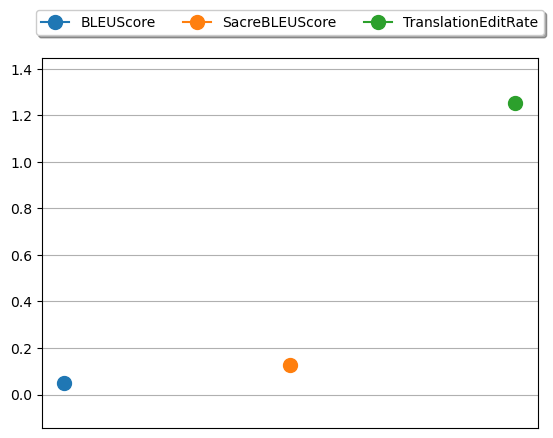

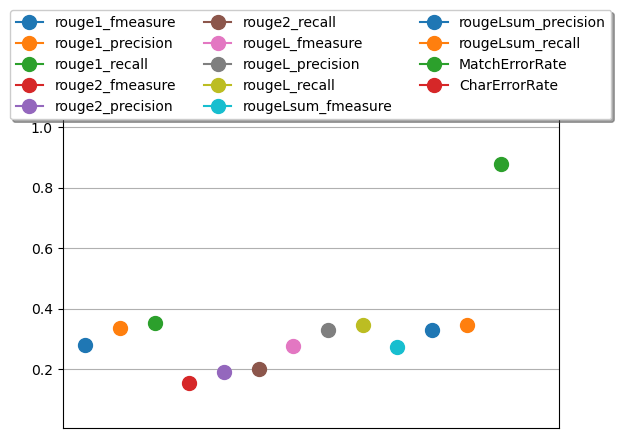

In [24]:
t_m_a, t_m_b = compute_metrics(train_preds)

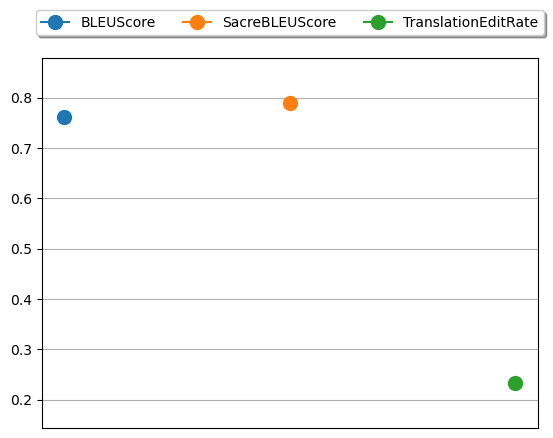

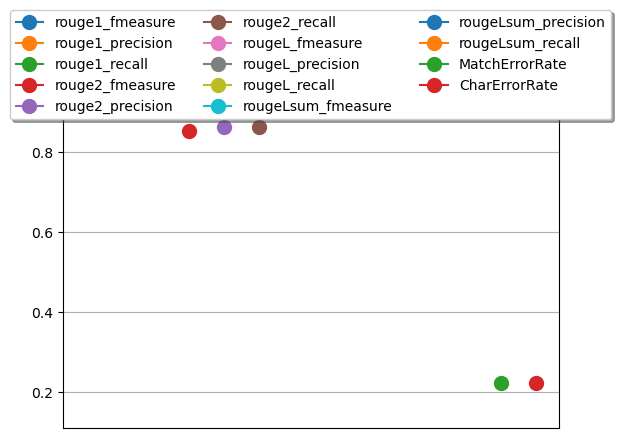

In [25]:
v_m_a, v_m_b = compute_metrics(eval_preds)

In [26]:
print(v_m_a)
print(v_m_b)

{'BLEUScore': tensor(0.7615), 'SacreBLEUScore': tensor(0.7890), 'TranslationEditRate': tensor(0.2326)}
{'rouge1_fmeasure': tensor(0.9117), 'rouge1_precision': tensor(0.9219), 'rouge1_recall': tensor(0.9207), 'rouge2_fmeasure': tensor(0.8534), 'rouge2_precision': tensor(0.8634), 'rouge2_recall': tensor(0.8617), 'rougeL_fmeasure': tensor(0.9070), 'rougeL_precision': tensor(0.9170), 'rougeL_recall': tensor(0.9157), 'rougeLsum_fmeasure': tensor(0.9073), 'rougeLsum_precision': tensor(0.9173), 'rougeLsum_recall': tensor(0.9160), 'MatchErrorRate': tensor(0.2230), 'CharErrorRate': tensor(0.2230)}
